In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Second Dataset #

In [44]:
# This is the clean dataset with the id column added

path = "/Users/abrahamcampos/Desktop/kickstarterNewID.csv"
df_id = pd.read_csv(path);
df_id.head()


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_1105/1627651625.py:4: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_id = pd.read_csv(path);


backers_count                                              blurb  \
0              2       Astrological Connections and Personal Wisdom   
1            318  Carbon wallet reimagined | Ultra light | Carbo...   
2             58  Special deluxe omnibus edition of AWARD-WINNIN...   
3            108  Agnimu Rehpot is back for a second printing, a...   
4              1  Cozy Kornerz is a fun new redecorating tool th...   

   converted_pledged_amount country_displayable_name currency  \
0                      51.0        the United States      USD   
1                   27920.0        the United States      USD   
2                    5041.0                   Canada      CAD   
3                    6614.0        the United States      USD   
4                       1.0        the United States      USD   

  current_currency  disable_communication   fx_rate     goal          id  ...  \
0              USD                  False  1.000000  60000.0   890895296  ...   
1              USD                  False  1.000000   6000.0   387465959  ...   
2              USD                  False  0.746744   5000.0  1374721063  ...   
3              USD                  False  1.000000   1000.0  1468739940  ...   
4              USD                  False  1.000000  20000.0  1779862446  ...   

   state_changed_at  static_usd_rate  usd_exchange_rate   usd_pledged  \
0        1705105011         1.000000           1.000000     51.000000   
1        1686665608         1.000000           1.000000  27920.000000   
2        1695321000         0.735692           0.741317   5002.920719   
3        1695693600         1.000000           1.000000   6614.000000   
4        1705094168         1.000000           1.000000      1.000000   

   usd_type       month  is_in_post_campaign_pledging_phase  category_name  \
0  domestic  2024-01-01                                 NaN         Design   
1  domestic  2024-01-01                                 NaN         Design   
2  domestic  2024-01-01                                 NaN     Publishing   
3  domestic  2024-01-01                                 NaN     Publishing   
4  domestic  2024-01-01                                 NaN         Design   

          subcategory             city  
0  Interactive Design     New York, NY  
1      Product Design      Wyoming, WY  
2             Fiction  Halifax, Canada  
3             Fiction    Covington, KY  
4  Interactive Design      Houston, TX  

[5 rows x 33 columns]

In [3]:
df_id['id'].nunique()

234600

In [4]:
df_id.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city'],
      dtype='object')

In [5]:
df_id[df_id['id']==387465959].month

1          2024-01-01
46904      2024-02-01
70508      2024-03-01
90805      2024-04-01
312627     2024-05-01
673510     2024-06-01
781399     2024-07-01
1105409    2024-08-01
Name: month, dtype: object

In [6]:
df_id.describe().transpose()

count          mean           std           min  \
backers_count             1962467.0  1.278307e+02  7.972329e+02  0.000000e+00   
converted_pledged_amount  1901504.0  1.454923e+04  1.281312e+05  0.000000e+00   
fx_rate                   1962467.0  9.703246e-01  4.308062e-01  5.906040e-03   
goal                      1962467.0  6.277417e+04  2.803376e+06  0.000000e+00   
id                        1962467.0  1.073649e+09  6.190300e+08  1.293000e+03   
launched_at               1962467.0  1.486807e+09  2.889615e+08  0.000000e+00   
percent_funded            1962467.0  6.091406e+02  5.091768e+04  0.000000e+00   
pledged                   1962467.0  3.738173e+04  1.146692e+06  0.000000e+00   
state_changed_at          1962467.0  1.541609e+09  1.152072e+08  1.242468e+09   
static_usd_rate           1962467.0  9.575599e-01  3.051149e-01  0.000000e+00   
usd_exchange_rate         1901504.0  9.875698e-01  2.557957e-01  6.185750e-03   
usd_pledged               1901504.0  1.455116e+04  1.280905e+05  0.000000e+00   

                                   25%           50%           75%  \
backers_count             3.000000e+00  2.400000e+01  8.500000e+01   
converted_pledged_amount  1.250000e+02  1.675000e+03  7.186000e+03   
fx_rate                   1.000000e+00  1.000000e+00  1.000000e+00   
goal                      1.250000e+03  5.000000e+03  1.500000e+04   
id                        5.384110e+08  1.072614e+09  1.609101e+09   
launched_at               1.431614e+09  1.517462e+09  1.634046e+09   
percent_funded            1.666667e+00  1.013467e+02  1.298833e+02   
pledged                   9.600000e+01  1.580530e+03  7.536000e+03   
state_changed_at          1.443224e+09  1.532662e+09  1.648671e+09   
static_usd_rate           1.000000e+00  1.000000e+00  1.000000e+00   
usd_exchange_rate         1.000000e+00  1.000000e+00  1.000000e+00   
usd_pledged               1.250000e+02  1.676998e+03  7.195000e+03   

                                   max  
backers_count             1.853410e+05  
converted_pledged_amount  4.175415e+07  
fx_rate                   1.878071e+02  
goal                      1.000000e+09  
id                        2.147476e+09  
launched_at               1.733980e+09  
percent_funded            1.553204e+07  
pledged                   4.816218e+08  
state_changed_at          1.733980e+09  
static_usd_rate           1.716408e+00  
usd_exchange_rate         1.716408e+00  
usd_pledged               4.175415e+07

In [200]:
df_id[df_id['id']==387465959].state

1          successful
46904      successful
70508      successful
90805      successful
312627     successful
673510     successful
781399     successful
1105409    successful
Name: state, dtype: object

## Ideas in General ##

1. Delete repeated entries after the venture succeeds or fails.
2. **State** is the new target feature.
3. Filter and wrangle by **state**
4. I want the ventures to stop showing in the following months after they reach a final state, such as successful, failed or canceled. The ongoing ones such as 'live' are supposed to show. This will allow us to keep track of the pledges and backers as the they relate to categories and subcategories through time.
5. I can introduce a column that records the number of months before a venture succeded within a given category.

In [201]:
df_id.shape

(1962467, 33)

In [7]:
df_id.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city'],
      dtype='object')

In [8]:
df_id.isnull().sum()

backers_count                               0
blurb                                     109
converted_pledged_amount                60963
country_displayable_name                    0
currency                                    0
current_currency                            0
disable_communication                       0
fx_rate                                     0
goal                                        0
id                                          0
is_disliked                                 0
is_launched                                 0
is_liked                                    0
is_starrable                                0
launched_at                                 0
name                                        0
percent_funded                              0
pledged                                     0
prelaunch_activated                         0
slug                                        0
spotlight                                   0
staff_pick                        

## State Changed at ##

An issue I encountered in the data was the number of duplicate campaigns in the months. The 'state' column is the column that indicates the status of the campaign. These statuses are as follow ('submitted','live','suspended','canncelled','successful'). Depending on the corresponding status of the campaign the status would change, or so I expected, what I found instead was that the campaigns would remain in the following months even after reaching a final state. The following block aims to resolve this.

In [9]:



import pandas as pd

# Ensure 'state_changed_at' is in datetime format
df_id['state_changed_at'] = pd.to_datetime(df_id['state_changed_at'], unit='s')

# Extract the year and month from 'state_changed_at' and convert to period (month)
df_id['year_month'] = df_id['state_changed_at'].dt.to_period('M')

# Define final states to track (successful, failed, canceled, suspended)
final_states = {'successful', 'failed', 'canceled', 'suspended'}

# Check if 'year_month_final' already exists and drop it before merging
if 'year_month_final' in df_id.columns:
    df_id = df_id.drop(columns=['year_month_final'])

# Find the earliest month when a campaign reached a final state
final_state_months = df_id[df_id['state'].isin(final_states)]\
    .groupby('id', as_index=False)['year_month'].min()

# Rename column for clarity
final_state_months.rename(columns={'year_month': 'year_month_final'}, inplace=True)

# 🔹 Debug: Print columns before merging
print("Before merging, df_id columns:", df_id.columns)
print("Final state months columns:", final_state_months.columns)

# Merge this back into the original dataset
df_id = df_id.merge(final_state_months, on='id', how='left')

# 🔹 Debug: Verify column existence after merge
print("After merging, df_id columns:", df_id.columns)

# 🔹 FIX: Handle missing `year_month_final` values correctly
df_id['year_month_final'] = df_id['year_month_final'].fillna(pd.Period('2100-01', freq='M'))

# Convert both columns to Period[M] for comparison
df_id['year_month'] = df_id['year_month'].astype('period[M]')
df_id['year_month_final'] = df_id['year_month_final'].astype('period[M]')

# Apply the filtering: Keep rows only up to the final state month
df_filtered = df_id[df_id['year_month'] <= df_id['year_month_final']]

# 🔹 Drop duplicates to keep only one row per campaign per final month
df_filtered = df_filtered.drop_duplicates(subset=['id', 'year_month', 'state'], keep='first')

# Sort for readability
df_filtered = df_filtered.sort_values(['id', 'year_month']).reset_index(drop=True)

# Display missing values again to verify
print(df_filtered.isna().sum())

# Display first few rows
print(df_filtered[['id', 'year_month', 'state']].head())


Before merging, df_id columns: Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month'],
      dtype='object')
Final state months columns: Index(['id', 'year_month_final'], dtype='object')
After merging, df_id columns: Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrabl

Now once a campaign has reached a final state it will not continue to appear in the subsequent months. Another thing to notice in the example above is that eventhough the campaign is still 'live' in september it does not appear in october. And it somehow also appeared as failed in November of 2016 and successfull in November of 20224.

In [157]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256378 entries, 0 to 256377
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   backers_count                       256378 non-null  int64         
 1   blurb                               256361 non-null  object        
 2   converted_pledged_amount            242826 non-null  float64       
 3   country_displayable_name            256378 non-null  object        
 4   currency                            256378 non-null  object        
 5   current_currency                    256378 non-null  object        
 6   disable_communication               256378 non-null  bool          
 7   fx_rate                             256378 non-null  float64       
 8   goal                                256378 non-null  float64       
 9   id                                  256378 non-null  int64         
 10  is_disli

Number of invalid launched_at values: 0
Number of successful campaigns per year:
launch_year
2009      154
2010      939
2011     2651
2012     4579
2013     6043
2014     9180
2015    10386
2016     9410
2017     9268
2018     8087
2019     7917
2020     8724
2021     9655
2022    10443
2023    14159
2024    16748
Name: count, dtype: int64


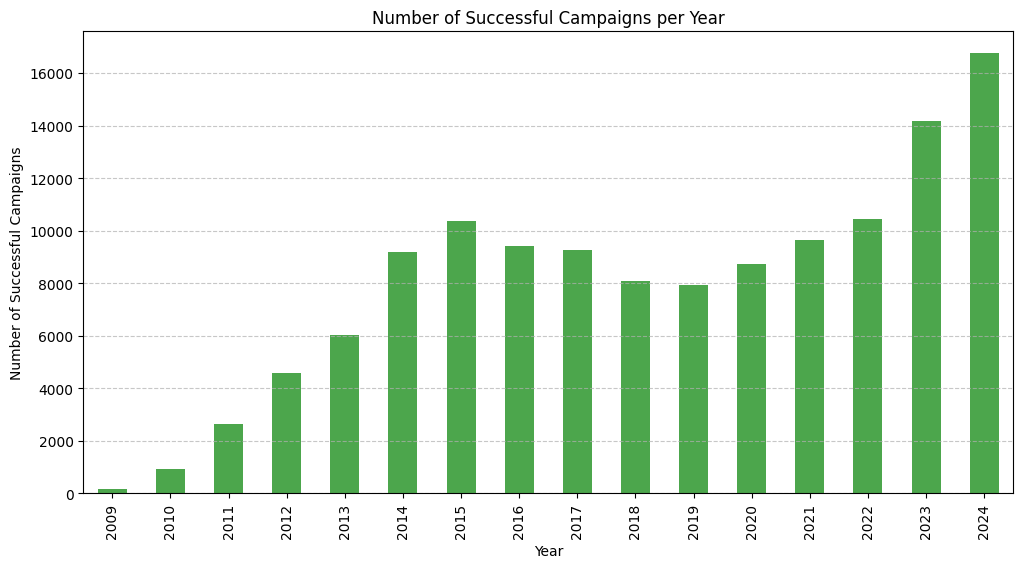

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'launched_at' from integer to datetime
df_filtered['launched_at'] = pd.to_datetime(df_filtered['launched_at'], unit='s')

# Check for invalid dates after conversion
invalid_dates = df_filtered[df_filtered['launched_at'].isna()]
print(f"Number of invalid launched_at values: {len(invalid_dates)}")

# Filter out rows where 'launched_at' is invalid
df_filtered_valid = df_filtered.dropna(subset=['launched_at'])

# Extract the year from the 'launched_at' column
df_filtered_valid['launch_year'] = df_filtered_valid['launched_at'].dt.year

# Filter for successful campaigns
successful_campaigns = df_filtered_valid[df_filtered_valid['state'] == 'successful']

# Count the number of successful campaigns per year
successful_campaigns_per_year = successful_campaigns['launch_year'].value_counts().sort_index()

# Display the successful campaigns per year
print("Number of successful campaigns per year:")
print(successful_campaigns_per_year)

# Plot the number of successful campaigns per year
plt.figure(figsize=(12, 6))
successful_campaigns_per_year.plot(kind='bar', color='green', alpha=0.7)
plt.title("Number of Successful Campaigns per Year")
plt.xlabel("Year")
plt.ylabel("Number of Successful Campaigns")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
df_filtered_valid.shape

(234334, 37)

In [19]:
df_filtered.shape

(256378, 35)

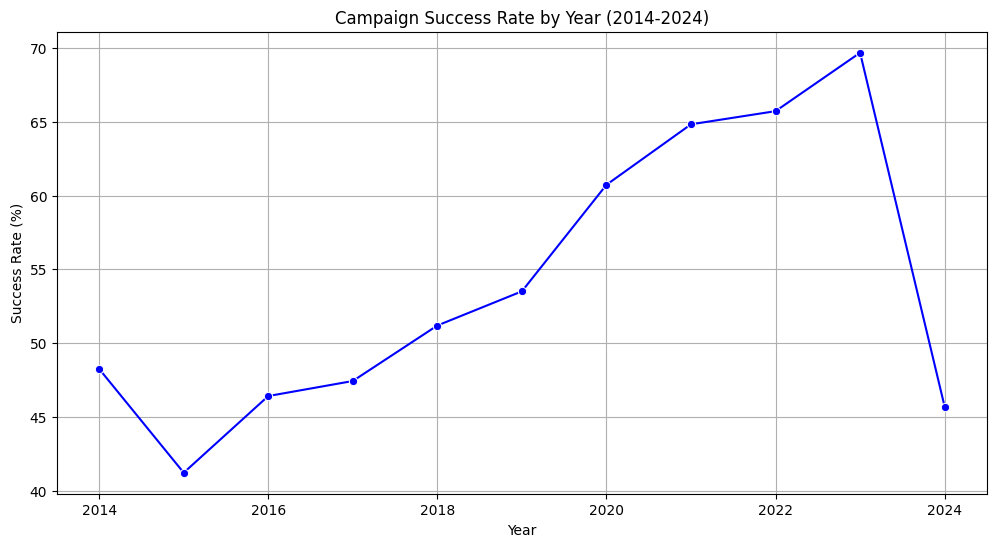

📊 Campaign Success Rate by Year:
    launch_year      state
0          2014  48.244692
1          2015  41.207745
2          2016  46.407259
3          2017  47.426057
4          2018  51.190024
5          2019  53.507705
6          2020  60.730943
7          2021  64.833468
8          2022  65.724715
9          2023  69.686977
10         2024  45.692148


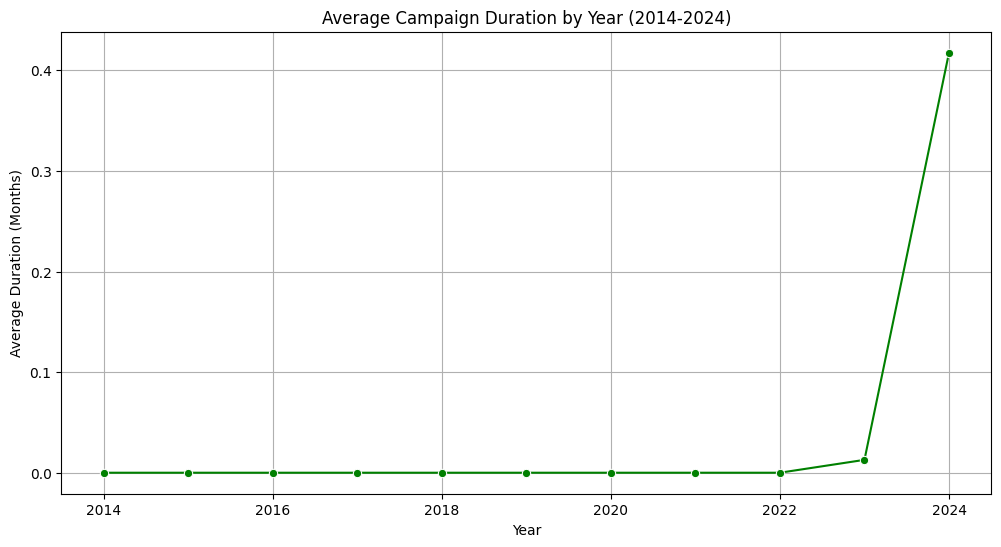

📊 Average Campaign Duration by Year:
    launch_year  months_to_final_state
0          2014               0.000000
1          2015               0.000000
2          2016               0.000000
3          2017               0.000000
4          2018               0.000000
5          2019               0.000000
6          2020               0.000000
7          2021               0.000000
8          2022               0.000000
9          2023               0.012788
10         2024               0.417501


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_1105/2056590339.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_distribution, x='category_name', y='campaign_count', palette='viridis')


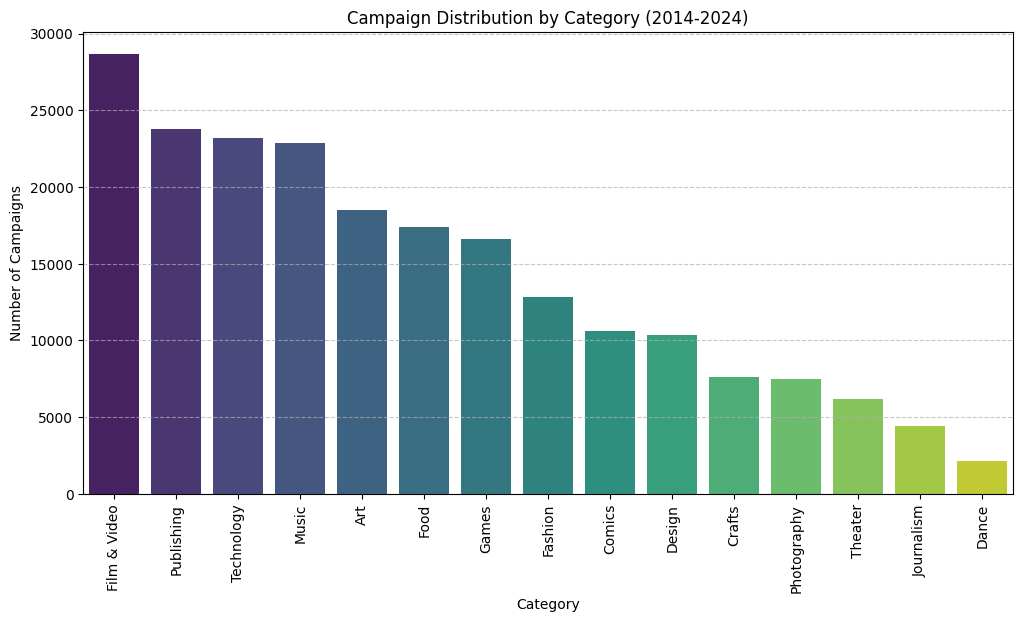

📊 Campaign Distribution by Category (2014-2024):
   category_name  campaign_count
0   Film & Video           28668
1     Publishing           23763
2     Technology           23176
3          Music           22893
4            Art           18528
5           Food           17401
6          Games           16608
7        Fashion           12805
8         Comics           10590
9         Design           10379
10        Crafts            7603
11   Photography            7469
12       Theater            6195
13    Journalism            4446
14         Dance            2116


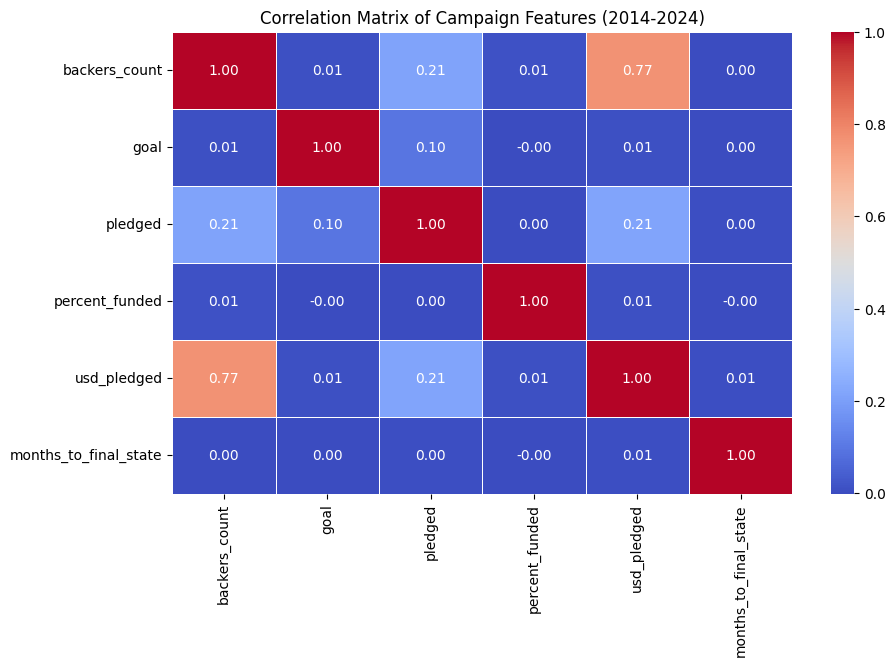

📊 Correlation Matrix of Campaign Features:
                       backers_count      goal   pledged  percent_funded  \
backers_count               1.000000  0.010544  0.211235        0.012700   
goal                        0.010544  1.000000  0.095030       -0.000301   
pledged                     0.211235  0.095030  1.000000        0.002153   
percent_funded              0.012700 -0.000301  0.002153        1.000000   
usd_pledged                 0.766728  0.008720  0.214665        0.009764   
months_to_final_state       0.001876  0.000487  0.004637       -0.000876   

                       usd_pledged  months_to_final_state  
backers_count             0.766728               0.001876  
goal                      0.008720               0.000487  
pledged                   0.214665               0.004637  
percent_funded            0.009764              -0.000876  
usd_pledged               1.000000               0.005627  
months_to_final_state     0.005627               1.000000  


In [20]:
# Ensure 'months_to_final_state' is available and correctly calculated
if 'months_to_final_state' not in df_filtered_valid.columns:
    # Calculate months to final state as the difference between the 'year_month_final' and 'year_month'
    df_filtered_valid['months_to_final_state'] = (df_filtered_valid['year_month_final'].dt.to_timestamp() - df_filtered_valid['year_month'].dt.to_timestamp()).dt.days / 30

# Filter out invalid or unreasonable durations
df_filtered_valid = df_filtered_valid[df_filtered_valid['months_to_final_state'] >= 0]

# Filter campaigns for the years 2014-2024
df_filtered_valid_2014_2024 = df_filtered_valid[df_filtered_valid['launch_year'].between(2014, 2024)]

# 1. **Campaign Success Rate by Year**
# Calculate the success rate by year
success_rate_by_year = df_filtered_valid_2014_2024.groupby('launch_year')['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Success rate as a percentage
).reset_index()

# Plot success rate by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate_by_year, x='launch_year', y='state', marker='o', color='blue')
plt.title("Campaign Success Rate by Year (2014-2024)")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.grid(True)
plt.show()

# Display the success rate by year
print("📊 Campaign Success Rate by Year:")
print(success_rate_by_year)


# 2. **Average Campaign Duration by Year**
# Calculate average campaign duration by year (in months)
avg_duration_by_year = df_filtered_valid_2014_2024.groupby('launch_year')['months_to_final_state'].mean().reset_index()

# Plot average campaign duration by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration_by_year, x='launch_year', y='months_to_final_state', marker='o', color='green')
plt.title("Average Campaign Duration by Year (2014-2024)")
plt.xlabel("Year")
plt.ylabel("Average Duration (Months)")
plt.grid(True)
plt.show()

# Display the average duration by year
print("📊 Average Campaign Duration by Year:")
print(avg_duration_by_year)


# 3. **Campaign Distribution by Category**
# Group by category and count the number of campaigns for 2014-2024
category_distribution = df_filtered_valid_2014_2024['category_name'].value_counts().reset_index()
category_distribution.columns = ['category_name', 'campaign_count']

# Plot the distribution of campaigns by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_distribution, x='category_name', y='campaign_count', palette='viridis')
plt.title("Campaign Distribution by Category (2014-2024)")
plt.xlabel("Category")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the campaign distribution by category
print("📊 Campaign Distribution by Category (2014-2024):")
print(category_distribution)


# 4. **Correlation Between Key Features**
# Select relevant numeric columns for correlation analysis
numeric_cols = ['backers_count', 'goal', 'pledged', 'percent_funded', 'usd_pledged', 'months_to_final_state']

# Calculate correlation matrix
corr_matrix = df_filtered_valid_2014_2024[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Campaign Features (2014-2024)")
plt.show()

# Display the correlation matrix
print("📊 Correlation Matrix of Campaign Features:")
print(corr_matrix)



In [21]:
# Filter data for campaigns launched between 2014 and 2022
df_2014_2022 = df_filtered_valid[df_filtered_valid['launch_year'].between(2014, 2022)]

# Display the number of records and basic information
print(f"Number of campaigns between 2014 and 2022: {df_2014_2022.shape[0]}")
print(df_2014_2022['launch_year'].value_counts())


Number of campaigns between 2014 and 2022: 159791
launch_year
2015    25204
2016    20277
2017    19542
2014    19028
2022    15889
2018    15798
2021    14892
2019    14796
2020    14365
Name: count, dtype: int64


In [22]:
# Check for missing data in the filtered data
print("\nMissing Data in the years 2014-2022:")
print(df_2014_2022.isna().sum())

# Check if there are zero durations or strange values
invalid_duration = df_2014_2022[df_2014_2022['months_to_final_state'] <= 0]
print(f"\nNumber of campaigns with invalid durations (<= 0 months): {invalid_duration.shape[0]}")

# Summary of campaign durations in these years
duration_summary = df_2014_2022['months_to_final_state'].describe()
print("\nCampaign Duration Summary (2014-2022):")
print(duration_summary)



Missing Data in the years 2014-2022:
backers_count                              0
blurb                                      7
converted_pledged_amount                   0
country_displayable_name                   0
currency                                   0
current_currency                           0
disable_communication                      0
fx_rate                                    0
goal                                       0
id                                         0
is_disliked                                0
is_launched                                0
is_liked                                   0
is_starrable                               0
launched_at                                0
name                                       0
percent_funded                             0
pledged                                    0
prelaunch_activated                        0
slug                                       0
spotlight                                  0
staff_pick       


Campaign States (2014-2022):
state        canceled  failed  successful
launch_year                              
2014             1213    8635        9180
2015             1744   13074       10386
2016             1277    9590        9410
2017              954    9320        9268
2018              786    6925        8087
2019              758    6121        7917
2020              703    4938        8724
2021              607    4630        9655
2022              617    4829       10443


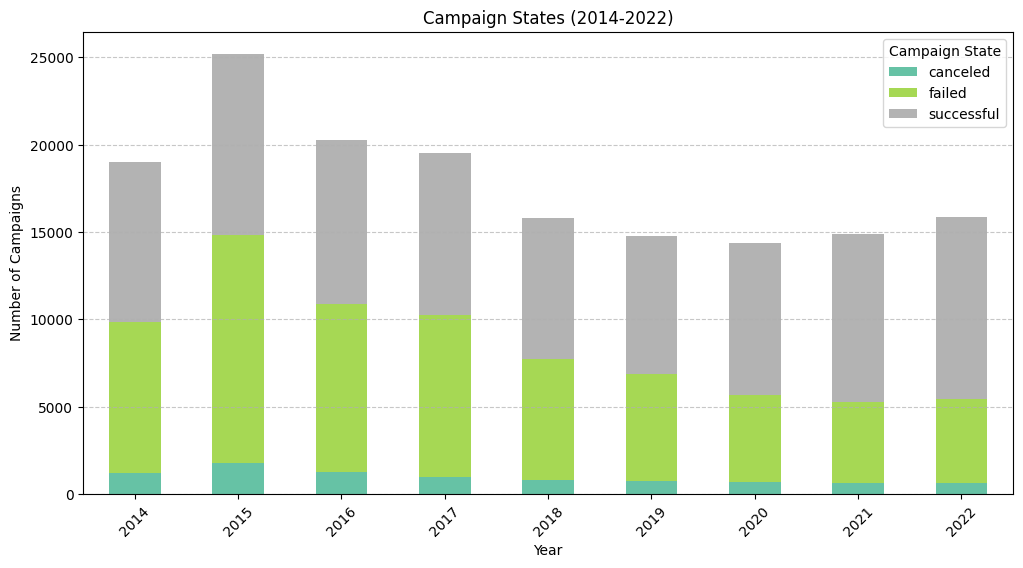

In [23]:
# Count the number of campaigns that reached each final state during 2014-2022
state_counts = df_2014_2022[df_2014_2022['state'].isin(['successful', 'failed', 'canceled', 'suspended'])]\
    .groupby(['launch_year', 'state']).size().unstack(fill_value=0)

print("\nCampaign States (2014-2022):")
print(state_counts)

# Plot the number of campaigns per state for each year
state_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Campaign States (2014-2022)")
plt.xlabel("Year")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=45)
plt.legend(title='Campaign State')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


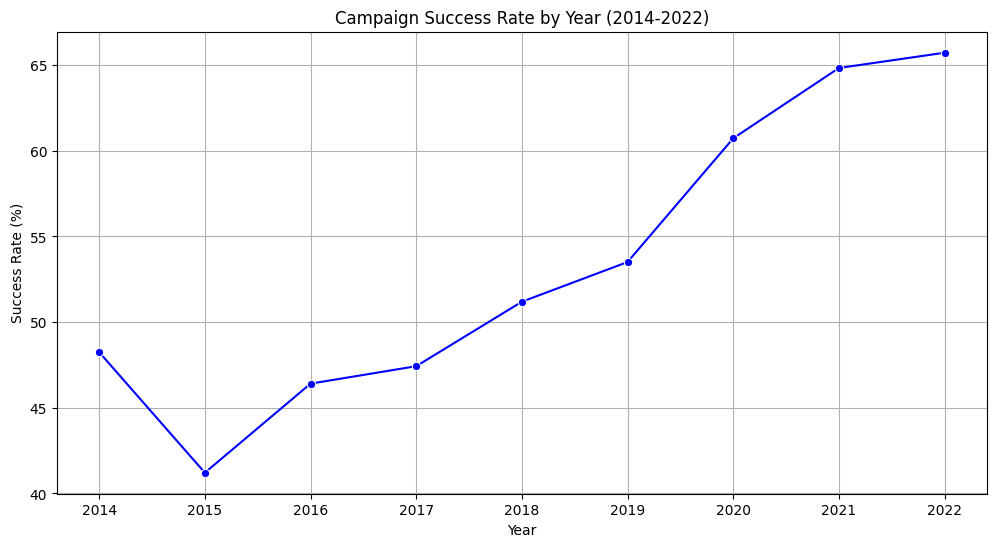


📊 Campaign Success Rate by Year (2014-2022):
   launch_year      state
0         2014  48.244692
1         2015  41.207745
2         2016  46.407259
3         2017  47.426057
4         2018  51.190024
5         2019  53.507705
6         2020  60.730943
7         2021  64.833468
8         2022  65.724715


In [24]:
# Calculate the success rate for each year
success_rate_by_year_2014_2022 = df_2014_2022.groupby('launch_year')['state'].apply(
    lambda x: (x == 'successful').mean() * 100).reset_index()

# Plot the success rate by year
plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate_by_year_2014_2022, x='launch_year', y='state', marker='o', color='blue')
plt.title("Campaign Success Rate by Year (2014-2022)")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.grid(True)
plt.show()

# Display the success rate by year
print("\n📊 Campaign Success Rate by Year (2014-2022):")
print(success_rate_by_year_2014_2022)


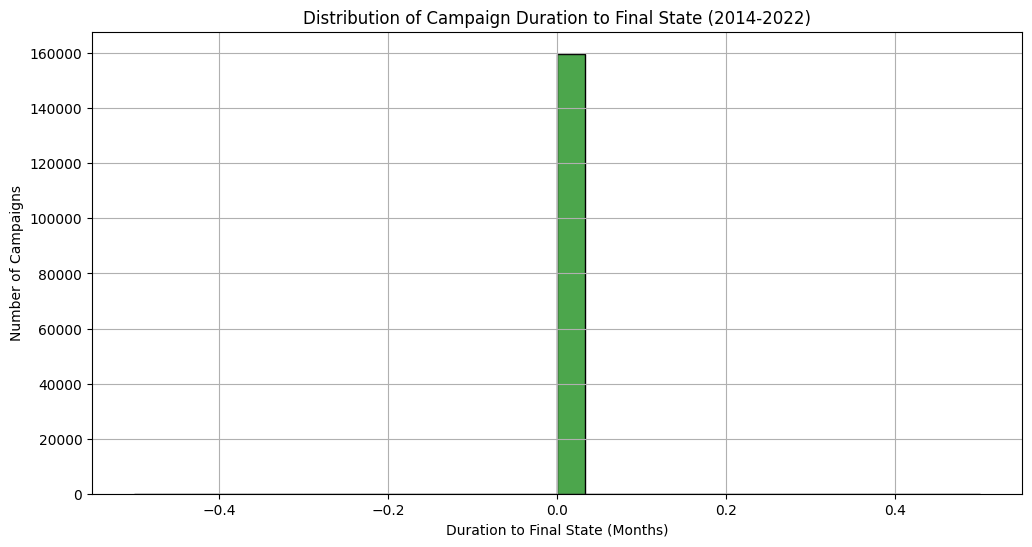

In [25]:
# Plot the distribution of campaign durations for the years 2014-2022
plt.figure(figsize=(12, 6))
sns.histplot(df_2014_2022['months_to_final_state'], bins=30, kde=True, color='green', alpha=0.7)
plt.title("Distribution of Campaign Duration to Final State (2014-2022)")
plt.xlabel("Duration to Final State (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(True)
plt.show()


In [27]:
df_2014_2022['months_to_final_state'].sum()

0.0

In [28]:
# Check for any issues with 'year_month' and 'year_month_final' columns
print(df_2014_2022[['year_month', 'year_month_final']].head())

# Check the data types of these columns
print(df_2014_2022[['year_month', 'year_month_final']].dtypes)


   year_month year_month_final
4     2016-11          2016-11
8     2015-05          2015-05
11    2015-11          2015-11
12    2015-07          2015-07
13    2018-10          2018-10
year_month          period[M]
year_month_final    period[M]
dtype: object


In [33]:
df_2014_2022[df_2014_2022['id']==18520].state

4    failed
Name: state, dtype: object

In [34]:
# Check if year_month and year_month_final are equal
same_month_campaigns = df_2014_2022[df_2014_2022['year_month'] == df_2014_2022['year_month_final']]

# Inspect the rows where year_month and year_month_final are the same
print(same_month_campaigns[['id', 'year_month', 'year_month_final']].head())


       id year_month year_month_final
4   18520    2016-11          2016-11
8   21109    2015-05          2015-05
11  24380    2015-11          2015-11
12  33867    2015-07          2015-07
13  38736    2018-10          2018-10


In [36]:
# Filter out rows with NaT in either 'year_month' or 'year_month_final'
df_2014_2022_valid = df_2014_2022.dropna(subset=['year_month', 'year_month_final'])

# Calculate the months to final state after filtering out NaT values
df_2014_2022_valid['months_to_final_state'] = (
    (df_2014_2022_valid['year_month_final'] - df_2014_2022_valid['year_month']).apply(lambda x: x.n)
)

# Display the first few rows to ensure the calculation is correct
print(df_2014_2022_valid[['id', 'year_month', 'year_month_final', 'months_to_final_state']].head())

# Check the distribution of months_to_final_state
print(df_2014_2022_valid['months_to_final_state'].describe())

# Now you can proceed with the analysis


       id year_month year_month_final  months_to_final_state
4   18520    2016-11          2016-11                      0
8   21109    2015-05          2015-05                      0
11  24380    2015-11          2015-11                      0
12  33867    2015-07          2015-07                      0
13  38736    2018-10          2018-10                      0
count    159791.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: months_to_final_state, dtype: float64


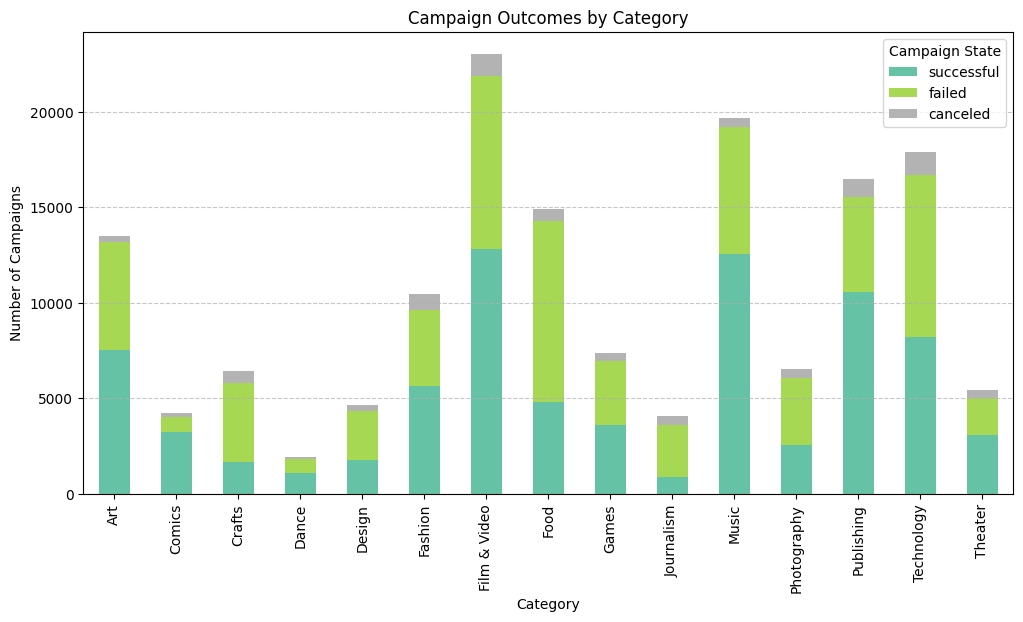

In [38]:
# Group by category and campaign outcome
category_outcomes = df_2014_2022_valid.groupby(['category_name', 'state']).size().unstack(fill_value=0)

# Plot stacked bar chart for outcomes by category
category_outcomes[['successful', 'failed', 'canceled']].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Campaign Outcomes by Category')
plt.xlabel('Category')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=90)
plt.legend(title='Campaign State')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1400x800 with 0 Axes>

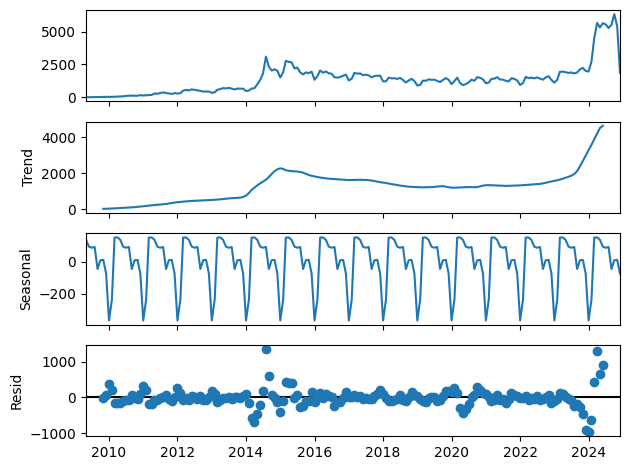

state_changed_month
2009-05-01     2
2009-06-01     5
2009-07-01    11
2009-08-01     7
2009-09-01    11
dtype: int64


In [206]:

from statsmodels.tsa.seasonal import seasonal_decompose


df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'], errors='coerce')


df_filtered['state_changed_month'] = df_filtered['state_changed_at'].dt.to_period('M')


df_filtered['state_changed_month'] = df_filtered['state_changed_month'].dt.to_timestamp()


state_changes_by_month = df_filtered.groupby('state_changed_month').size()


result = seasonal_decompose(state_changes_by_month, model='additive', period=12)  # period=12 for monthly seasonality

plt.figure(figsize=(14, 8))
result.plot()
plt.show()


print(state_changes_by_month.head())

In [41]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'year_month_final'],
      dtype='object')

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'state_changed_at' column is in datetime format
df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'], errors='coerce')

# Filter the data to consider only the years 2014-2024 (if needed)
df_filtered_2014_2024 = df_filtered[df_filtered['launch_year'].between(2014, 2024)]

# Count the number of state changes per month
state_changes_by_month = df_filtered_2014_2024.groupby(df_filtered_2014_2024['state_changed_at'].dt.to_period('M')).size()

# Plot the number of state changes over time (monthly)
plt.figure(figsize=(12, 6))
state_changes_by_month.plot(kind='line', marker='o', color='blue', linewidth=2, alpha=0.7)
plt.title('Number of State Changes Over Time (2014-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of State Changes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Display the first few rows of the number of state changes by month
print(state_changes_by_month.head())



KeyError: 'launch_year'

<Figure size 1400x800 with 0 Axes>

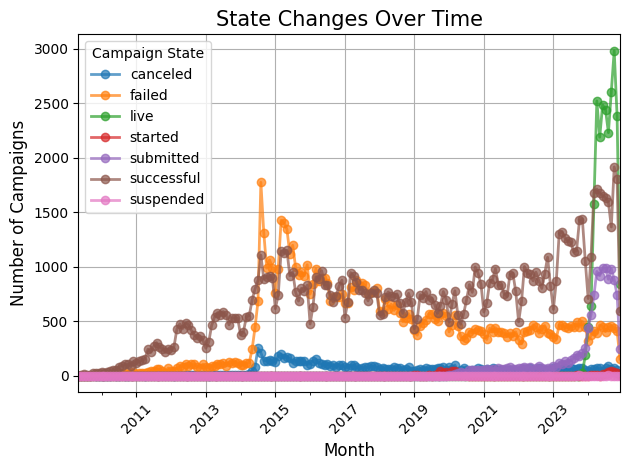

📊 State Changes Over Time (Grouped by Month and State):
state             canceled  failed  live  started  submitted  successful  \
state_changed_at                                                           
2009-05                  0       1     0        0          0           1   
2009-06                  0       0     0        0          0           5   
2009-07                  0       0     0        0          0          11   
2009-08                  0       1     0        0          0           6   
2009-09                  1       0     0        0          0          10   
...                    ...     ...   ...      ...        ...         ...   
2024-08                 86     443  2231       32        885        1591   
2024-09                 60     457  2604       41        983        1365   
2024-10                 72     440  2985       30        881        1917   
2024-11                 56     411  2380       25        739        1804   
2024-12                 27     1

In [186]:
# Group the data by the 'state_changed_at' column and count the number of campaigns per state
state_changes_over_time = df_filtered.groupby([df_filtered['state_changed_at'].dt.to_period('M'), 'state']).size().unstack(fill_value=0)

# Plot the state changes over time
plt.figure(figsize=(14, 8))
state_changes_over_time.plot(kind='line', marker='o', linewidth=2, alpha=0.7)
plt.title('State Changes Over Time', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Campaigns', fontsize=12)
plt.legend(title='Campaign State')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the state changes over time summary
print("📊 State Changes Over Time (Grouped by Month and State):")
print(state_changes_over_time)


<Figure size 1400x800 with 0 Axes>

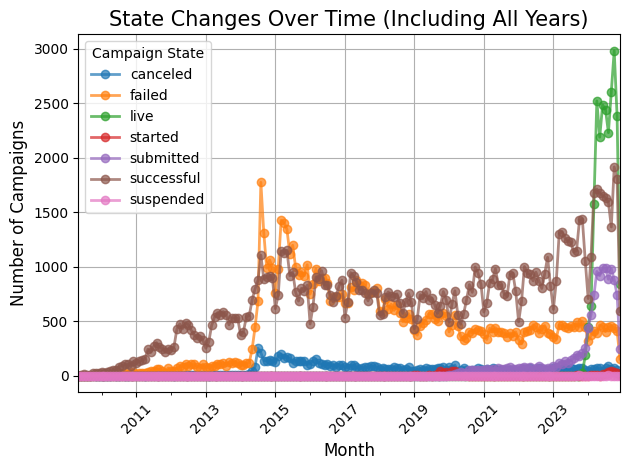

📊 State Changes Over Time (Including All Years):
state             canceled  failed  live  started  submitted  successful  \
state_changed_at                                                           
2009-05                  0       1     0        0          0           1   
2009-06                  0       0     0        0          0           5   
2009-07                  0       0     0        0          0          11   
2009-08                  0       1     0        0          0           6   
2009-09                  1       0     0        0          0          10   
...                    ...     ...   ...      ...        ...         ...   
2024-08                 86     443  2231       32        885        1591   
2024-09                 60     457  2604       41        983        1365   
2024-10                 72     440  2985       30        881        1917   
2024-11                 56     411  2380       25        739        1804   
2024-12                 27     152   83

In [187]:
# Group the data by 'state_changed_at' and count the number of campaigns in each state
state_changes_over_time_all_years = df_filtered.groupby([df_filtered['state_changed_at'].dt.to_period('M'), 'state']).size().unstack(fill_value=0)

# Plot the state changes over time for all years
plt.figure(figsize=(14, 8))
state_changes_over_time_all_years.plot(kind='line', marker='o', linewidth=2, alpha=0.7)
plt.title('State Changes Over Time (Including All Years)', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Campaigns', fontsize=12)
plt.legend(title='Campaign State')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the state changes over time summary for all years
print("📊 State Changes Over Time (Including All Years):")
print(state_changes_over_time_all_years)


In [175]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256378 entries, 0 to 256377
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   backers_count                       256378 non-null  int64         
 1   blurb                               256361 non-null  object        
 2   converted_pledged_amount            242826 non-null  float64       
 3   country_displayable_name            256378 non-null  object        
 4   currency                            256378 non-null  object        
 5   current_currency                    256378 non-null  object        
 6   disable_communication               256378 non-null  bool          
 7   fx_rate                             256378 non-null  float64       
 8   goal                                256378 non-null  float64       
 9   id                                  256378 non-null  int64         
 10  is_disli

In [176]:
# Convert the 'year_month_final' to datetime format and filter the data
df_filtered['year_month_final'] = pd.to_datetime(df_filtered['year_month_final'].dt.to_timestamp(), errors='coerce')

# Filter data for campaigns launched in 2014 or later
df_filtered_2014_onward = df_filtered[df_filtered['year_month_final'].dt.year >= 2014]

# Display the first few rows to ensure correct filtering
print(df_filtered_2014_onward.head())


   backers_count                                              blurb  \
0            491  Fantasy playing card decks combine the structu...   
1              0  A heroine's first day on the job uncovers a te...   
2             52  A heroine's first day on the job uncovers a te...   
3            130  A heroine's first day on the job uncovers a te...   
4              4  Raising money to help my grandmother recover f...   

   converted_pledged_amount country_displayable_name currency  \
0                   36513.0        the United States      USD   
1                       NaN        the United States      USD   
2                    1471.0        the United States      USD   
3                    2869.0        the United States      USD   
4                      62.0        the United States      USD   

  current_currency  disable_communication  fx_rate     goal     id  ...  \
0              USD                  False      1.0  10000.0   1293  ...   
1              USD              

In [178]:
# Calculate the time to reach the final state (in months)
df_filtered_2014_onward['time_to_final_state'] = (df_filtered_2014_onward['year_month_final'].dt.month - df_filtered_2014_onward['year_month'].dt.month) + (df_filtered_2014_onward['year_month_final'].dt.year - df_filtered_2014_onward['year_month'].dt.year) * 12

# Filter out rows where the 'time_to_final_state' is negative or invalid
df_valid = df_filtered_2014_onward[df_filtered_2014_onward['time_to_final_state'] >= 0]

# Display summary statistics for the time to final state
print(df_valid['time_to_final_state'].describe())



count    239310.000000
mean         64.935665
std         234.172347
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1028.000000
Name: time_to_final_state, dtype: float64


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/2676647311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2014_onward['time_to_final_state'] = (df_filtered_2014_onward['year_month_final'].dt.month - df_filtered_2014_onward['year_month'].dt.month) + (df_filtered_2014_onward['year_month_final'].dt.year - df_filtered_2014_onward['year_month'].dt.year) * 12


In [185]:
len(df_filtered_2014_onward[df_filtered_2014_onward['time_to_final_state']==0])


204660

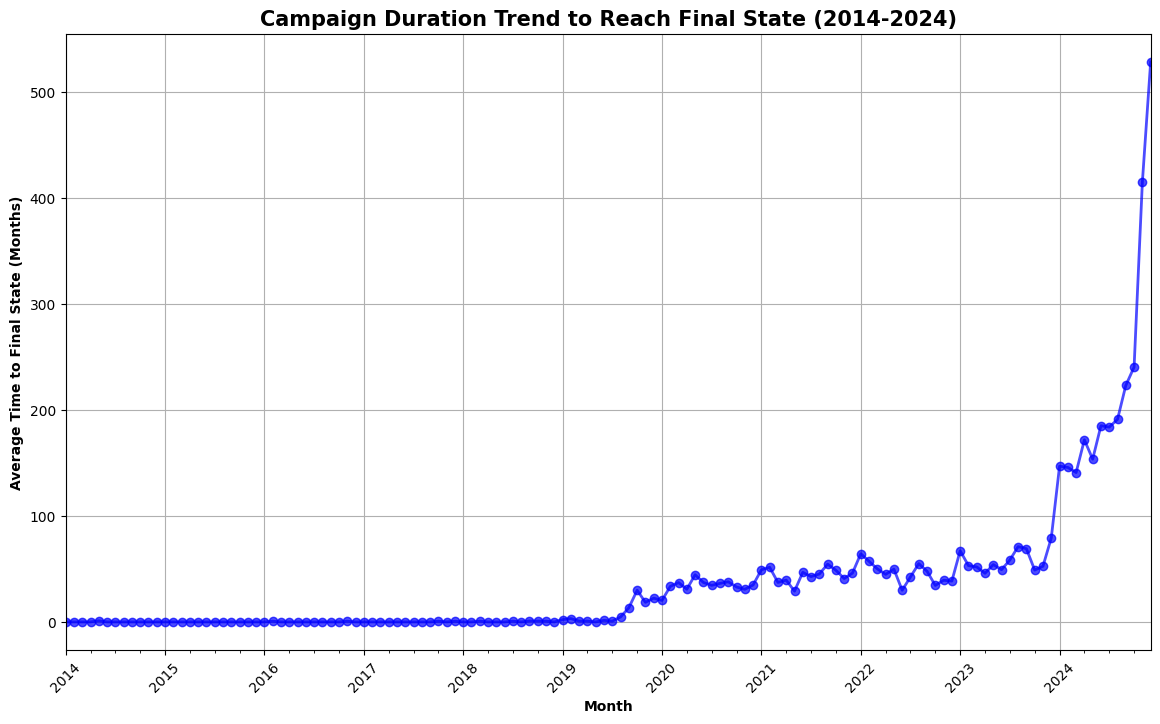

📊 Monthly Average Time to Final State (2014-2024):
year_month
2014-01      0.000000
2014-02      0.000000
2014-03      0.000000
2014-04      0.000000
2014-05      1.036290
              ...    
2024-08    191.277419
2024-09    223.284574
2024-10    240.590040
2024-11    415.347738
2024-12    528.805794
Freq: M, Name: time_to_final_state, Length: 132, dtype: float64


In [179]:
# Group by 'year_month' and calculate the average time to final state for each month
monthly_duration = df_valid.groupby('year_month')['time_to_final_state'].mean()

# Plot the time series trend for time to final state
plt.figure(figsize=(14, 8))
monthly_duration.plot(kind='line', marker='o', color='b', linewidth=2, alpha=0.7)
plt.title('Campaign Duration Trend to Reach Final State (2014-2024)', fontweight='bold', fontsize=15)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Average Time to Final State (Months)', fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the monthly average time to final state
print("📊 Monthly Average Time to Final State (2014-2024):")
print(monthly_duration)


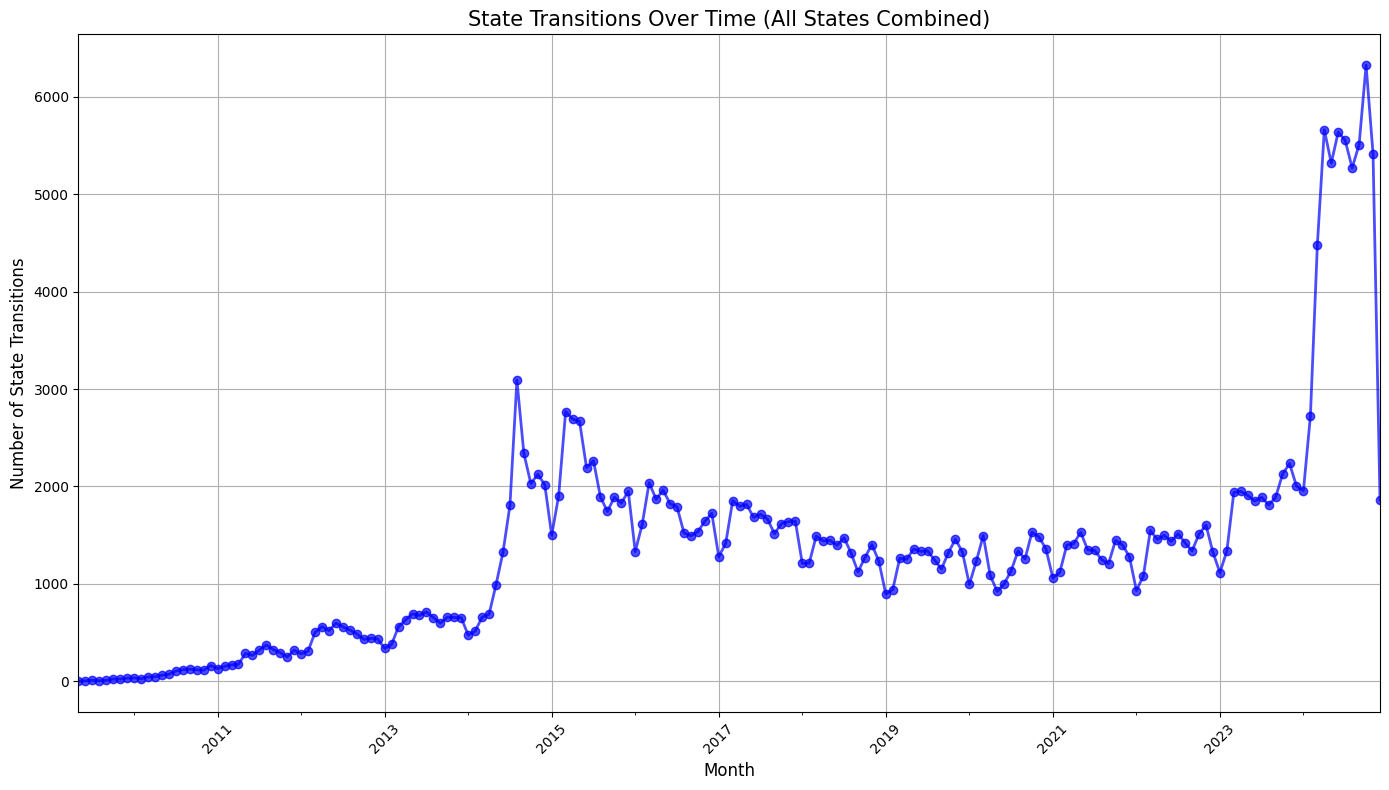

📊 State Transitions Over Time (All States Combined):
state_changed_at
2009-05       2
2009-06       5
2009-07      11
2009-08       7
2009-09      11
           ... 
2024-08    5270
2024-09    5510
2024-10    6325
2024-11    5415
2024-12    1864
Freq: M, Length: 188, dtype: int64


In [188]:
# Ensure 'state_changed_at' is in datetime format
df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'], errors='coerce')

# Sort by 'state_changed_at' to ensure proper transition tracking
df_filtered = df_filtered.sort_values(by='state_changed_at')

# Count the number of state changes per month (no need to separate by state)
state_changes_over_time = df_filtered.groupby(df_filtered['state_changed_at'].dt.to_period('M')).size()

# Plot the state changes over time
plt.figure(figsize=(14, 8))
state_changes_over_time.plot(kind='line', marker='o', color='b', linewidth=2, alpha=0.7)
plt.title('State Transitions Over Time (All States Combined)', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of State Transitions', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the summary of state transitions over time
print("📊 State Transitions Over Time (All States Combined):")
print(state_changes_over_time)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/3552892077.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['state_changed_at'].fillna(pd.to_datetime('1970-01-01'), inplace=True)


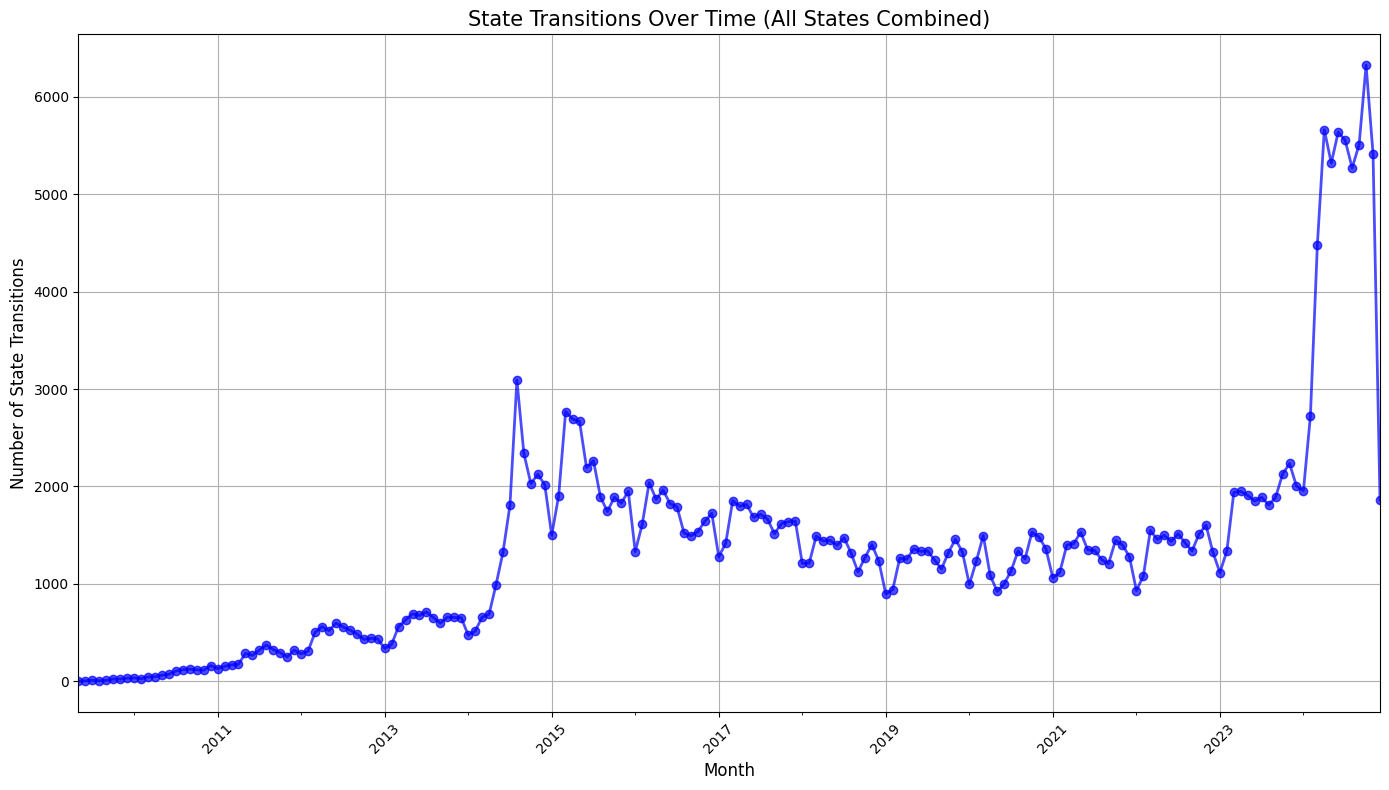

📊 State Transitions Over Time (All States Combined):
state_changed_at
2009-05       2
2009-06       5
2009-07      11
2009-08       7
2009-09      11
           ... 
2024-08    5270
2024-09    5510
2024-10    6325
2024-11    5415
2024-12    1864
Freq: M, Length: 188, dtype: int64


In [189]:
# Ensure 'state_changed_at' is in datetime format
df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'], errors='coerce')

# Handle NaT values by replacing them with a specific value, like 'Unknown' or '1970-01-01'
df_filtered['state_changed_at'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

# Sort by 'state_changed_at' to ensure proper transition tracking
df_filtered = df_filtered.sort_values(by='state_changed_at')

# Count the number of state changes per month (no need to separate by state)
state_changes_over_time = df_filtered.groupby(df_filtered['state_changed_at'].dt.to_period('M')).size()

# Plot the state changes over time
plt.figure(figsize=(14, 8))
state_changes_over_time.plot(kind='line', marker='o', color='b', linewidth=2, alpha=0.7)
plt.title('State Transitions Over Time (All States Combined)', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of State Transitions', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the summary of state transitions over time
print("📊 State Transitions Over Time (All States Combined):")
print(state_changes_over_time)


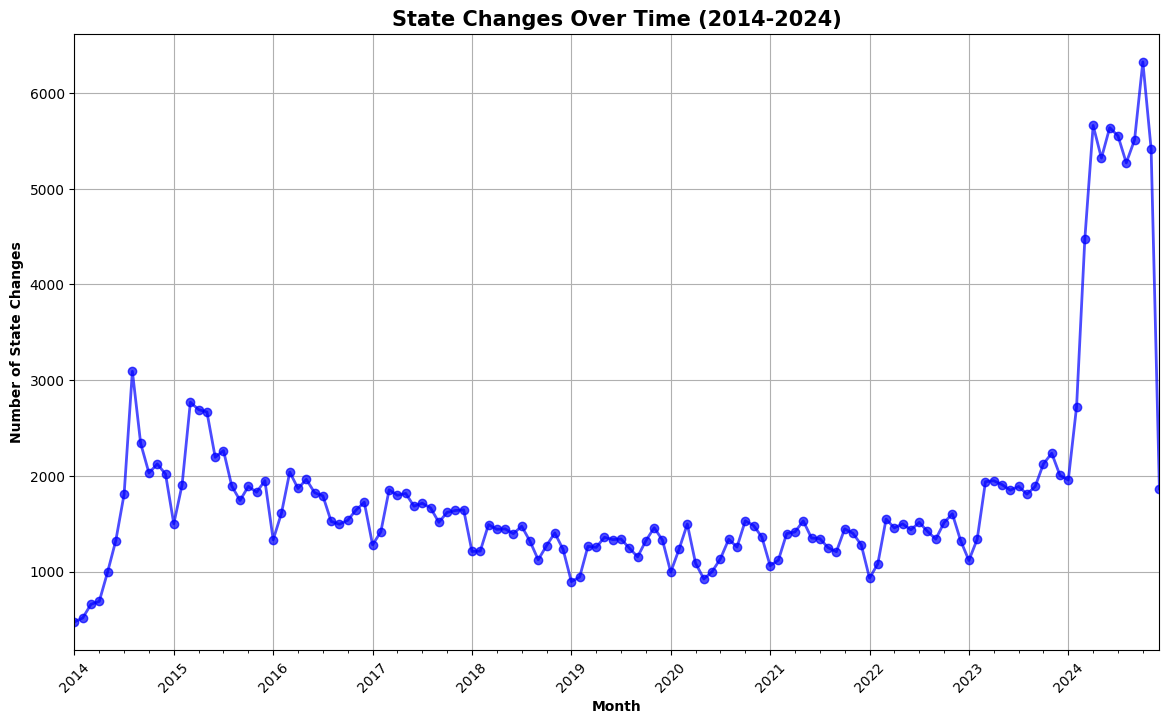

State Changes by Month (2014-2024):
state_changed_at
2014-01     474
2014-02     515
2014-03     658
2014-04     688
2014-05     992
           ... 
2024-08    5270
2024-09    5510
2024-10    6325
2024-11    5415
2024-12    1864
Freq: M, Length: 132, dtype: int64


In [190]:
import matplotlib.pyplot as plt

# Assuming df_filtered is the DataFrame with your dataset

# Step 1: Filter data for years 2014 to 2024
df_filtered_2014_onward = df_filtered[(df_filtered['state_changed_at'].dt.year >= 2014) & 
                                      (df_filtered['state_changed_at'].dt.year <= 2024)]

# Step 2: Group by 'state_changed_at' (monthly frequency) and count state changes
state_changes_by_month = df_filtered_2014_onward.groupby(df_filtered_2014_onward['state_changed_at'].dt.to_period('M')).size()

# Step 3: Plot the time series of state changes
plt.figure(figsize=(14, 8))
state_changes_by_month.plot(kind='line', marker='o', color='b', linewidth=2, alpha=0.7)
plt.title('State Changes Over Time (2014-2024)', fontweight='bold', fontsize=15)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of State Changes', fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the number of state changes by month
print("State Changes by Month (2014-2024):")
print(state_changes_by_month)


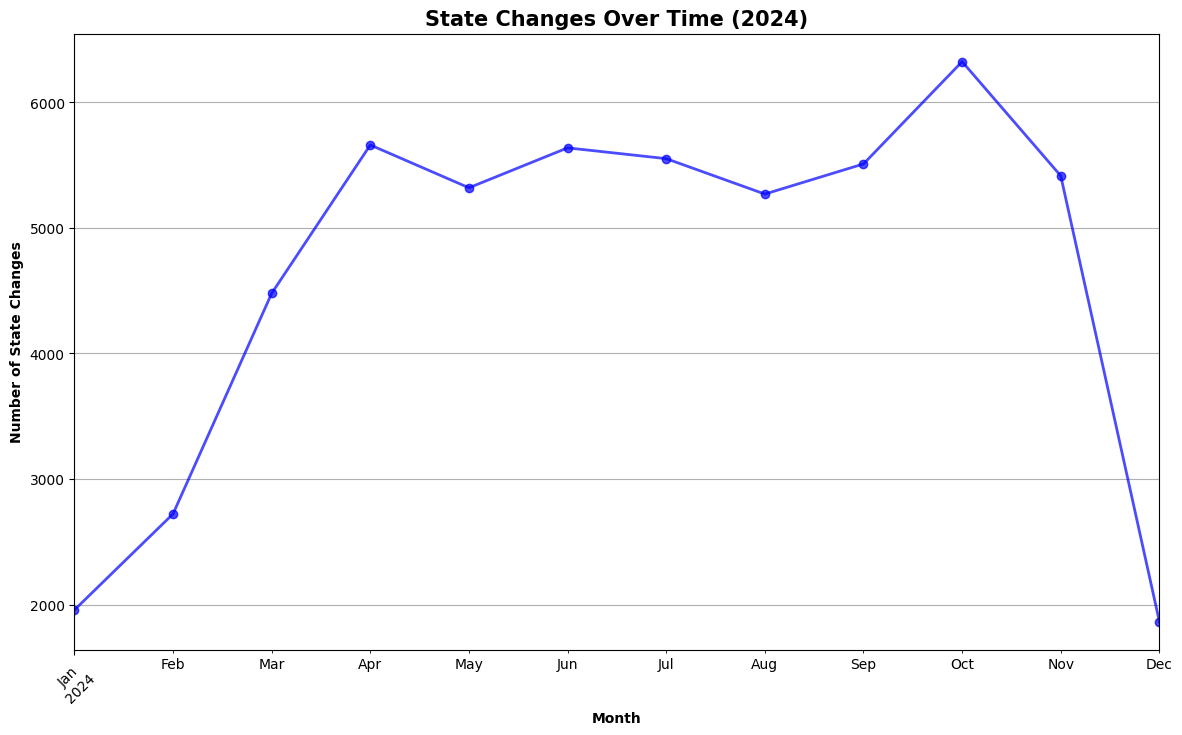

State Changes by Month (2024):
state_changed_at
2024-01    1957
2024-02    2722
2024-03    4479
2024-04    5661
2024-05    5320
2024-06    5638
2024-07    5552
2024-08    5270
2024-09    5510
2024-10    6325
2024-11    5415
2024-12    1864
Freq: M, dtype: int64


In [191]:
import matplotlib.pyplot as plt

# Assuming df_filtered is the DataFrame with your dataset

# Step 1: Filter data for the year 2024
df_filtered_2024 = df_filtered[df_filtered['state_changed_at'].dt.year == 2024]

# Step 2: Group by 'state_changed_at' (monthly frequency) and count state changes
state_changes_by_month_2024 = df_filtered_2024.groupby(df_filtered_2024['state_changed_at'].dt.to_period('M')).size()

# Step 3: Plot the time series of state changes for 2024
plt.figure(figsize=(14, 8))
state_changes_by_month_2024.plot(kind='line', marker='o', color='b', linewidth=2, alpha=0.7)
plt.title('State Changes Over Time (2024)', fontweight='bold', fontsize=15)
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of State Changes', fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Display the number of state changes by month for 2024
print("State Changes by Month (2024):")
print(state_changes_by_month_2024)


In [7]:
df_filtered['state'].unique()

array(['successful', 'submitted', 'live', 'failed', 'canceled', 'started',
       'suspended'], dtype=object)

In [8]:
df_filtered.shape[0]/df_id.shape[0]

0.13064066809785846

In [9]:
df_filtered['id'].nunique()

234600

In [10]:
df_filtered['year_month_final']

0         2023-10
1         2024-11
2         2024-11
3         2024-11
4         2016-11
           ...   
256373    2024-10
256374    2011-08
256375    2023-06
256376    2014-07
256377    2015-04
Name: year_month_final, Length: 256378, dtype: period[M]

In [11]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'year_month_final', 'state_changed_month'],
      dtype='object')

In [160]:
df_filtered['launched_at'] = pd.to_datetime(df_id['launched_at'], unit='s')
#df_filtered['state_changed_at'] = pd.to_datetime(df_filtered['state_changed_at'], unit='s')

# Check the first few rows to confirm correct conversion
print(df_filtered[['launched_at']].head())

# Check if there are any missing values in 'launched_at'
print(f"Missing values in 'launched_at': {df_filtered['launched_at'].isna().sum()}")
print(f"Missing values in 'state_changed_at': {df_filtered['state_changed_at'].isna().sum()}")


          launched_at
0 2024-01-13 00:16:49
1 2023-05-09 14:13:28
2 2023-08-29 20:25:23
3 2023-08-30 14:17:09
4 2024-01-12 21:16:05
Missing values in 'launched_at': 0
Missing values in 'state_changed_at': 0


In [73]:
df_filtered.shape

(256378, 33)

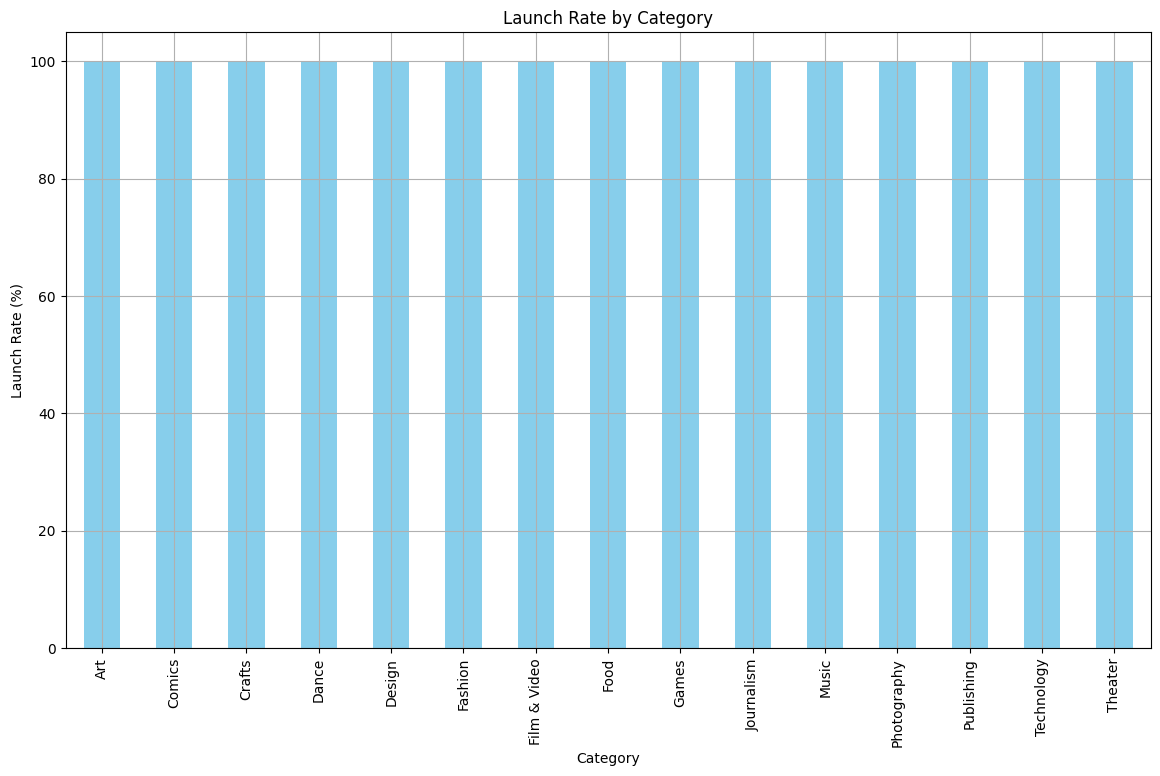

In [113]:


launch_rate_by_category = df_filtered.groupby('category_name')['launched_at'].apply(lambda x: x.notna().mean()) * 100

# Plot the launch rate by category
plt.figure(figsize=(14, 8))
launch_rate_by_category.plot(kind='bar', color='skyblue')
plt.title('Launch Rate by Category')
plt.xlabel('Category')
plt.ylabel('Launch Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


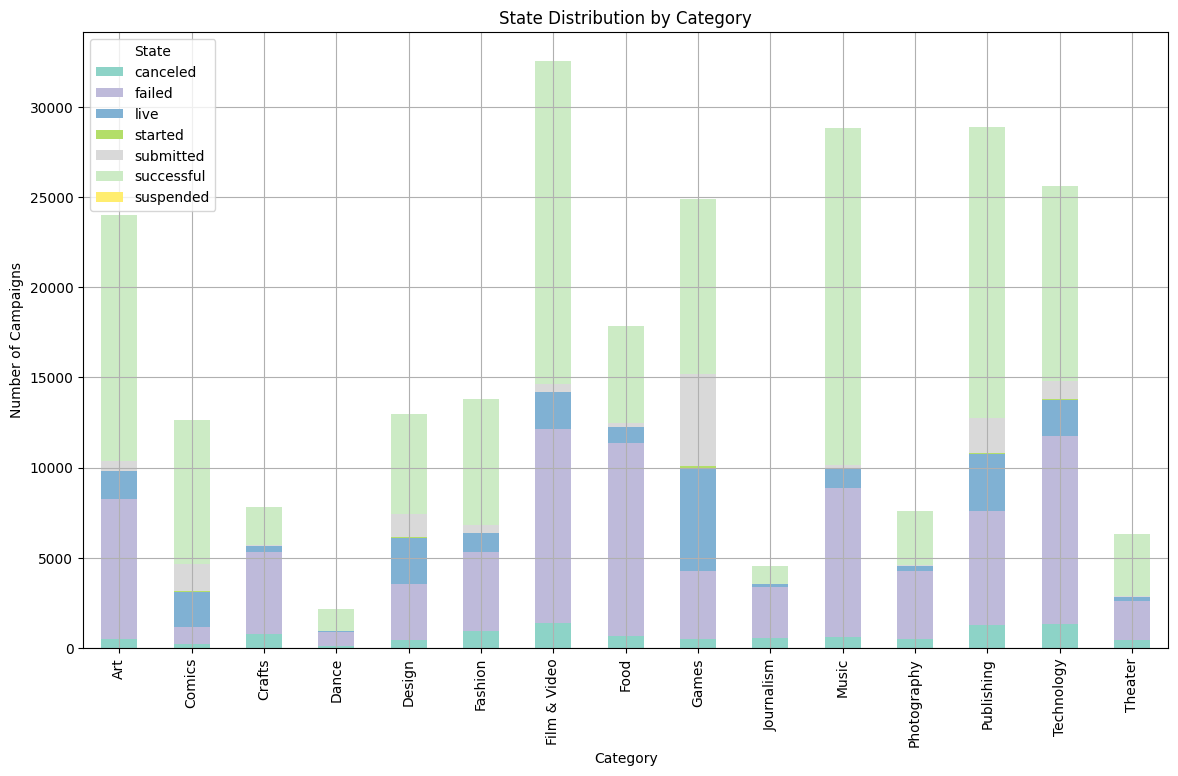

In [208]:
state_by_category = df_filtered.groupby('category_name')['state'].value_counts().unstack().fillna(0)

# Plot the distribution of states by category
state_by_category.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
plt.title('State Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Campaigns')
plt.xticks(rotation=90)
plt.legend(title='State')
plt.grid(True)
plt.show()


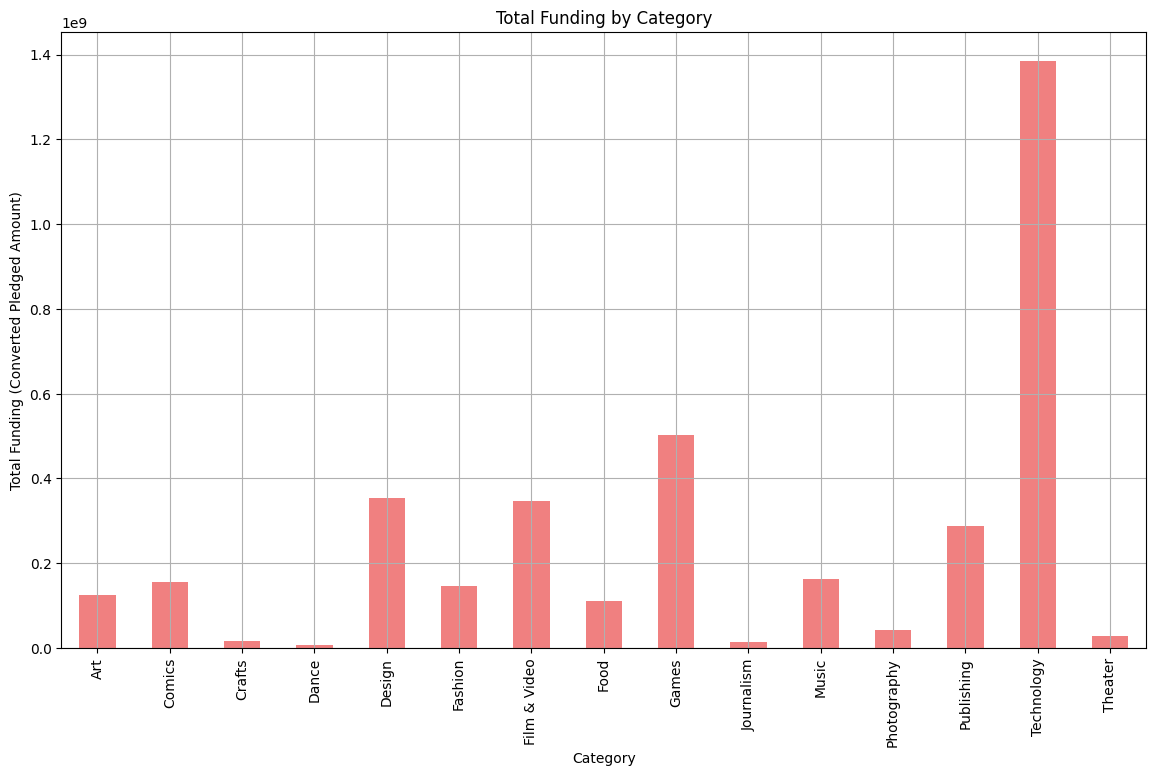

In [209]:
# Funding analysis by category
funding_by_category = df_filtered.groupby('category_name')['converted_pledged_amount'].sum()

# Plot the funding by category
plt.figure(figsize=(14, 8))
funding_by_category.plot(kind='bar', color='lightcoral')
plt.title('Total Funding by Category')
plt.xlabel('Category')
plt.ylabel('Total Funding (Converted Pledged Amount)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/2141731710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful_campaigns['backers_bin'] = pd.cut(successful_campaigns['backers_count'], bins=backers_bins, labels=labels)
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/2141731710.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  backers_by_state = successful_campaigns.groupby('backers_bin').size()


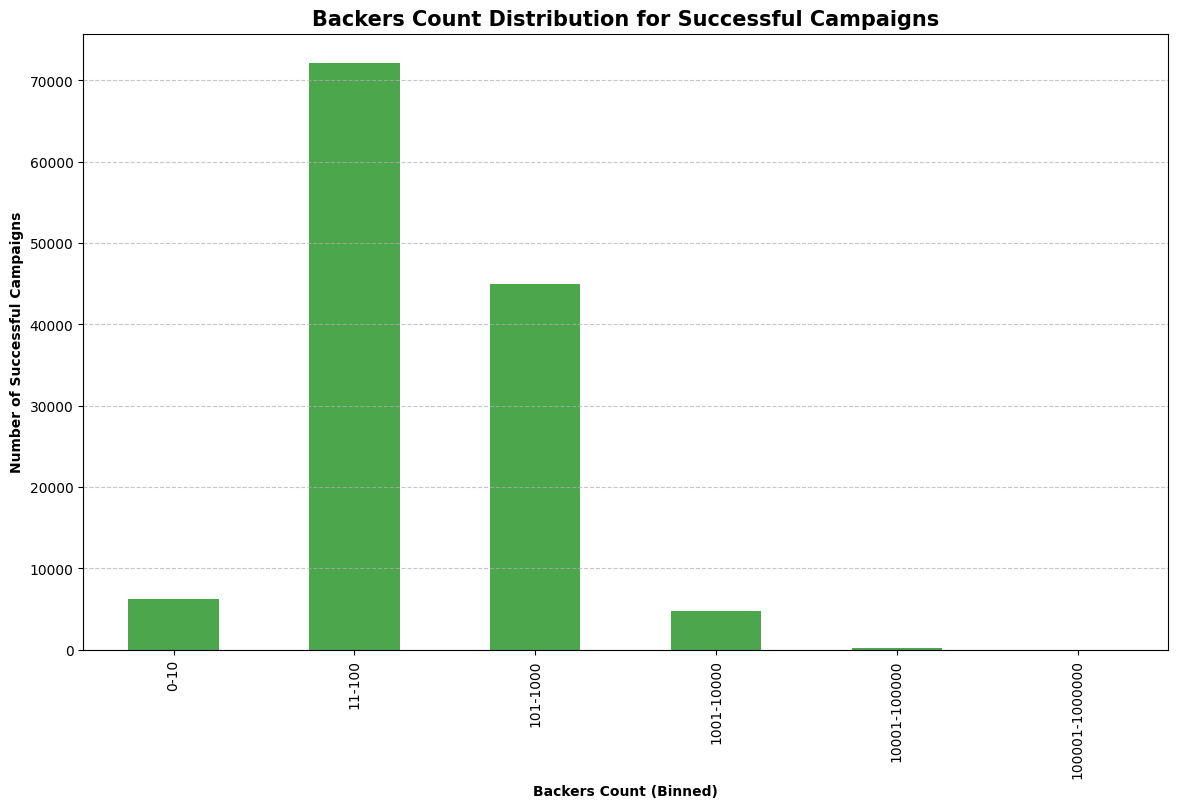

In [149]:

# Filter successful campaigns
successful_campaigns = df_filtered[df_filtered['state'] == 'successful']

# Create bins for backers_count (log scale)
backers_bins = [0, 10, 100, 1000, 10000, 100000, 1000000]
labels = ['0-10', '11-100', '101-1000', '1001-10000', '10001-100000', '100001-1000000']

# Categorize backers_count into bins
successful_campaigns['backers_bin'] = pd.cut(successful_campaigns['backers_count'], bins=backers_bins, labels=labels)

# Group by the binned backers count
backers_by_state = successful_campaigns.groupby('backers_bin').size()

# Plot backers count for successful campaigns (categorized into bins)
plt.figure(figsize=(14, 8))
backers_by_state.plot(kind='bar', alpha=0.7, color='green')
plt.title('Backers Count Distribution for Successful Campaigns', fontweight='bold', fontsize=15)
plt.xlabel('Backers Count (Binned)', fontweight='bold')
plt.ylabel('Number of Successful Campaigns', fontweight='bold')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


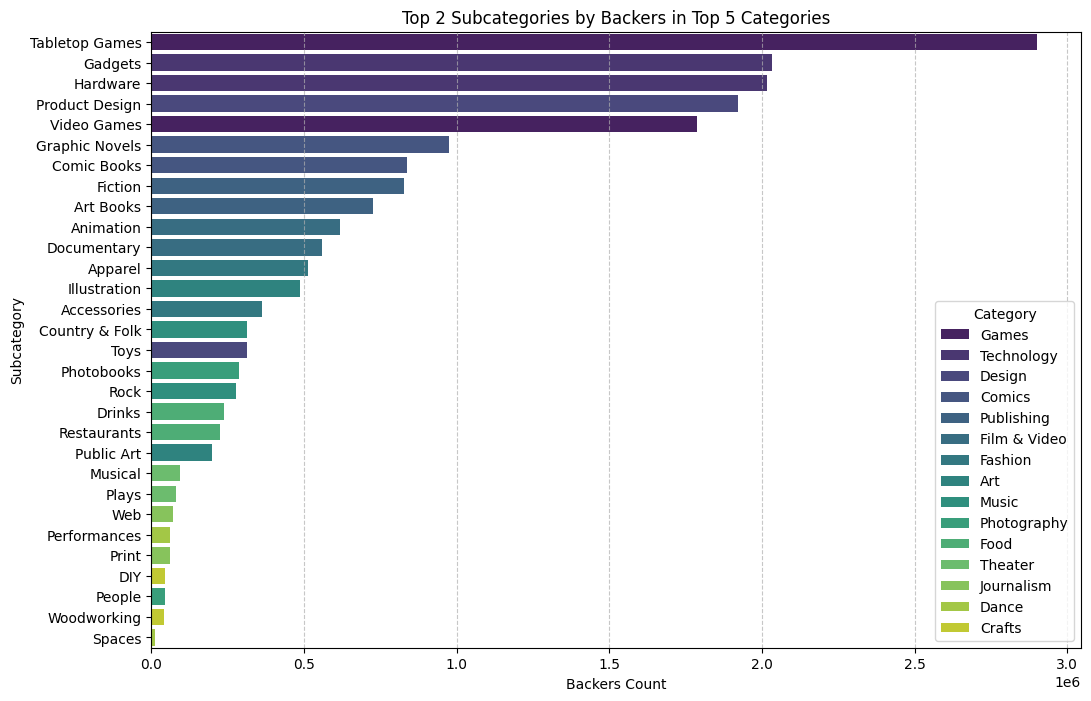

In [117]:


# Calculate the top N subcategories per category
top_n = 2
top_subcategories = df_filtered.groupby(['category_name', 'subcategory'])['backers_count'].sum().reset_index()
top_subcategories = top_subcategories.sort_values('backers_count', ascending=False).groupby('category_name').head(top_n)

# Plot horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=top_subcategories, x='backers_count', y='subcategory', hue='category_name', dodge=False, palette='viridis')
plt.title(f'Top {top_n} Subcategories by Backers in Top 5 Categories')
plt.xlabel('Backers Count')
plt.ylabel('Subcategory')
plt.legend(title='Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [84]:
import plotly.express as px

# Group by category and subcategory to sum the backers count
backers_by_subcategory = filtered_df.groupby(['category_name', 'subcategory'])['backers_count'].sum().reset_index()

# Create the treemap plot
fig = px.treemap(backers_by_subcategory, 
                 path=['category_name', 'subcategory'], 
                 values='backers_count',
                 color='backers_count',
                 hover_data=['subcategory'],
                 color_continuous_scale='viridis')

fig.update_layout(title='Backers Distribution by Subcategory (Top 5 Categories)', title_x=0.5)
fig.show()


In [86]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'month', 'category_name', 'subcategory', 'city', 'year_month',
       'year_month_final', 'state_changed_month'],
      dtype='object')

In [87]:
df_filtered['state_changed_at']

0        2023-10-12 14:10:20
1        2024-01-22 22:43:21
2        2024-09-04 13:59:06
3        2024-11-03 14:59:10
4        2016-11-18 14:32:40
                 ...        
256373   2024-10-30 02:00:01
256374   2011-08-04 04:31:09
256375   2023-06-04 12:12:20
256376   2014-07-24 15:23:00
256377   2015-04-10 02:00:31
Name: state_changed_at, Length: 256378, dtype: datetime64[ns]

In [88]:
df_filtered['year_month_final']

0         2023-10
1         2024-11
2         2024-11
3         2024-11
4         2016-11
           ...   
256373    2024-10
256374    2011-08
256375    2023-06
256376    2014-07
256377    2015-04
Name: year_month_final, Length: 256378, dtype: period[M]

In [118]:
df_filtered['launched_at']

0        2024-01-13 00:16:49
1        2023-05-09 14:13:28
2        2023-08-29 20:25:23
3        2023-08-30 14:17:09
4        2024-01-12 21:16:05
                 ...        
256373   2015-03-09 14:43:38
256374   2017-01-19 12:01:02
256375   2017-04-05 21:25:27
256376   2017-07-17 10:37:47
256377   2014-07-11 11:35:05
Name: launched_at, Length: 256378, dtype: datetime64[ns]

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/2504853736.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_success_rate, x='state', y='category_name', palette='viridis')


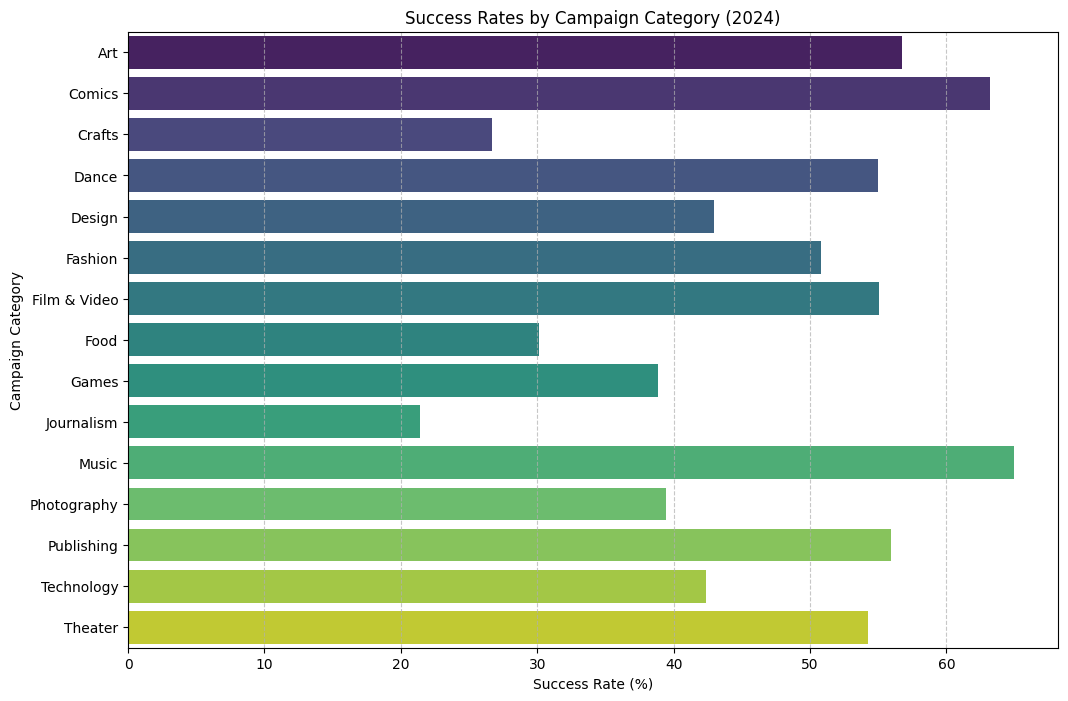

In [152]:
category_success_rate = df_filtered.groupby('category_name')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index()

# Plot the success rate by category
plt.figure(figsize=(12, 8))
sns.barplot(data=category_success_rate, x='state', y='category_name', palette='viridis')
plt.title('Success Rates by Campaign Category (2024)')
plt.xlabel('Success Rate (%)')
plt.ylabel('Campaign Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [108]:
df_filtered['launched_at']

0        2024-01-13 00:16:49
1        2023-05-09 14:13:28
2        2023-08-29 20:25:23
3        2023-08-30 14:17:09
4        2024-01-12 21:16:05
                 ...        
256373   2015-03-09 14:43:38
256374   2017-01-19 12:01:02
256375   2017-04-05 21:25:27
256376   2017-07-17 10:37:47
256377   2014-07-11 11:35:05
Name: launched_at, Length: 256378, dtype: datetime64[ns]

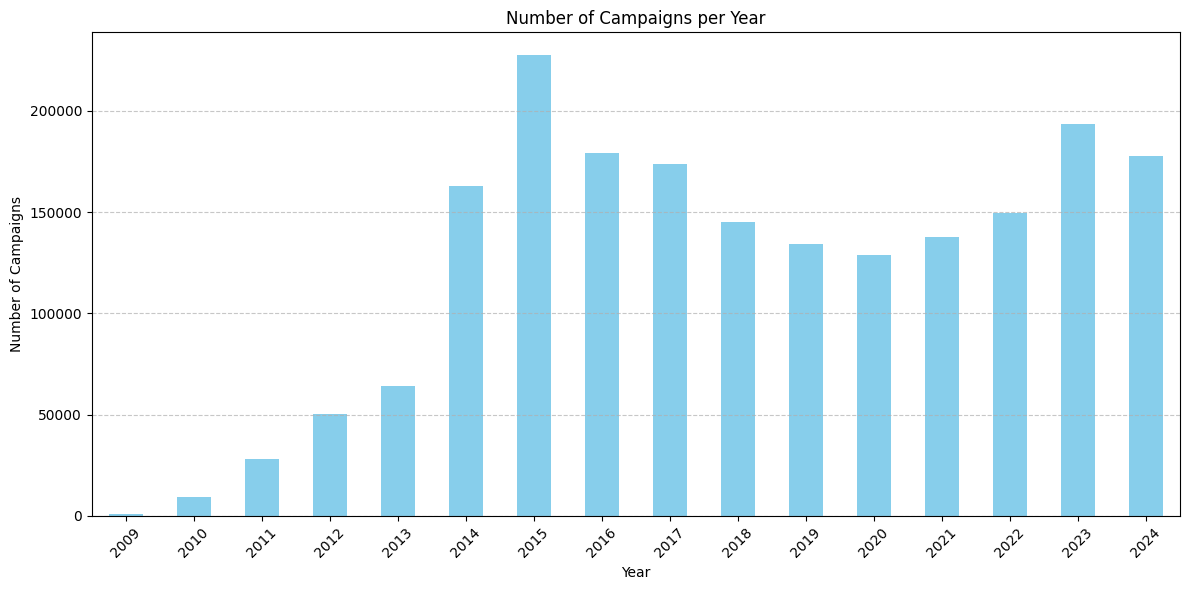

year
2009      1070
2010      9341
2011     27901
2012     50290
2013     64360
2014    163021
2015    227331
2016    179230
2017    173686
2018    144936
2019    134120
2020    128828
2021    137554
2022    149666
2023    193529
2024    177604
Name: id, dtype: int64


In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year_month' to a timestamp (first day of the month)
df_id['year_month'] = df_id['year_month'].dt.to_timestamp()

# Extract the year from 'year_month' column
df_id['year'] = df_id['year_month'].dt.year

# Group by 'year' and count the number of campaigns per year
campaigns_per_year = df_id.groupby('year')['id'].count()

# Plot the number of campaigns per year
plt.figure(figsize=(12, 6))
campaigns_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Campaigns per Year')
plt.xlabel('Year')
plt.ylabel('Number of Campaigns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the campaigns per year data
print(campaigns_per_year)



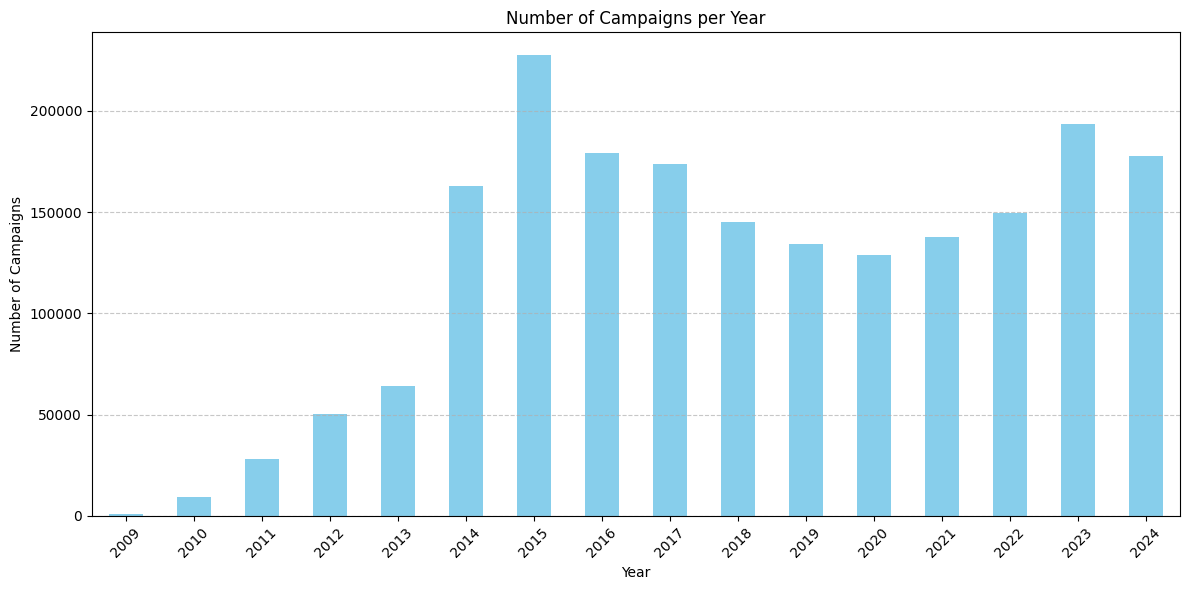

year
2009      1070
2010      9341
2011     27901
2012     50290
2013     64360
2014    163021
2015    227331
2016    179230
2017    173686
2018    144936
2019    134120
2020    128828
2021    137554
2022    149666
2023    193529
2024    177604
Name: id, dtype: int64


In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year_month' to a timestamp (first day of the month)
df_id['year_month'] = df_id['year_month'].dt.to_timestamp()

# Extract the year from 'year_month' column
df_id['year'] = df_id['year_month'].dt.year

# Group by 'year' and count the number of campaigns per year
campaigns_per_year = df_id.groupby('year')['id'].count()

# Plot the number of campaigns per year
plt.figure(figsize=(12, 6))
campaigns_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Campaigns per Year')
plt.xlabel('Year')
plt.ylabel('Number of Campaigns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the campaigns per year data
print(campaigns_per_year)


Number of invalid launched_at values: 0
Number of successful campaigns per year:
launch_year
1970    128343
Name: count, dtype: int64


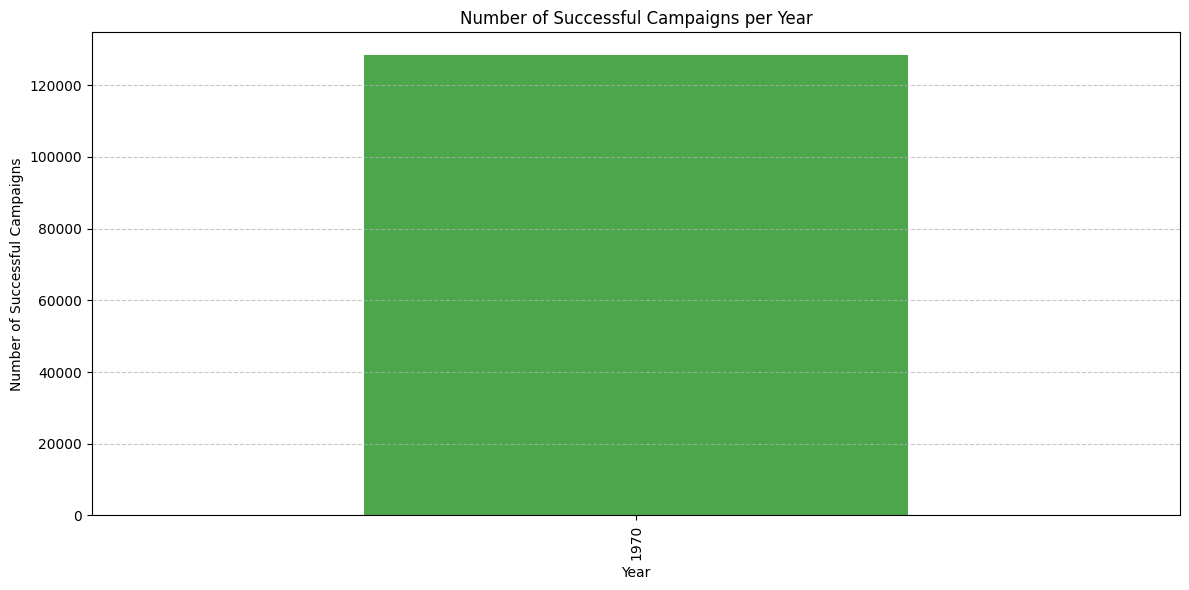

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'launched_at' is in datetime format, and check for any invalid values
df_filtered['launched_at'] = pd.to_datetime(df_filtered['launched_at'], errors='coerce')

# Check for invalid values after conversion
invalid_dates = df_filtered[df_filtered['launched_at'].isna()]
print(f"Number of invalid launched_at values: {len(invalid_dates)}")

# Filter out rows where 'launched_at' is invalid
df_filtered_valid = df_filtered.dropna(subset=['launched_at'])

# Extract the year from the 'launched_at' column
df_filtered_valid['launch_year'] = df_filtered_valid['launched_at'].dt.year

# Filter for successful campaigns
successful_campaigns = df_filtered_valid[df_filtered_valid['state'] == 'successful']

# Count the number of successful campaigns per year
successful_campaigns_per_year = successful_campaigns['launch_year'].value_counts().sort_index()

# Display the successful campaigns per year
print("Number of successful campaigns per year:")
print(successful_campaigns_per_year)

# Plot the number of successful campaigns per year
plt.figure(figsize=(12, 6))
successful_campaigns_per_year.plot(kind='bar', color='green', alpha=0.7)
plt.title("Number of Successful Campaigns per Year")
plt.xlabel("Year")
plt.ylabel("Number of Successful Campaigns")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



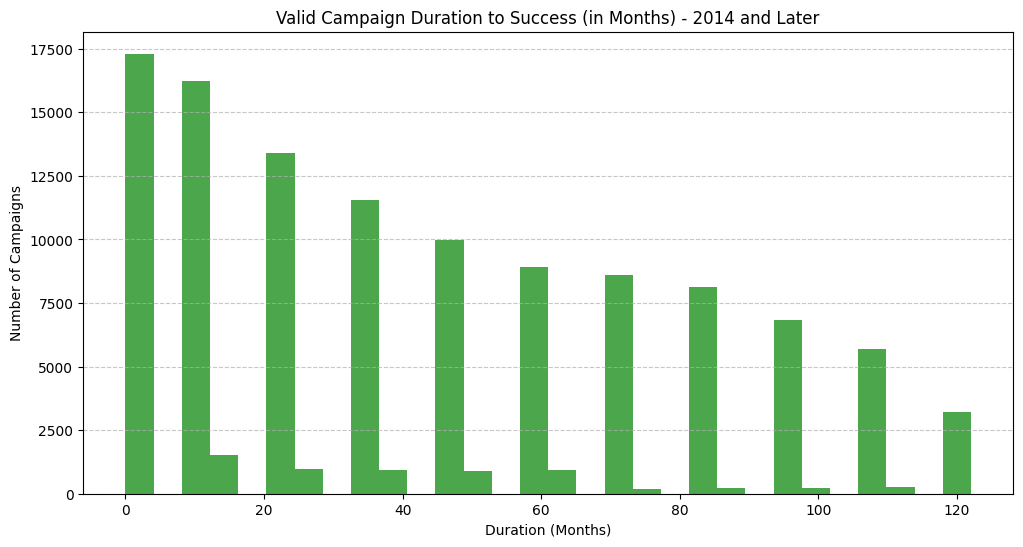

Summary of Valid Campaign Duration to Success (in months):
count    115979.000000
mean         44.594539
std          35.184441
min           0.000000
25%          12.000000
50%          36.000000
75%          72.000000
max         122.000000
Name: months_to_final_state, dtype: float64


In [132]:

import matplotlib.pyplot as plt
import pandas as pd

# Filter for campaigns with final states only (successful, failed, canceled, etc.)
valid_states = ['successful', 'failed', 'canceled', 'suspended', 'live']  # Add other final states as necessary
df_filtered_final = df_filtered[df_filtered['state'].isin(valid_states)]

# Filter out campaigns launched before 2014
df_filtered_final = df_filtered_final[df_filtered_final['launch_year'] >= 2014]

# Filter out invalid durations (ensure 'months_to_final_state' is non-negative)
valid_campaigns = df_filtered_final[df_filtered_final['months_to_final_state'] >= 0]

# Exclude extreme values (e.g., duration greater than 200 months)
valid_campaigns_filtered = valid_campaigns[valid_campaigns['months_to_final_state'] <= 200]

# Summary of valid campaign duration to success
valid_duration_summary = valid_campaigns_filtered['months_to_final_state'].describe()

# Plot the valid campaign duration to success
plt.figure(figsize=(12, 6))
plt.hist(valid_campaigns_filtered['months_to_final_state'].dropna(), bins=30, color='green', alpha=0.7)
plt.title("Valid Campaign Duration to Success (in Months) - 2014 and Later")
plt.xlabel("Duration (Months)")
plt.ylabel("Number of Campaigns")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display summary of valid duration to success
print("Summary of Valid Campaign Duration to Success (in months):")
print(valid_duration_summary)



In [128]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'year_month_final', 'state_changed_month',
       'launch_year'],
      dtype='object')

In [166]:
# Ensure that 'launched_at' is in datetime format (if not already)
df_filtered['launched_at'] = pd.to_datetime(df_filtered['launched_at'], errors='coerce')

# Filter campaigns between 2014 and 2024
df_filtered_2014_2024 = df_filtered[(df_filtered['launched_at'].dt.year >= 2014) & (df_filtered['launched_at'].dt.year <= 2024)]

# Check the shape of the filtered dataset to confirm
print(f"Filtered dataset shape: {df_filtered_2014_2024.shape}")

# Continue your analysis with the filtered dataset


Filtered dataset shape: (229114, 37)


In [167]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'year_month_final', 'state_changed_month',
       'launch_year'],
      dtype='object')

In [47]:
# Create goal_range based on the usd_pledged or goal column if it doesn't exist
# Assuming 'goal' is in USD and we want to create goal ranges:
df_filtered['goal_range'] = pd.cut(df_filtered['goal'], 
                                   bins=[0, 5000, 20000, 50000, 100000, float('inf')],
                                   labels=['0-5k', '5k-20k', '20k-50k', '50k-100k', '100k+'])


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/2699523381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_success_rates, x='state', y='country_displayable_name', palette='viridis',


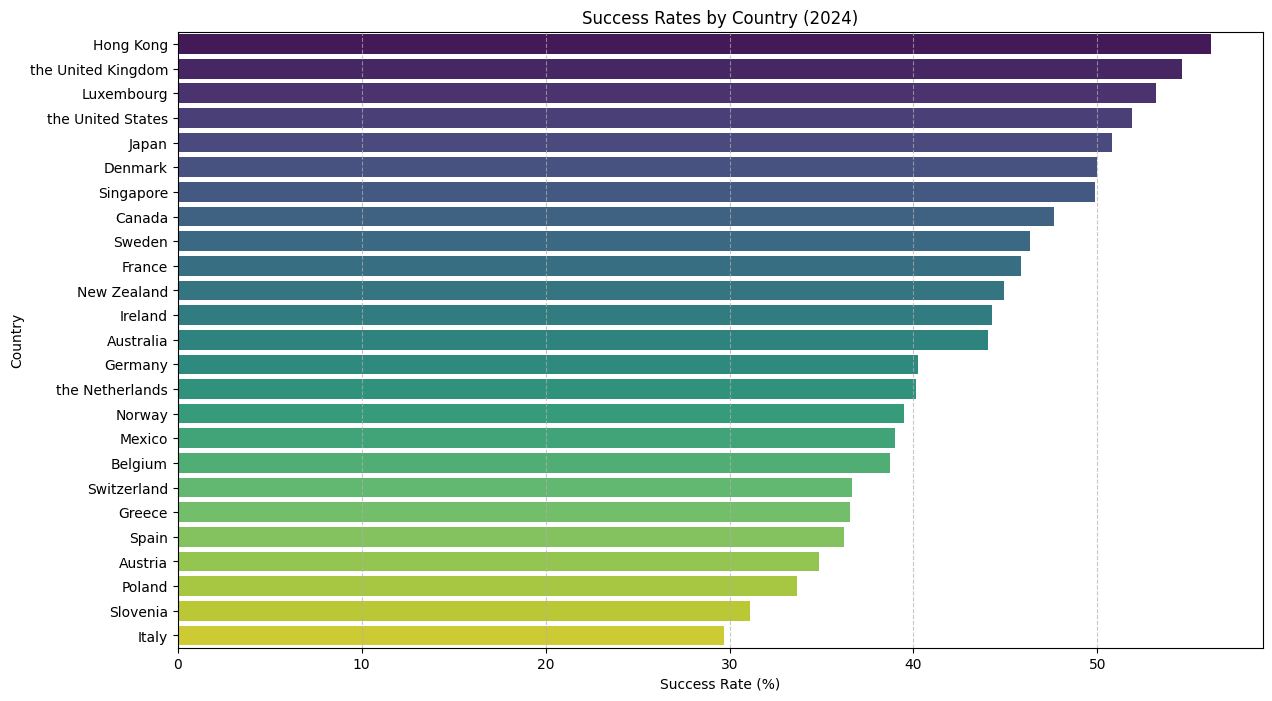

In [73]:
# Compute success rates by country
country_success_rates = df_filtered.groupby('country_displayable_name')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index()

# Plot the success rates by country
plt.figure(figsize=(14, 8))
sns.barplot(data=country_success_rates, x='state', y='country_displayable_name', palette='viridis', 
            order=country_success_rates.sort_values('state', ascending=False)['country_displayable_name'])
plt.xlabel('Success Rate (%)')
plt.ylabel('Country')
plt.title('Success Rates by Country (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [74]:
# Filter campaigns with valid 'duration_to_success_months'
valid_campaigns = df_filtered[df_filtered['duration_to_success_months'] >= 0]

# Group by category and calculate the average campaign duration to success
category_duration_success = valid_campaigns.groupby('category_name')['duration_to_success_months'].describe()

# Plot the distribution of campaign durations by category
plt.figure(figsize=(14, 8))
sns.boxplot(data=valid_campaigns, x='category_name', y='duration_to_success_months', palette='viridis')
plt.title("Campaign Duration to Success by Category")
plt.xlabel('Category')
plt.ylabel('Duration to Success (Months)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Print the summary statistics for each category
print(category_duration_success)


KeyError: 'duration_to_success_months'

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/1041350825.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/1041350825.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




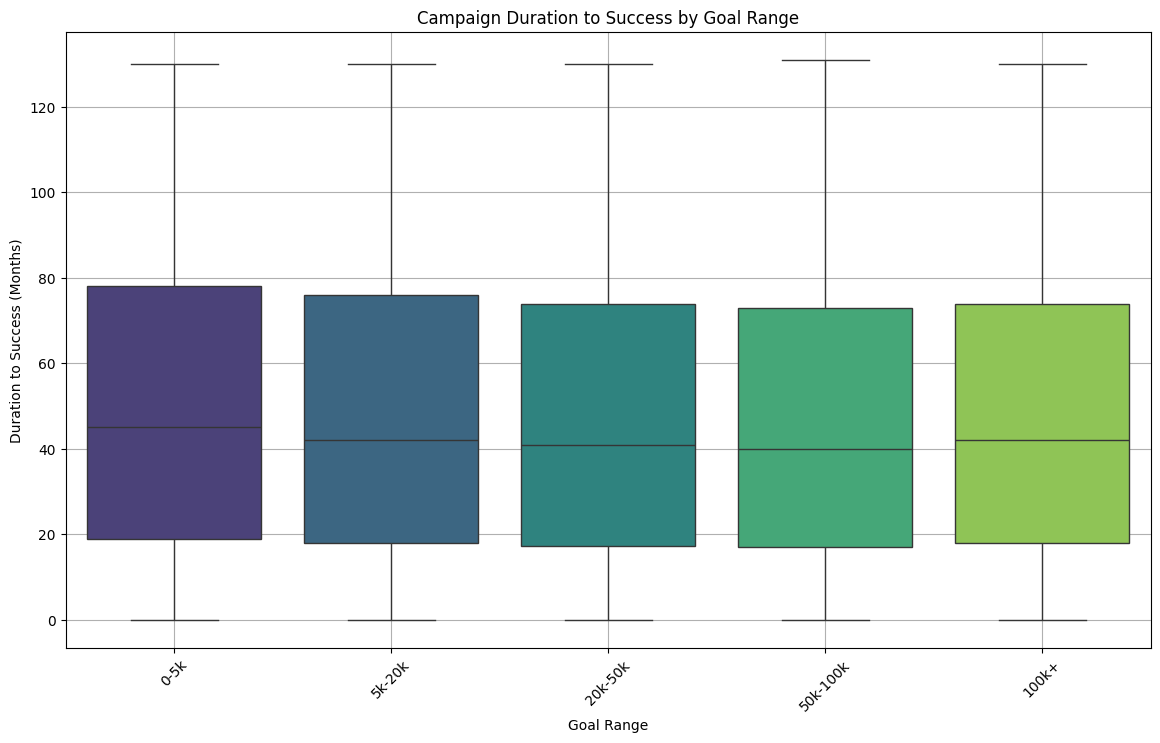

              count       mean        std  min    25%   50%   75%    max
goal_range                                                              
0-5k        63333.0  49.908468  34.951967  0.0  19.00  45.0  78.0  130.0
5k-20k      31845.0  48.402041  34.448000  0.0  18.00  42.0  76.0  130.0
20k-50k     12690.0  47.384476  34.201656  0.0  17.25  41.0  74.0  130.0
50k-100k     4656.0  46.827964  33.972325  0.0  17.00  40.0  73.0  131.0
100k+        4304.0  47.604554  34.203167  0.0  18.00  42.0  74.0  130.0


In [131]:
# Group by goal range and compute the summary statistics for the valid campaign duration to success
goal_duration_summary = valid_campaigns.groupby('goal_range')['duration_to_success_months'].describe()

# Plot the distribution of campaign durations for each goal range
plt.figure(figsize=(14, 8))
sns.boxplot(data=valid_campaigns, x='goal_range', y='duration_to_success_months', palette='viridis')
plt.title("Campaign Duration to Success by Goal Range")
plt.xlabel('Goal Range')
plt.ylabel('Duration to Success (Months)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the summary statistics for each goal range
print(goal_duration_summary)


<Figure size 1400x800 with 0 Axes>

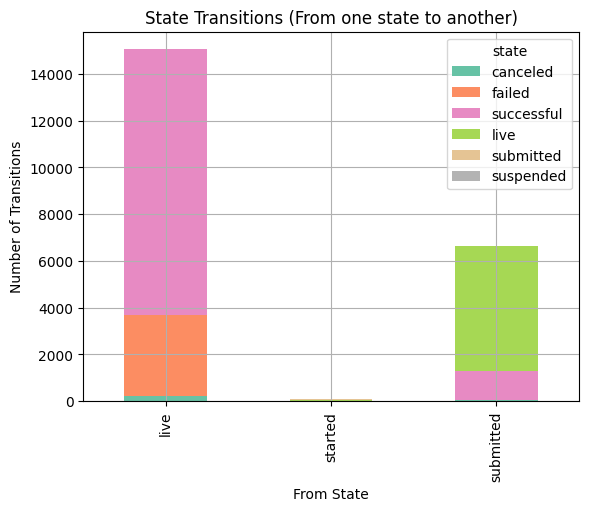

In [79]:
# Analyze transitions in state (from one state to another)
df_filtered['state_transition'] = df_filtered.groupby('id')['state'].shift(1)

# Plot the transitions
state_transitions = df_filtered.groupby(['state_transition', 'state']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
state_transitions.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('State Transitions (From one state to another)')
plt.xlabel('From State')
plt.ylabel('Number of Transitions')
plt.grid(True)
plt.show()


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/3720498781.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_transitions['state_transition'] = state_transitions['previous_state'] + ' -> ' + state_transitions['state']
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/3720498781.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transition_counts.head(20), x='state_transition', y='count', palette='viridis')


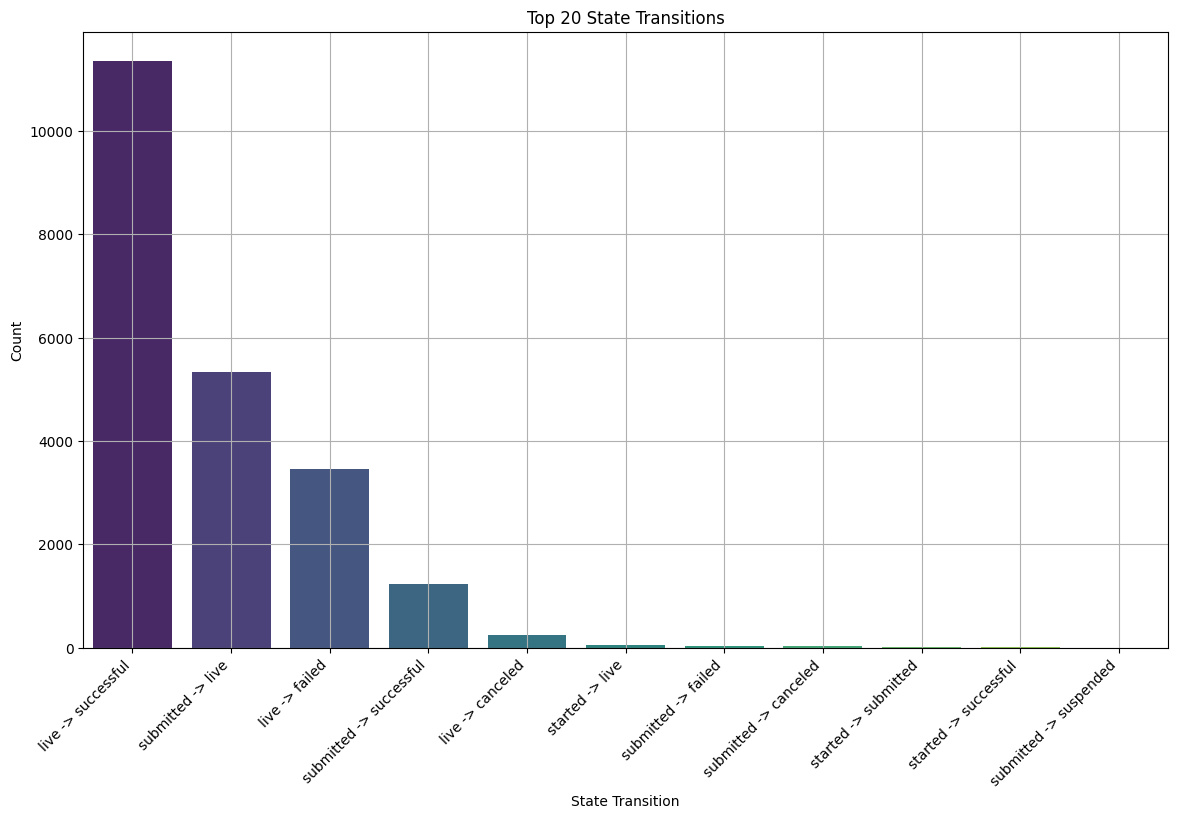

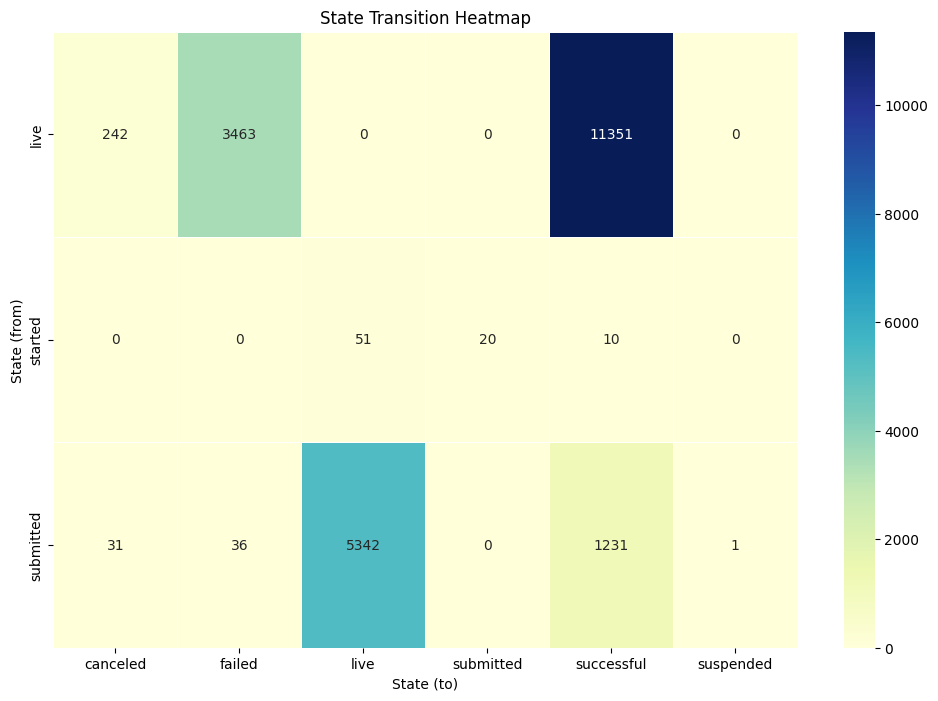

Top State Transitions:
           state_transition  count
0        live -> successful  11351
1         submitted -> live   5342
2            live -> failed   3463
3   submitted -> successful   1231
4          live -> canceled    242
5           started -> live     51
6       submitted -> failed     36
7     submitted -> canceled     31
8      started -> submitted     20
9     started -> successful     10
10   submitted -> suspended      1


In [49]:


# Assuming df_filtered is already loaded and sorted by campaign ID and state change time
# Sort the data by 'id' and 'state_changed_at' to ensure we can track state transitions in the correct order
df_filtered = df_filtered.sort_values(by=['id', 'state_changed_at'])

# Shift the 'state' column to get the previous state for each campaign
df_filtered['previous_state'] = df_filtered.groupby('id')['state'].shift(1)

# Filter out rows where there is no state transition (i.e., the previous state is missing)
state_transitions = df_filtered[df_filtered['previous_state'].notna()]

# Create a new column for the state transition (e.g., "submitted -> live")
state_transitions['state_transition'] = state_transitions['previous_state'] + ' -> ' + state_transitions['state']

# Count the number of each transition
transition_counts = state_transitions['state_transition'].value_counts().reset_index()
transition_counts.columns = ['state_transition', 'count']

# Plot the most common state transitions
plt.figure(figsize=(14, 8))
sns.barplot(data=transition_counts.head(20), x='state_transition', y='count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 State Transitions')
plt.xlabel('State Transition')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Optional: Create a heatmap for transitions
# Pivot the data to create a matrix of transitions
transition_matrix = pd.crosstab(state_transitions['previous_state'], state_transitions['state'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(transition_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('State Transition Heatmap')
plt.xlabel('State (to)')
plt.ylabel('State (from)')
plt.show()

# Print out transition counts
print("Top State Transitions:")
print(transition_counts.head(20))


**Live to Successful**: The most common transition, indicating that a significant portion of campaigns that go live eventually succeed.

**Submitted to Live**: Many campaigns move from the "submitted" state to the "live" state, indicating active progression.

**Live to Failed**: A notable number of campaigns that are live end up failing, which may indicate issues during the campaign's active period.

**Success Transitions**: "Submitted to Successful" and "Live to Successful" are common, reflecting the standard path to a successful campaign.


In [143]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'month', 'category_name',
       'subcategory', 'city', 'year_month', 'year_month_final',
       'state_changed_month', 'launch_year', 'year_launched',
       'duration_to_success_months', 'goal_range', 'state_transition',
       'previous_state'],
      dtype='object')

In [149]:
df_filtered['converted_pledged_amount']

converted_pledged_amount
0.0         14570
1.0          8192
2.0          1919
10.0         1052
11.0          998
            ...  
24365.0         1
18733.0         1
50330.0         1
30672.0         1
304142.0        1
Name: count, Length: 38478, dtype: int64

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/937446316.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_by_goal = df_filtered.groupby('goal_range')['state'].apply(lambda x: (x == 'successful').mean() * 100)


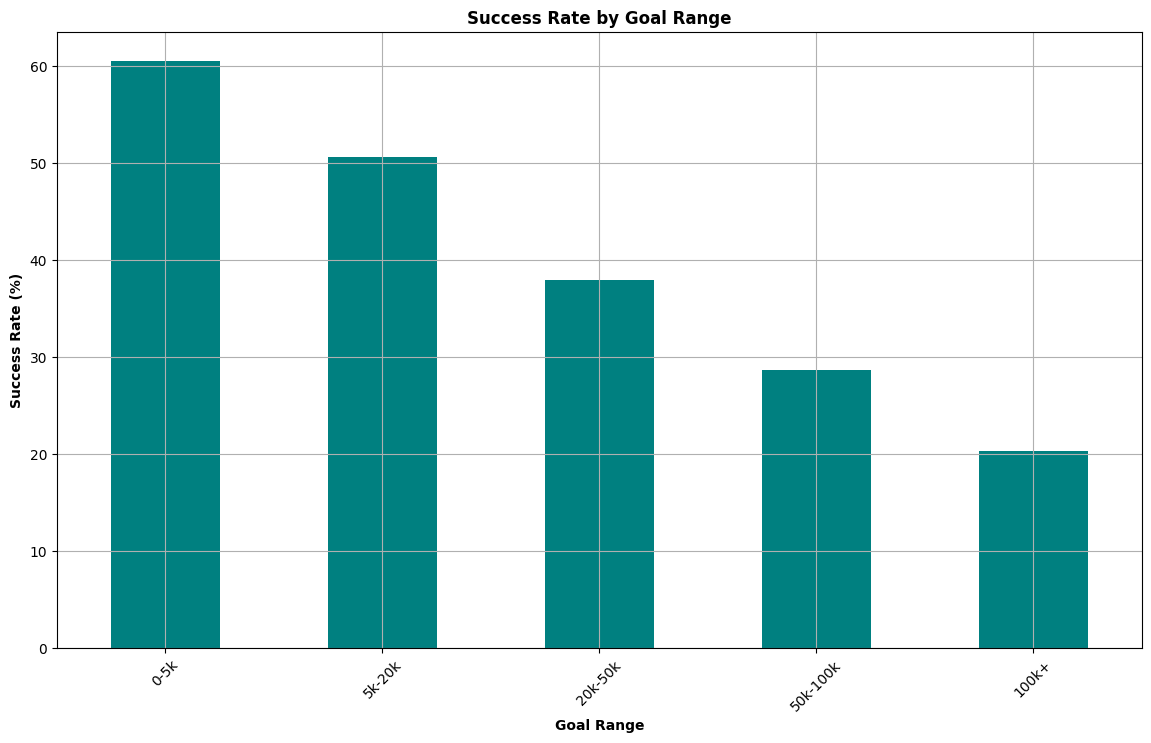

In [80]:
# Define goal ranges
df_filtered['goal_range'] = pd.cut(df_filtered['goal'], bins=[0, 5000, 20000, 50000, 100000, float('inf')],
                                   labels=['0-5k', '5k-20k', '20k-50k', '50k-100k', '100k+'])

# Calculate success rate by goal range
success_rate_by_goal = df_filtered.groupby('goal_range')['state'].apply(lambda x: (x == 'successful').mean() * 100)

# Plot the success rate by goal range
plt.figure(figsize=(14, 8))
success_rate_by_goal.plot(kind='bar', color='teal')
plt.title('Success Rate by Goal Range',fontweight='bold')
plt.xlabel('Goal Range',fontweight='bold')
plt.ylabel('Success Rate (%)',fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


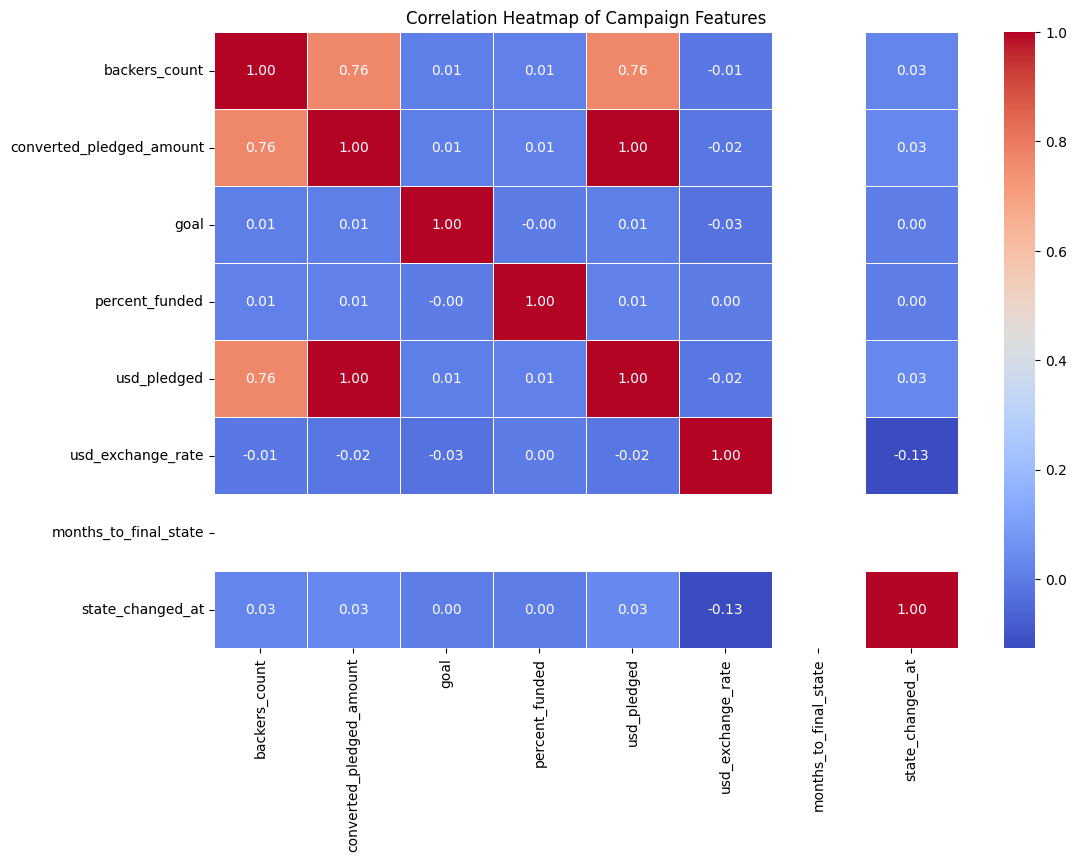

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns to analyze correlation
corr_columns = ['backers_count', 'converted_pledged_amount', 'goal', 'percent_funded',
                'usd_pledged', 'usd_exchange_rate', 'months_to_final_state', 'state_changed_at']

# Calculate correlation matrix
corr_matrix = df_filtered[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Campaign Features')
plt.show()


In [137]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'month', 'category_name',
       'subcategory', 'city', 'year_month', 'year_month_final',
       'state_changed_month', 'launch_year', 'year_launched',
       'duration_to_success_months', 'goal_range', 'state_transition',
       'previous_state'],
      dtype='object')

In [138]:
df_filtered.describe().transpose()

count                           mean  \
backers_count               229114.0                     133.537034   
converted_pledged_amount    217053.0                   15374.732706   
goal                        229114.0                   62618.610827   
id                          229114.0              1072283161.684223   
launched_at                   229114  2019-02-21 03:10:59.146263808   
percent_funded              229114.0                     638.510265   
pledged                     229114.0                   41788.630269   
state_changed_at              229114  2019-09-01 04:31:22.752520960   
static_usd_rate             229114.0                       0.932809   
usd_pledged                 217053.0                   15380.664974   
year_month_final                   0                            NaT   
launch_year                 229114.0                    2018.660248   
year_launched               229114.0                    2018.660248   
duration_to_success_months  229114.0                       6.303582   

                                            min  \
backers_count                               0.0   
converted_pledged_amount                    0.0   
goal                                        0.0   
id                                       1293.0   
launched_at                 2014-01-01 00:56:30   
percent_funded                              0.0   
pledged                                     0.0   
state_changed_at            2009-05-16 10:00:25   
static_usd_rate                             0.0   
usd_pledged                                 0.0   
year_month_final                            NaT   
launch_year                              2014.0   
year_launched                            2014.0   
duration_to_success_months               -172.0   

                                                      25%  \
backers_count                                         3.0   
converted_pledged_amount                            140.0   
goal                                               1000.0   
id                                            534819681.0   
launched_at                 2016-04-05 18:46:22.750000128   
percent_funded                                       1.25   
pledged                                              75.0   
state_changed_at                      2016-03-12 18:39:40   
static_usd_rate                                       1.0   
usd_pledged                                         140.0   
year_month_final                                      NaT   
launch_year                                        2016.0   
year_launched                                      2016.0   
duration_to_success_months                          -37.0   

                                                   50%  \
backers_count                                     23.0   
converted_pledged_amount                        1682.0   
goal                                            5000.0   
id                                        1069954095.5   
launched_at                 2018-12-03 16:34:08.500000   
percent_funded                              100.849545   
pledged                                         1499.0   
state_changed_at            2019-10-22 14:02:02.500000   
static_usd_rate                                    1.0   
usd_pledged                                     1685.0   
year_month_final                                   NaT   
launch_year                                     2018.0   
year_launched                                   2018.0   
duration_to_success_months                         8.0   

                                                      75%  \
backers_count                                        85.0   
converted_pledged_amount                           7236.0   
goal                                              13000.0   
id                                           1610738676.0   
launched_at                 2022-02-13 00:03:39.750000128   
percent_funded                                

In [42]:
df_filtered['year_month_final']

0         2023-10
1         2024-11
2         2024-11
3         2024-11
4         2016-11
           ...   
256373    2024-10
256374    2011-08
256375    2023-06
256376    2014-07
256377    2015-04
Name: year_month_final, Length: 256378, dtype: period[M]

In [43]:
df_filtered[df_filtered['id']==df_filtered['id'][9]].state

9           live
10    successful
Name: state, dtype: object

In [44]:
df_filtered.shape

(256378, 34)

In [82]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'state_changed_month', 'launch_year',
       'goal_range', 'previous_state', 'first_appearance_month',
       'final_state_month', 'months_to_final_state',
       'months_to_final_state_capped', 'state_transition'],
      dtype='object')

In [84]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256378 entries, 0 to 256377
Data columns (total 43 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   backers_count                       256378 non-null  int64         
 1   blurb                               256361 non-null  object        
 2   converted_pledged_amount            242826 non-null  float64       
 3   country_displayable_name            256378 non-null  object        
 4   currency                            256378 non-null  object        
 5   current_currency                    256378 non-null  object        
 6   disable_communication               256378 non-null  bool          
 7   fx_rate                             256378 non-null  float64       
 8   goal                                256378 non-null  float64       
 9   id                                  256378 non-null  int64         
 10  is_disli

In [85]:
# Ensure 'launch_year' and 'state_changed_month' are properly in the correct format
df_filtered['launch_month'] = pd.to_datetime(df_filtered['launch_year'].astype(str) + '-01')  # assuming the launch year is the month
df_filtered['state_changed_month'] = pd.to_datetime(df_filtered['state_changed_month'].astype(str), format='%Y-%m')  # ensure the correct format

# Calculate the difference between 'state_changed_month' and 'launch_month' in months
df_filtered['months_to_final_state'] = (df_filtered['state_changed_month'].dt.year - df_filtered['launch_month'].dt.year) * 12 + \
                                        (df_filtered['state_changed_month'].dt.month - df_filtered['launch_month'].dt.month)

# If you want to cap the months (for example, capping at 24 months), you can use:
df_filtered['months_to_final_state_capped'] = df_filtered['months_to_final_state'].clip(upper=24)


In [86]:
# Remove rows with missing months_to_final_state
df_filtered_valid = df_filtered[df_filtered['months_to_final_state'].notnull()]

# Alternatively, fill missing values with the median (or other strategy)
df_filtered['months_to_final_state'].fillna(df_filtered['months_to_final_state'].median(), inplace=True)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/3295371303.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['months_to_final_state'].fillna(df_filtered['months_to_final_state'].median(), inplace=True)


In [87]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256378 entries, 0 to 256377
Data columns (total 44 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   backers_count                       256378 non-null  int64         
 1   blurb                               256361 non-null  object        
 2   converted_pledged_amount            242826 non-null  float64       
 3   country_displayable_name            256378 non-null  object        
 4   currency                            256378 non-null  object        
 5   current_currency                    256378 non-null  object        
 6   disable_communication               256378 non-null  bool          
 7   fx_rate                             256378 non-null  float64       
 8   goal                                256378 non-null  float64       
 9   id                                  256378 non-null  int64         
 10  is_disli

In [154]:
campaign_id = df_filtered['id'].iloc[100]
df_filtered[df_filtered['id'] == campaign_id][['year_month', 'state']]


year_month   state
106    2014-08  failed

In [156]:
df_filtered.shape

(229114, 38)

In [59]:
df_filtered.isnull().sum()

backers_count                              0
blurb                                     17
converted_pledged_amount               13552
country_displayable_name                   0
currency                                   0
current_currency                           0
disable_communication                      0
fx_rate                                    0
goal                                       0
id                                         0
is_disliked                                0
is_launched                                0
is_liked                                   0
is_starrable                               0
launched_at                                0
name                                       0
percent_funded                             0
pledged                                    0
prelaunch_activated                        0
slug                                       0
spotlight                                  0
staff_pick                                 0
state     

In [60]:
df_filtered.drop('year_month_final',axis=1,inplace=True)

In [61]:
df_filtered.shape

(256378, 42)

In [75]:
df_filtered['state_transition'].isnull().sum()

KeyError: 'state_transition'

In [170]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'month', 'category_name',
       'subcategory', 'city', 'year_month', 'state_changed_month',
       'launch_year', 'year_launched', 'duration_to_success_months',
       'goal_range', 'state_transition', 'previous_state',
       'months_to_final_state'],
      dtype='object')

In [171]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229114 entries, 0 to 256377
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   backers_count               229114 non-null  int64         
 1   converted_pledged_amount    217053 non-null  float64       
 2   country_displayable_name    229114 non-null  object        
 3   currency                    229114 non-null  object        
 4   current_currency            229114 non-null  object        
 5   disable_communication       229114 non-null  bool          
 6   goal                        229114 non-null  float64       
 7   id                          229114 non-null  int64         
 8   is_disliked                 229114 non-null  bool          
 9   is_launched                 229114 non-null  bool          
 10  is_liked                    229114 non-null  bool          
 11  is_starrable                229114 non-null 

Summary of Campaign Duration to Final State (in months):
count    135623.000000
mean        148.825199
std         293.545054
min           0.000000
25%          13.000000
50%          48.000000
75%          85.000000
max        1032.000000
Name: months_to_final_state, dtype: float64


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/1295827769.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_valid['duration_category'] = pd.cut(df_filtered_valid['months_to_final_state'], bins=bins, labels=labels, right=False)
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/1295827769.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered_valid, x='duration_category', palette='viridis')


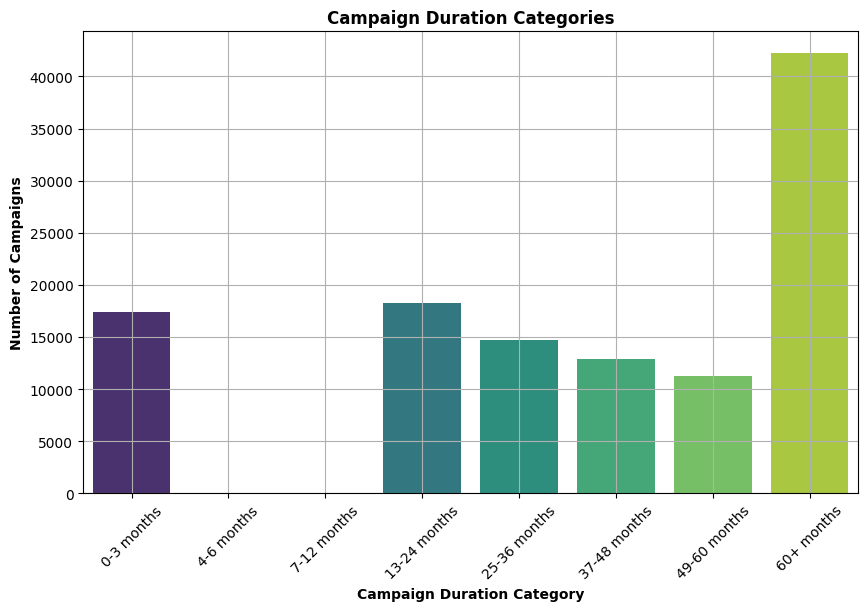

KeyError: "['duration_to_success_months'] not in index"

In [142]:


# Remove rows with negative or unreasonable 'months_to_final_state'
df_filtered_valid = df_filtered[df_filtered['months_to_final_state'] >= 0]

# Describe the campaign duration to final state (in months)
duration_summary = df_filtered_valid['months_to_final_state'].describe()
print("Summary of Campaign Duration to Final State (in months):")
print(duration_summary)



# Categorize campaign durations (for more detailed analysis)
bins = [0, 3, 6, 12, 24, 36, 48, 60, 120]
labels = ['0-3 months', '4-6 months', '7-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '60+ months']
df_filtered_valid['duration_category'] = pd.cut(df_filtered_valid['months_to_final_state'], bins=bins, labels=labels, right=False)

# Plot campaign duration categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered_valid, x='duration_category', palette='viridis')
plt.title('Campaign Duration Categories',fontweight='bold')
plt.xlabel('Campaign Duration Category',fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Campaigns',fontweight='bold')
plt.grid(True)
plt.show()

# Correlate campaign duration with other features
correlation = df_filtered_valid[['goal', 'backers_count', 'usd_pledged', 'percent_funded', 'duration_to_success_months', 'months_to_final_state']].corr()
print("\nCorrelation between features related to campaign duration:")
print(correlation)

# Visualize correlation with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Campaign Features')
plt.show()


## Months to reach final state ##

In [77]:

# Ensure 'month' (first appearance) is in Period[M] format
df_filtered['first_appearance_month'] = pd.to_datetime(df_filtered['month']).dt.to_period('M')

# Convert 'year_month_final' (final state) to Period[M] format, handling NaT safely
df_filtered.loc[df_filtered['year_month_final'].notna(), 'final_state_month'] = (
    pd.to_datetime(df_filtered['year_month_final'], errors='coerce').dt.to_period('M')
)

# Filter completed campaigns
df_completed = df_filtered[df_filtered['final_state_month'].notna()].copy()

# Compute months taken to reach final state **only where both dates are valid**
df_completed['months_to_final_state'] = df_completed.apply(
    lambda row: (row['final_state_month'] - row['first_appearance_month']).n
    if pd.notna(row['final_state_month']) and pd.notna(row['first_appearance_month'])
    else None,
    axis=1
)

# Count campaigns that took more than 12 months
long_duration_count = (df_completed['months_to_final_state'] > 12).sum()

# 🔹 Display the count
print(f"\n📊 Number of campaigns that took more than 12 months to reach a final state: {long_duration_count}")

# 🔎 Display those campaigns
long_duration_campaigns = df_completed[df_completed['months_to_final_state'] > 12]
print("\n📌 Sample campaigns taking more than 12 months:")
print(long_duration_campaigns[['id', 'first_appearance_month', 'final_state_month', 'months_to_final_state']].head(10))


KeyError: 'year_month_final'

In [53]:
import pandas as pd

# Ensure 'month' (first appearance) is in Period[M] format
df_filtered['first_appearance_month'] = pd.to_datetime(df_filtered['month']).dt.to_period('M')

# Convert 'year_month_final' (final state) to Period[M] format, handling NaT safely
df_filtered.loc[df_filtered['year_month_final'].notna(), 'final_state_month'] = (
    pd.to_datetime(df_filtered['year_month_final'], errors='coerce').dt.to_period('M')
)

# Separate ongoing campaigns (NaN in final state)
df_ongoing = df_filtered[df_filtered['final_state_month'].isna()]
df_completed = df_filtered[df_filtered['final_state_month'].notna()]

# 🔹 Compute months taken to reach final state **only where both dates are valid**
df_completed = df_completed.copy()  # Prevent modifying original dataframe
df_completed['months_to_final_state'] = df_completed.apply(
    lambda row: max(1, (row['final_state_month'] - row['first_appearance_month']).n)
    if pd.notna(row['final_state_month']) and pd.notna(row['first_appearance_month'])
    else None,
    axis=1
)

# 🔹 Cap durations at 11 months for completed campaigns
df_completed['months_to_final_state_capped'] = df_completed['months_to_final_state'].apply(
    lambda x: min(x, 11) if pd.notna(x) else None
)

# 🔹 Merge back ongoing campaigns without modifying their duration
df_filtered = pd.concat([df_completed, df_ongoing], ignore_index=True)

# 🔎 Display updated summary
print("\n✅ Corrected Summary of Campaign Durations (Capped at 11 Months):")
print(df_filtered['months_to_final_state_capped'].describe())

# 🔎 Display longest campaigns (max 11 months)
longest_campaigns = df_filtered[df_filtered['months_to_final_state_capped'] == 11]
print("\n📌 Campaigns Taking the Longest to Reach Final State (11 Months):")
print(longest_campaigns[['id', 'month', 'year_month_final', 'months_to_final_state']].head(10))




✅ Corrected Summary of Campaign Durations (Capped at 11 Months):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: months_to_final_state_capped, dtype: float64

📌 Campaigns Taking the Longest to Reach Final State (11 Months):
Empty DataFrame
Columns: [id, month, year_month_final, months_to_final_state]
Index: []


In [249]:
# 🔹 Count states for campaigns lasting more than 1 month
long_duration_states = df_filtered[df_filtered['months_to_final_state_capped'] > 1]['state'].value_counts()

print("\n🔎 **State Distribution for Campaigns Longer than 1 Month:**")
print(long_duration_states)



🔎 **State Distribution for Campaigns Longer than 1 Month:**
state
submitted    10607
live          9157
started        440
Name: count, dtype: int64


In [250]:
df_filtered.shape

(256378, 38)

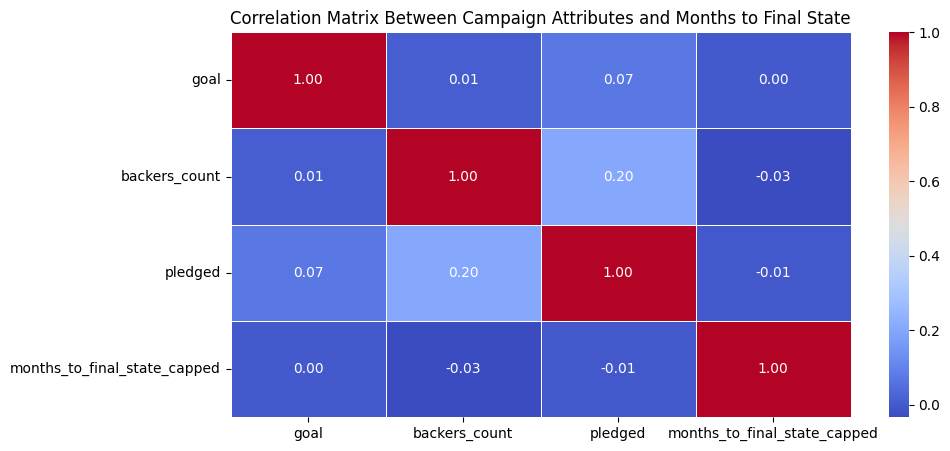


📊 Correlation Between Campaign Attributes and Duration:
                                  goal  backers_count   pledged  \
goal                          1.000000       0.008280  0.074661   
backers_count                 0.008280       1.000000  0.202683   
pledged                       0.074661       0.202683  1.000000   
months_to_final_state_capped  0.002201      -0.033405 -0.005115   

                              months_to_final_state_capped  
goal                                              0.002201  
backers_count                                    -0.033405  
pledged                                          -0.005115  
months_to_final_state_capped                      1.000000  


In [253]:
# Compute correlation matrix between attributes and months to final state
correlation_data = df_filtered[['goal', 'backers_count', 'pledged', 'months_to_final_state_capped']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Campaign Attributes and Months to Final State')
plt.show()

# Print correlation table
print("\n📊 Correlation Between Campaign Attributes and Duration:")
print(correlation_data)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_1336/1310791634.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_duration_distribution = df_filtered.groupby('goal_range')['months_to_final_state_capped'].mean()


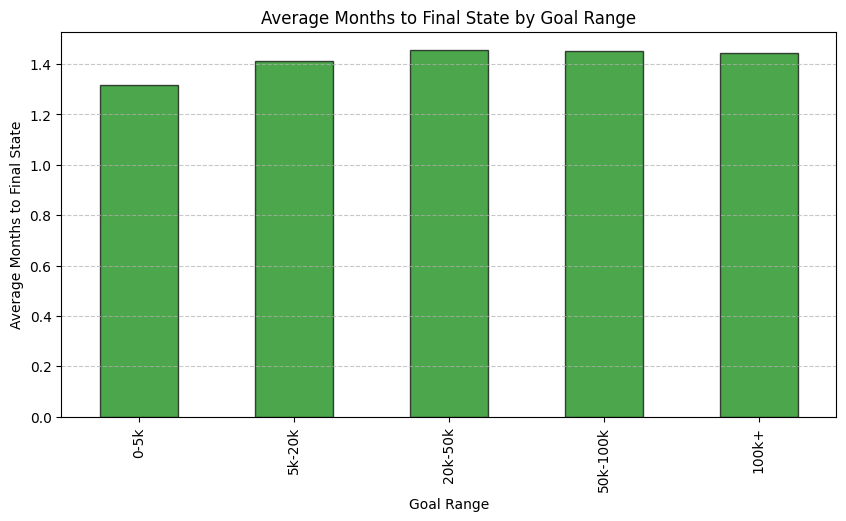


📊 Average Duration by Goal Range:
goal_range
0-5k        1.317309
5k-20k      1.413724
20k-50k     1.455692
50k-100k    1.451395
100k+       1.442827
Name: months_to_final_state_capped, dtype: float64


In [254]:
# Group by goal size to analyze campaigns by different goal ranges
goal_bins = [0, 5000, 20000, 50000, 100000, 1000000]
goal_labels = ['0-5k', '5k-20k', '20k-50k', '50k-100k', '100k+']
df_filtered['goal_range'] = pd.cut(df_filtered['goal'], bins=goal_bins, labels=goal_labels)

# Explore duration by goal range
goal_duration_distribution = df_filtered.groupby('goal_range')['months_to_final_state_capped'].mean()

# Plot goal duration distribution
plt.figure(figsize=(10, 5))
goal_duration_distribution.plot(kind='bar', color='g', alpha=0.7, edgecolor='black')
plt.xlabel('Goal Range')
plt.ylabel('Average Months to Final State')
plt.title('Average Months to Final State by Goal Range')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print goal duration distribution
print("\n📊 Average Duration by Goal Range:")
print(goal_duration_distribution)


In [261]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'month', 'category_name', 'subcategory', 'city', 'year_month',
       'year_month_final', 'months_to_final_state', 'first_appearance_month',
       'final_state_month', 'months_to_final_state_capped', 'final_state_year',
       'duration_category', 'goal_range'],
      dtype='object')


📊 Distribution of Campaigns by Duration Category:
duration_category
Short (1-3 months)     238822
Long (7-11 months)      17110
Medium (4-6 months)       446
Name: count, dtype: int64


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_1336/3765476612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='duration_category', palette='viridis')


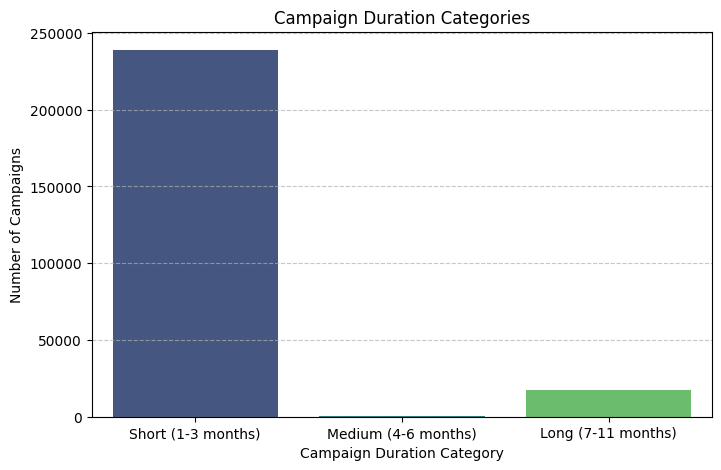

In [266]:
# Show campaigns by duration category (1-3 months, 4-6 months, 7-11 months)
print("\n📊 Distribution of Campaigns by Duration Category:")
print(df_filtered['duration_category'].value_counts())

# Plot the distribution of campaigns by duration category
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='duration_category', palette='viridis')
plt.xlabel('Campaign Duration Category')
plt.ylabel('Number of Campaigns')
plt.title('Campaign Duration Categories')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_1336/4272842939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rates_goal = df_filtered.groupby('goal_range')['state'].apply(
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_1336/4272842939.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rates_goal, x='goal_range', y='success_rate', palette='viridis')


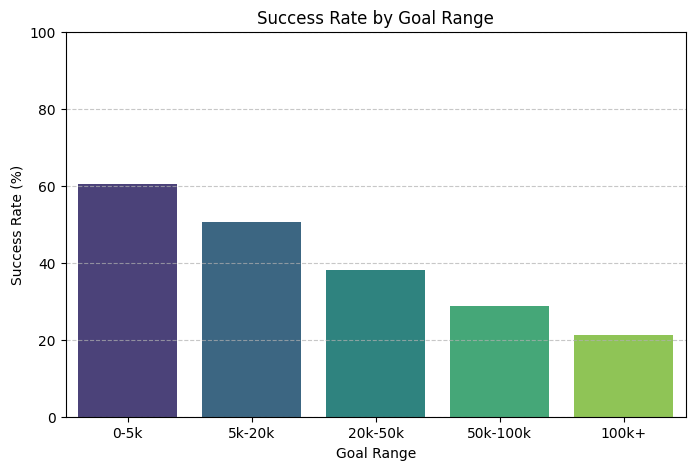


✅ Success Rate by Goal Range:
  goal_range  success_rate
0       0-5k     60.542303
1     5k-20k     50.671702
2    20k-50k     38.003066
3   50k-100k     28.708791
4      100k+     21.319797


In [267]:
# Success Rate by Goal Range
success_rates_goal = df_filtered.groupby('goal_range')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index()
success_rates_goal.rename(columns={'state': 'success_rate'}, inplace=True)

# Plot success rates by goal range
plt.figure(figsize=(8, 5))
sns.barplot(data=success_rates_goal, x='goal_range', y='success_rate', palette='viridis')
plt.xlabel('Goal Range')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate by Goal Range')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the success rates table
print("\n✅ Success Rate by Goal Range:")
print(success_rates_goal)


State Distribution of Campaigns:
state
successful    128343
failed         80645
live           23548
submitted      13076
canceled       10290
started          468
suspended          8
Name: count, dtype: int64


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_7815/2695383472.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='state', palette='viridis')


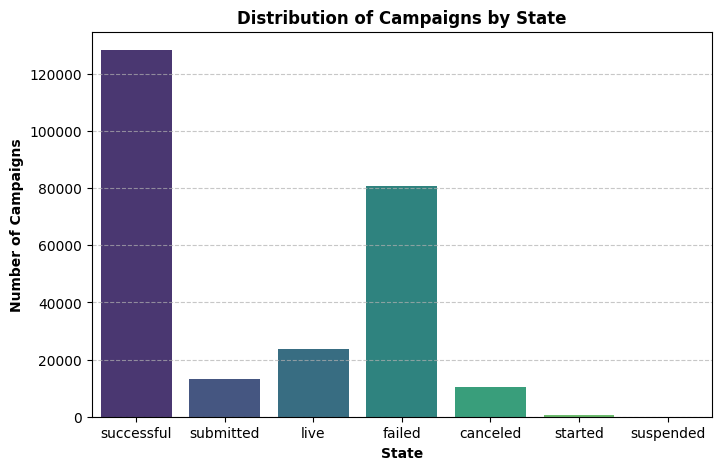

In [55]:
state_distribution = df_filtered['state'].value_counts()
print("State Distribution of Campaigns:")
print(state_distribution)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='state', palette='viridis')
plt.xlabel('State',fontweight='bold')
plt.ylabel('Number of Campaigns',fontweight='bold')
plt.title('Distribution of Campaigns by State',fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [49]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'month', 'category_name',
       'subcategory', 'city', 'year_month', 'year_month_final',
       'months_to_final_state', 'state_transition', 'goal_range'],
      dtype='object')

In [56]:
df_filtered.shape

(256378, 35)

## Campaign Duration ##

The plot above gives a distribution of campaign durations

In [179]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'month', 'category_name', 'subcategory', 'city', 'year_month',
       'year_month_final', 'months_to_final_state',
       'months_to_final_state_capped', 'duration_category'],
      dtype='object')

# Campaign Duration Category ##
Shows there is no significant correaltion betwwen the duration and the success rate. 

In [102]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'final_state_month_x', 'months_to_final_state_x',
       'year_month_final_x', 'year_month_final_y', 'year_month_final',
       'months_to_final_state_capped', 'first_appearance_month_x',
       'first_final_state_month_x', 'first_appearance_month_y',
       'first_final_state_month_y', 'first_appearance_month',
       'final_state_month_y', 'months_to_final_state_y',
       'months_to_final_state'],
    

In [56]:
# 🔹 Check columns that appear multiple times
duplicate_columns = [col for col in df_filtered.columns if col.endswith(('_x', '_y'))]
print("🚨 Duplicate Columns:\n", duplicate_columns)

# 🔹 Drop unwanted duplicate columns
df_filtered = df_filtered.drop(columns=[
    'final_state_month_x', 'year_month_final_x', 'year_month_final_y',
    'months_to_final_state_x', 'months_to_final_state_y', 'first_appearance_month_x',
    'first_final_state_month_x', 'first_appearance_month_y', 'first_final_state_month_y',
    'final_state_month_y'
])

# 🔹 Rename correct columns
df_filtered.rename(columns={
    'year_month_final': 'final_state_month',
    'months_to_final_state_capped': 'months_to_final_state'
}, inplace=True)

# 🔹 Check the final cleaned-up column list
print("\n✅ **Cleaned-Up Columns:**\n", df_filtered.columns)


🚨 Duplicate Columns:
 []


KeyError: "['final_state_month_x', 'year_month_final_x', 'year_month_final_y', 'months_to_final_state_x', 'months_to_final_state_y', 'first_appearance_month_x', 'first_final_state_month_x', 'first_appearance_month_y', 'first_final_state_month_y', 'final_state_month_y'] not found in axis"

In [57]:
print("Unique years in campaign_start_month:", df_filtered['campaign_start_month'].dt.year.unique()) 
#This is a bug in the code. It should be month not year.


KeyError: 'campaign_start_month'

In [188]:

df_filtered = df_filtered[df_filtered['campaign_start_month'].dt.year == 2024]

# Recompute yearly trends with only 2024 data
df_filtered['campaign_start_year'] = df_filtered['campaign_start_month'].dt.year
yearly_trends = df_filtered.groupby('campaign_start_year')['months_to_final_state'].mean().reset_index()

# Display fixed yearly trends
print("✅ Corrected Yearly Trends (Only 2024):")
print(yearly_trends)

# Verify unique years again
print("Unique years after filtering:", df_filtered['campaign_start_month'].dt.year.unique())


✅ Corrected Yearly Trends (Only 2024):
   campaign_start_year  months_to_final_state
0                 2024               1.747359
Unique years after filtering: [2024]


In [37]:


# Assuming 'months_to_final_state' column represents the campaign duration in months
# Group by month and calculate the average campaign duration
df_filtered['year_month'] = df_filtered['year_month'].dt.to_timestamp()

# Filter data for campaigns with valid 'months_to_final_state'
df_valid = df_filtered[df_filtered['months_to_final_state'] >= 0]

# Group by 'year_month' and calculate the average 'months_to_final_state'
avg_duration_by_month = df_valid.groupby('year_month')['months_to_final_state'].mean()

# Plot the campaign duration trend by month
plt.figure(figsize=(14, 8))
avg_duration_by_month.plot(kind='line', marker='o', color='b', linewidth=2, alpha=0.7)
plt.title('Campaign Duration Trend by Month')
plt.xlabel('Month')
plt.ylabel('Average Campaign Duration (Months)')
plt.grid(True)
plt.xticks(rotation=45)



plt.show()

# Display the average duration by month
print("📊 Campaign Duration Trend by Month:")
print(avg_duration_by_month)


KeyError: 'months_to_final_state'

In [58]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure the index is datetime format for proper decomposition
avg_duration_by_month.index = pd.to_datetime(avg_duration_by_month.index)

# Decompose the time series using seasonal decomposition
result = sm.tsa.seasonal_decompose(avg_duration_by_month, model='additive', period=12)  # period=12 for monthly seasonality

# Plot the decomposition components
plt.figure(figsize=(14, 8))

# Plot the observed data
plt.subplot(411)
plt.plot(result.observed, label='Observed', color='blue')
plt.title('Observed Campaign Duration Trend')
plt.legend(loc='best')

# Plot the trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='green')
plt.title('Trend Component')
plt.legend(loc='best')

# Plot the seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='best')

# Plot the residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='best')

# Display all plots
plt.tight_layout()
plt.show()

# Print the decomposition components
print("Decomposition Components:")
print(result)



NameError: name 'avg_duration_by_month' is not defined

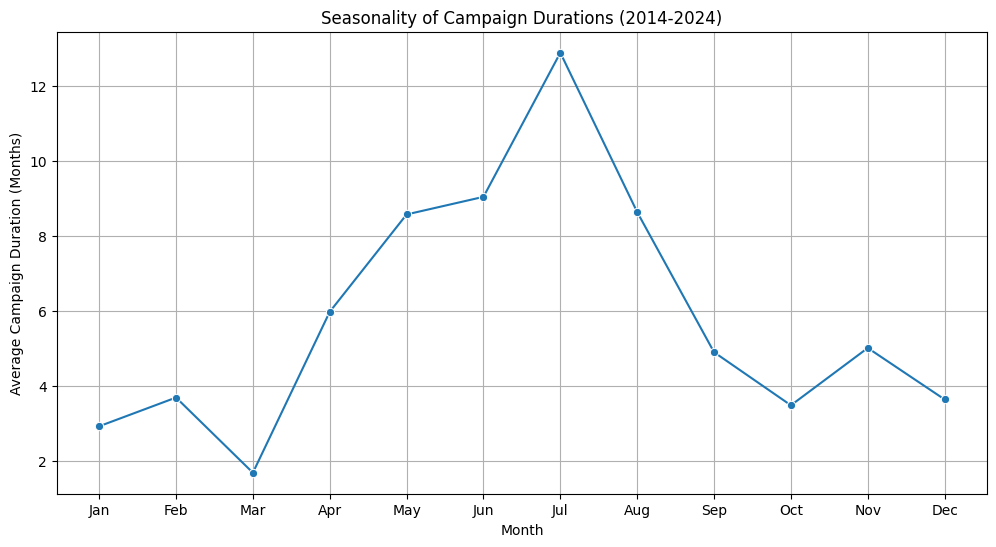


Monthly Average Campaign Duration:
launch_month
1      2.935433
2      3.701385
3      1.696794
4      5.988154
5      8.583536
6      9.052678
7     12.895584
8      8.646846
9      4.910307
10     3.494407
11     5.023206
12     3.650063
Name: months_to_final_state, dtype: float64


In [177]:


# Group by year and month to calculate the average campaign duration per month
df_filtered['launch_month'] = df_filtered['launched_at'].dt.month
avg_duration_by_month = df_filtered.groupby('launch_month')['months_to_final_state'].mean()

# Plotting the seasonal trend in campaign durations
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_duration_by_month.index, y=avg_duration_by_month.values, marker='o')
plt.title("Seasonality of Campaign Durations (2014-2024)")
plt.xlabel("Month")
plt.ylabel("Average Campaign Duration (Months)")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Display the monthly averages for campaign duration
print("\nMonthly Average Campaign Duration:")
print(avg_duration_by_month)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/3320220023.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




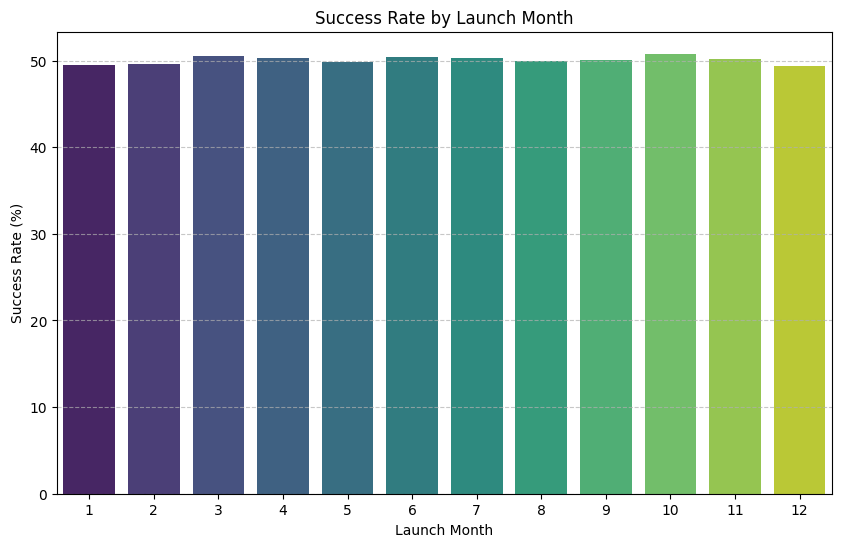

    launch_month      state
0              1  49.476910
1              2  49.577264
2              3  50.565717
3              4  50.302564
4              5  49.842672
5              6  50.418498
6              7  50.295564
7              8  49.978726
8              9  50.079281
9             10  50.795487
10            11  50.205073
11            12  49.403828


In [179]:
# Group by launch month and calculate the success rate of campaigns
launch_month_success_rate = df_filtered.groupby('launch_month')['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Compute success rate as percentage
).reset_index()

# Plot success rate by launch month
plt.figure(figsize=(10, 6))
sns.barplot(data=launch_month_success_rate, x='launch_month', y='state', palette='viridis')
plt.xlabel('Launch Month')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate by Launch Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(launch_month_success_rate)


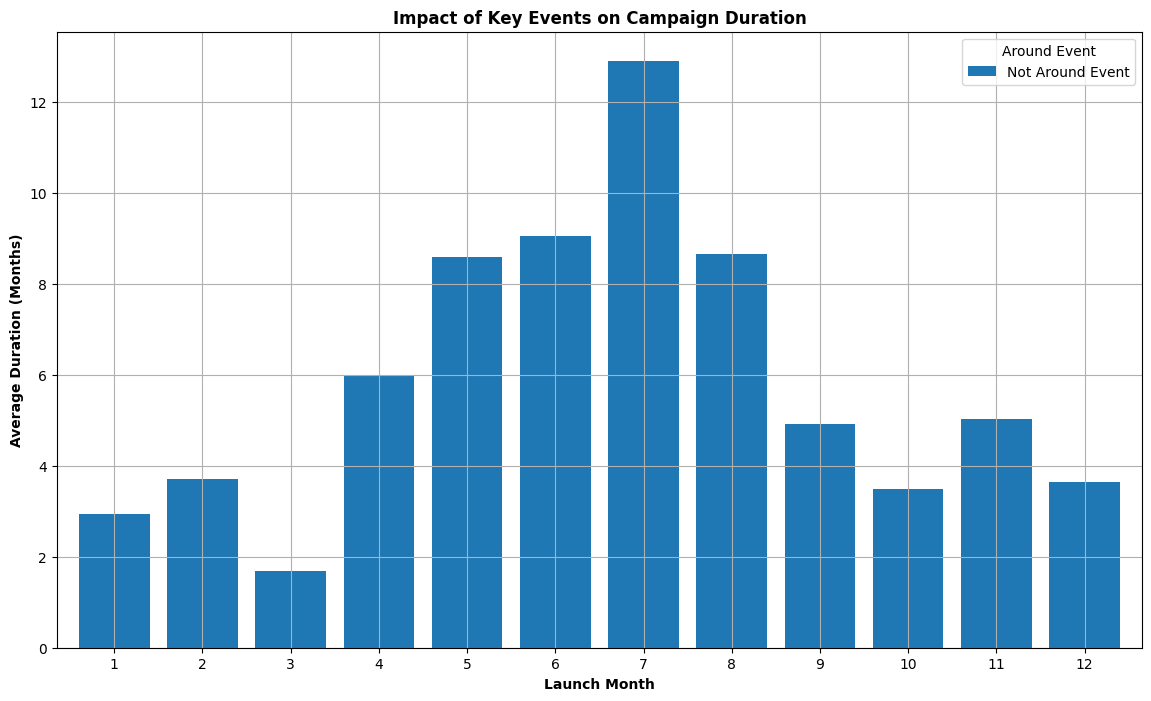

In [191]:
# Let's assume you have a list of key dates such as holidays or events
key_dates = ['2024-12-25', '2024-07-04']  

# Convert key dates to datetime
key_dates = pd.to_datetime(key_dates)

# Mark campaigns launched around these dates (within +/- 1 month)
df_filtered['is_around_event'] = df_filtered['launched_at'].apply(lambda x: any(abs((x - date).days) <= 30 for date in key_dates))

# Group by launch month and check the average duration for campaigns around key events
event_impact = df_filtered.groupby(['launch_month', 'is_around_event'])['months_to_final_state'].mean().unstack()

# Plot the impact of events on campaign duration
event_impact.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Impact of Key Events on Campaign Duration',fontweight='bold')
plt.xlabel('Launch Month',fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Average Duration (Months)',fontweight='bold')
plt.legend(title='Around Event', labels=['Not Around Event', 'Around Event'])
plt.grid(True)
plt.show()

# You can check the impact by other factors, such as holidays, events, etc.


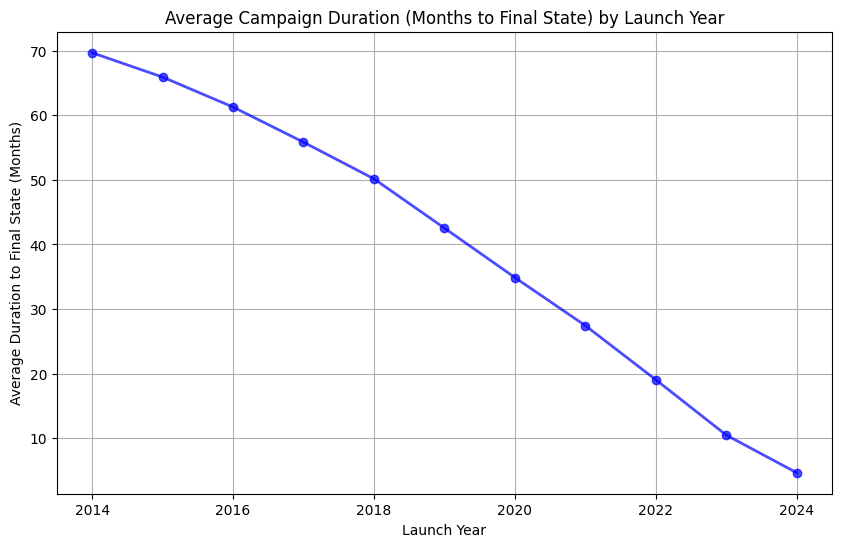


✅ Corrected Summary of Campaign Duration by Launch Year:
launch_year
2014    69.706737
2015    65.931483
2016    61.290028
2017    55.844215
2018    50.167512
2019    42.536154
2020    34.874210
2021    27.425839
2022    19.036559
2023    10.461130
2024     4.626119
Name: months_to_final_state, dtype: float64


In [196]:
# Remove rows where 'months_to_final_state' is negative or invalid
df_filtered_valid = df_filtered[df_filtered['months_to_final_state'] >= 0]

# Recalculate the monthly average campaign duration for valid campaigns
monthly_duration = df_filtered_valid.groupby('launch_year')['months_to_final_state'].mean()

# Plot the corrected campaign duration trend by launch year
plt.figure(figsize=(10, 6))
monthly_duration.plot(kind='line', marker='o', color='b', linewidth=2, alpha=0.7)

plt.title("Average Campaign Duration (Months to Final State) by Launch Year")
plt.xlabel("Launch Year")
plt.ylabel("Average Duration to Final State (Months)")
plt.grid(True)
plt.show()

# Display the cleaned summary
print("\n✅ Corrected Summary of Campaign Duration by Launch Year:")
print(monthly_duration)



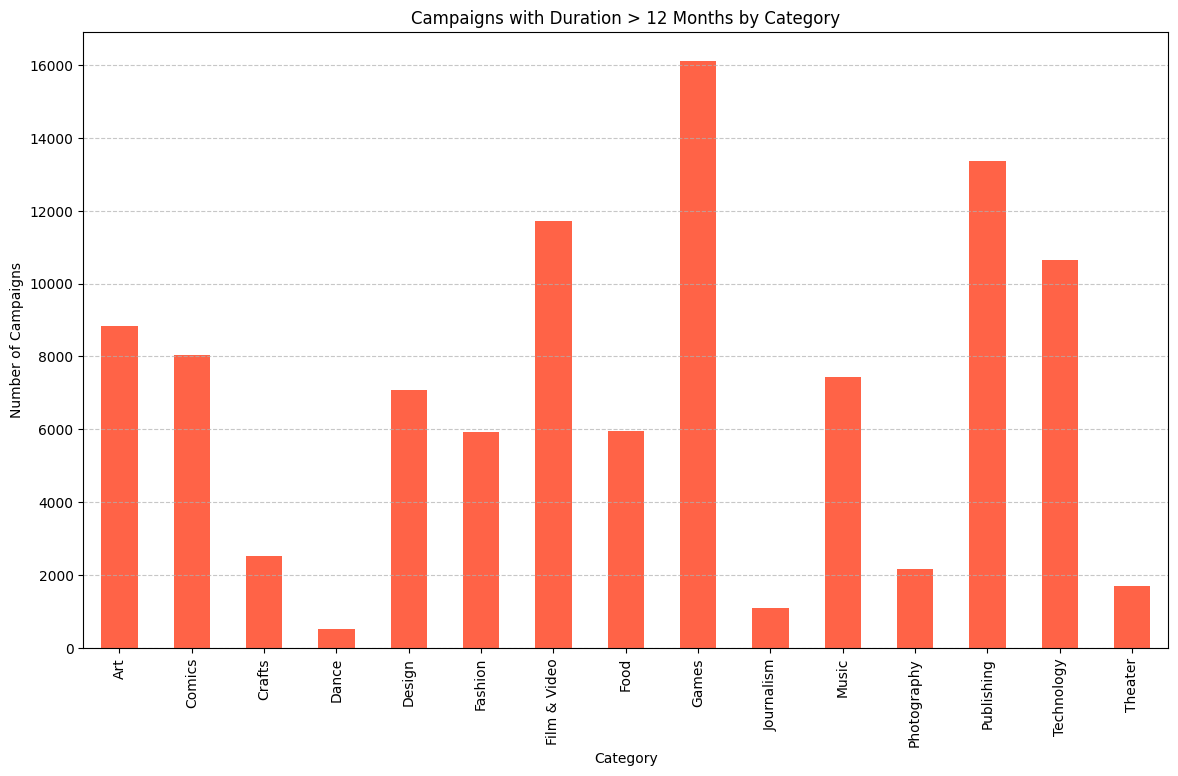

        id category_name  months_to_final_state
3    13583        Comics                     14
24   88697        Design                     41
25   88697        Design                     41
26   88697        Design                     56
27  106570           NaN                     41
31  117526    Technology                     16
32  117526    Technology                     17
39  218406  Film & Video                     46
45  310837           Art                     21
61  511375           Art                     21


In [197]:

long_duration_campaigns = df_filtered[df_filtered['months_to_final_state'] > 12]


long_duration_by_category = long_duration_campaigns.groupby('category_name').size()

# Plot campaigns with long duration by category
plt.figure(figsize=(14, 8))
long_duration_by_category.plot(kind='bar', color='tomato')
plt.title('Campaigns with Duration > 12 Months by Category')
plt.xlabel('Category')
plt.ylabel('Number of Campaigns')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# You can also explore the characteristics of these long duration campaigns further
print(long_duration_campaigns[['id', 'category_name', 'months_to_final_state']].head(10))


In [192]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_pledged', 'usd_type', 'month', 'category_name',
       'subcategory', 'city', 'year_month', 'state_changed_month',
       'launch_year', 'year_launched', 'duration_to_success_months',
       'goal_range', 'state_transition', 'previous_state',
       'months_to_final_state', 'launch_month', 'backers_count_category',
       'is_around_event'],
      dtype='object')

In [194]:
df_filtered.shape

(229114, 41)

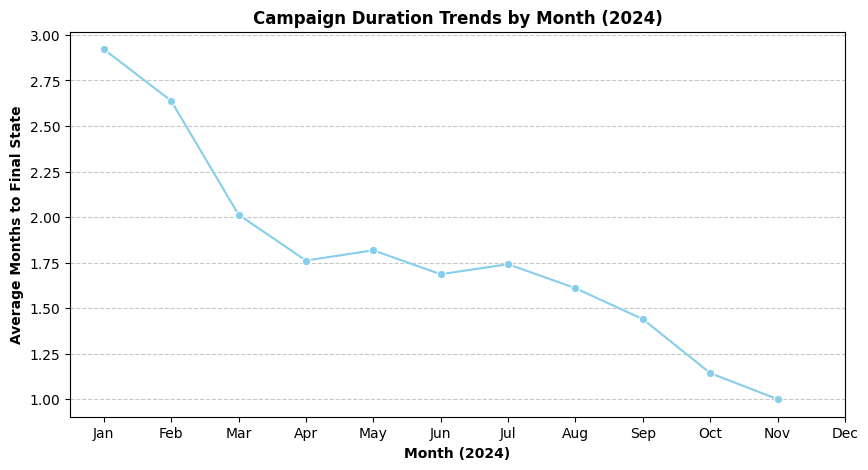

📊 Average Campaign Duration by Month (2024):
    campaign_start_month_only  months_to_final_state
0                           1               2.921329
1                           2               2.638270
2                           3               2.013370
3                           4               1.761294
4                           5               1.817411
5                           6               1.686131
6                           7               1.741212
7                           8               1.609544
8                           9               1.439557
9                          10               1.143285
10                         11               1.000000
11                         12                    NaN


In [214]:


# Extract the month from the campaign start month
df_filtered['campaign_start_month_only'] = df_filtered['campaign_start_month'].dt.month

# Compute average campaign duration per month in 2024
monthly_trends = df_filtered.groupby('campaign_start_month_only')['months_to_final_state'].mean().reset_index()

# Plot the trend over months in 2024
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trends, x='campaign_start_month_only', y='months_to_final_state', marker='o', linestyle='-',color='skyblue')

# Labels and title
plt.xlabel('Month (2024)',fontweight='bold')
plt.ylabel('Average Months to Final State',fontweight='bold')
plt.title('Campaign Duration Trends by Month (2024)',fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Display monthly trend data
print("📊 Average Campaign Duration by Month (2024):")
print(monthly_trends)


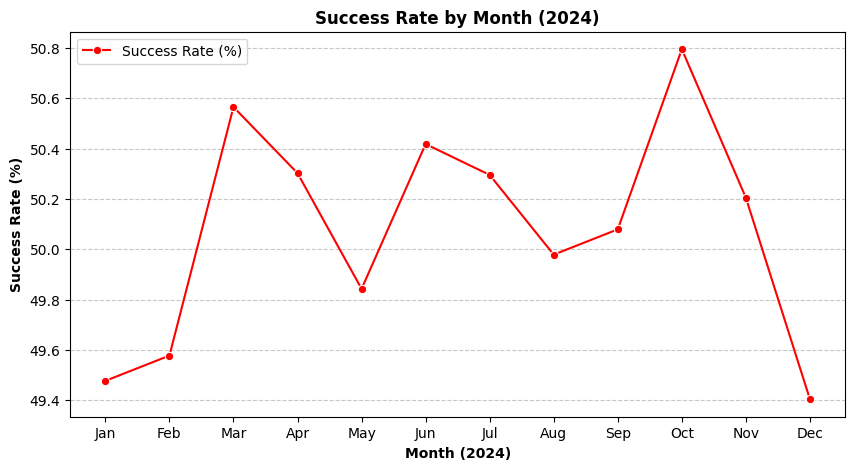

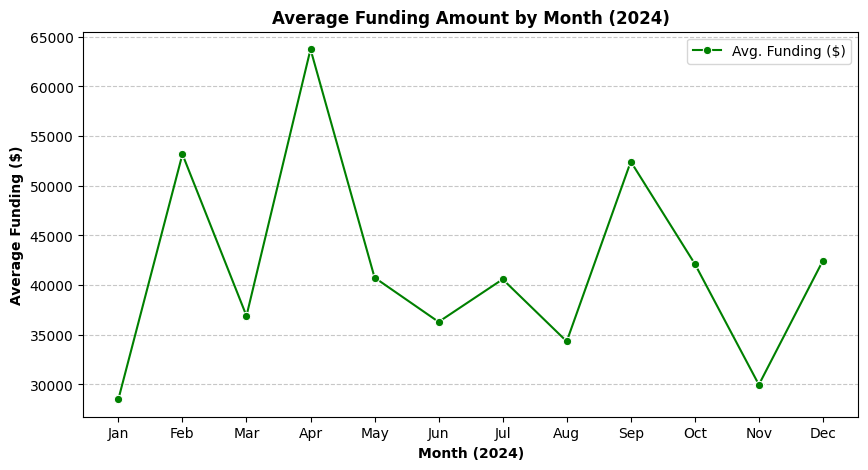

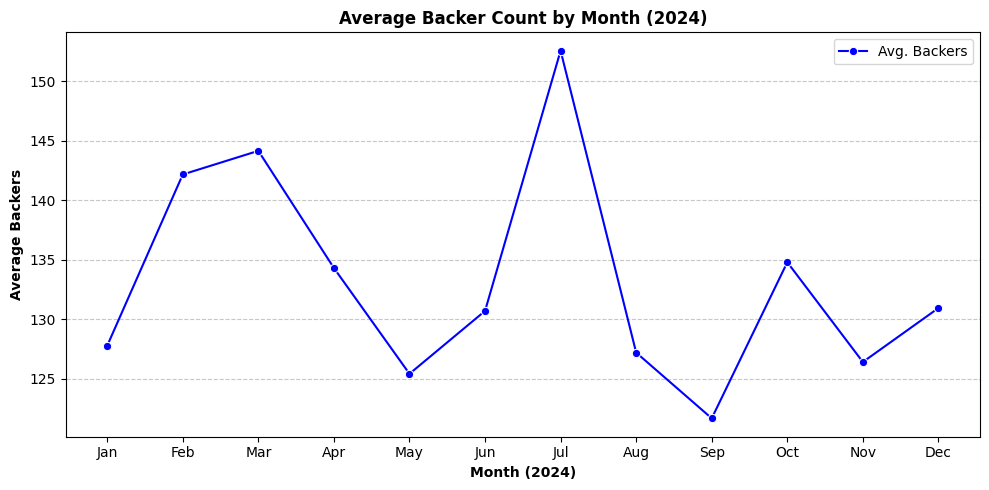

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/2613201198.py:67: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




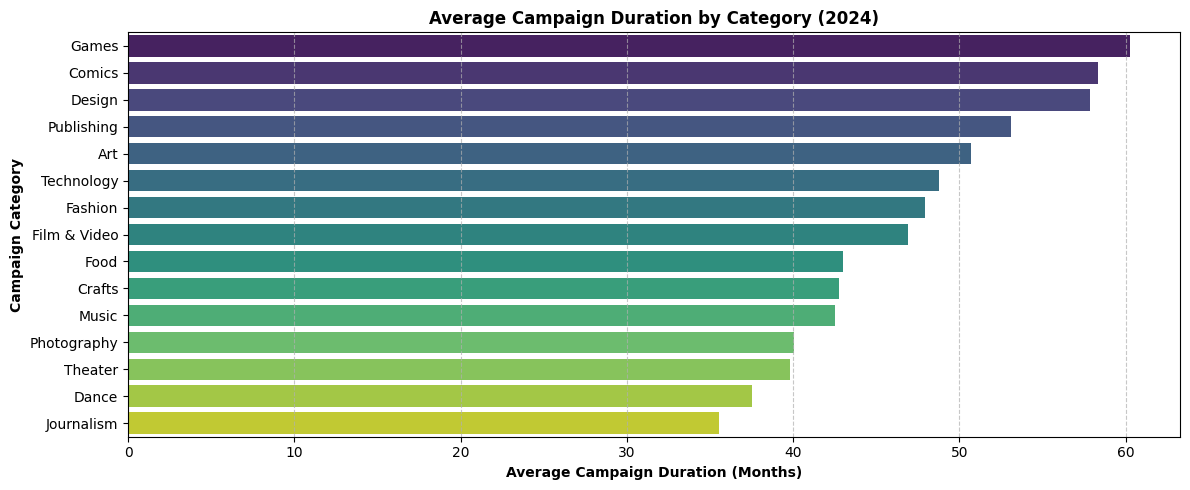

📊 Success Rates by Month:
    launch_month  success_rate
0              1     49.476910
1              2     49.577264
2              3     50.565717
3              4     50.302564
4              5     49.842672
5              6     50.418498
6              7     50.295564
7              8     49.978726
8              9     50.079281
9             10     50.795487
10            11     50.205073
11            12     49.403828

💰 Average Funding by Month:
    launch_month       pledged
0              1  28510.368686
1              2  53177.233169
2              3  36902.227062
3              4  63750.531678
4              5  40755.940149
5              6  36294.939441
6              7  40589.095090
7              8  34331.836024
8              9  52437.104782
9             10  42138.674165
10            11  29973.237127
11            12  42465.899539

👥 Average Backers by Month:
    launch_month  backers_count
0              1     127.781148
1              2     142.171794
2             

In [203]:



# Ensure 'month' and 'year_month' columns are in the correct format
df_filtered['launch_month'] = df_filtered['launch_month'].astype(int)

# 1. Compute Success Rates by Month
monthly_success_rates = df_filtered.groupby('launch_month')['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Compute success rate as percentage
).reset_index()

# 2. Compute Average Funding Amount by Month
monthly_funding = df_filtered.groupby('launch_month')['pledged'].mean().reset_index()

# 3. Compute Average Backer Count by Month
monthly_backers = df_filtered.groupby('launch_month')['backers_count'].mean().reset_index()

# 4. Compute Average Campaign Duration by Category
category_durations = df_filtered.groupby('category_name')['months_to_final_state'].mean().reset_index()

# Plotting

# 1. Success Rate Trends by Month
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_success_rates, x='launch_month', y='state', marker='o', linestyle='-', label='Success Rate (%)', color='r')
plt.xlabel('Month (2024)', fontweight='bold')
plt.ylabel('Success Rate (%)', fontweight='bold')
plt.title('Success Rate by Month (2024)', fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 2. Average Funding Amount by Month
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_funding, x='launch_month', y='pledged', marker='o', linestyle='-', label='Avg. Funding ($)', color='g')
plt.xlabel('Month (2024)', fontweight='bold')
plt.ylabel('Average Funding ($)', fontweight='bold')
plt.title('Average Funding Amount by Month (2024)', fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 3. Average Backer Count by Month
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_backers, x='launch_month', y='backers_count', marker='o', linestyle='-', label='Avg. Backers', color='b')
plt.xlabel('Month (2024)', fontweight='bold')
plt.ylabel('Average Backers', fontweight='bold')
plt.title('Average Backer Count by Month (2024)', fontweight='bold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()


# Filter out rows where 'months_to_final_state' is negative
df_filtered_cleaned = df_filtered[df_filtered['months_to_final_state'] >= 0]

# Recompute the average campaign duration by category
category_durations_cleaned = df_filtered_cleaned.groupby('category_name')['months_to_final_state'].mean().reset_index()

# Plot the cleaned data for average campaign duration by category
plt.figure(figsize=(12, 5))
sns.barplot(data=category_durations_cleaned, x='months_to_final_state', y='category_name', palette='viridis', order=category_durations_cleaned.sort_values('months_to_final_state', ascending=False)['category_name'])
plt.xlabel('Average Campaign Duration (Months)', fontweight='bold')
plt.ylabel('Campaign Category', fontweight='bold')
plt.title('Average Campaign Duration by Category (2024)', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# Display data tables
print("📊 Success Rates by Month:")
print(monthly_success_rates.rename(columns={'state': 'success_rate'}))

print("\n💰 Average Funding by Month:")
print(monthly_funding)

print("\n👥 Average Backers by Month:")
print(monthly_backers)

print("\n📅 Average Campaign Duration by Category:")
print(category_durations_cleaned)



In [200]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229114 entries, 0 to 256377
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   backers_count               229114 non-null  int64         
 1   converted_pledged_amount    217053 non-null  float64       
 2   country_displayable_name    229114 non-null  object        
 3   currency                    229114 non-null  object        
 4   current_currency            229114 non-null  object        
 5   disable_communication       229114 non-null  bool          
 6   goal                        229114 non-null  float64       
 7   id                          229114 non-null  int64         
 8   is_disliked                 229114 non-null  bool          
 9   is_launched                 229114 non-null  bool          
 10  is_liked                    229114 non-null  bool          
 11  is_starrable                229114 non-null 

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2267643759.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_success_rates, x='state', y='category_name', palette='viridis',


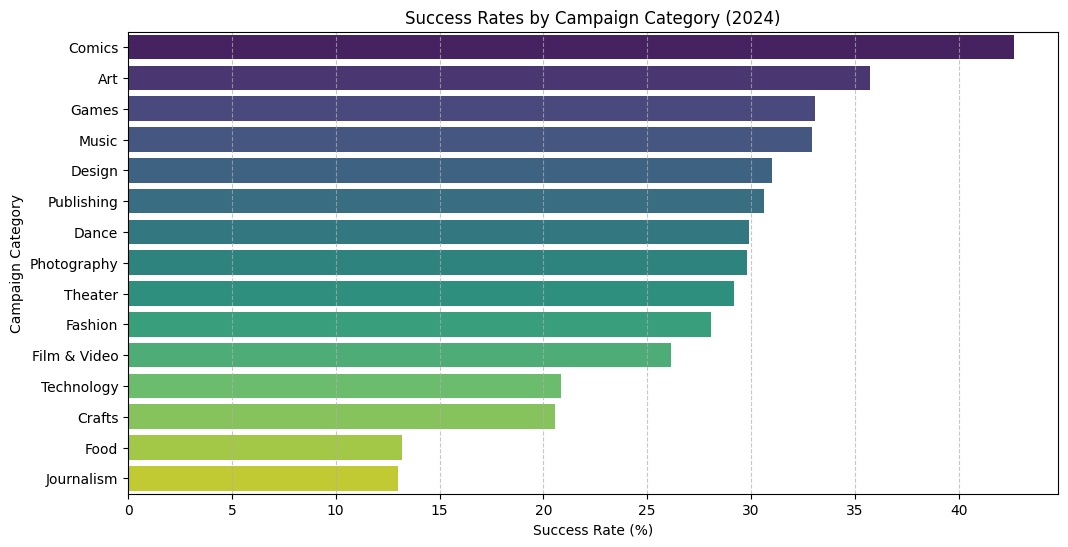

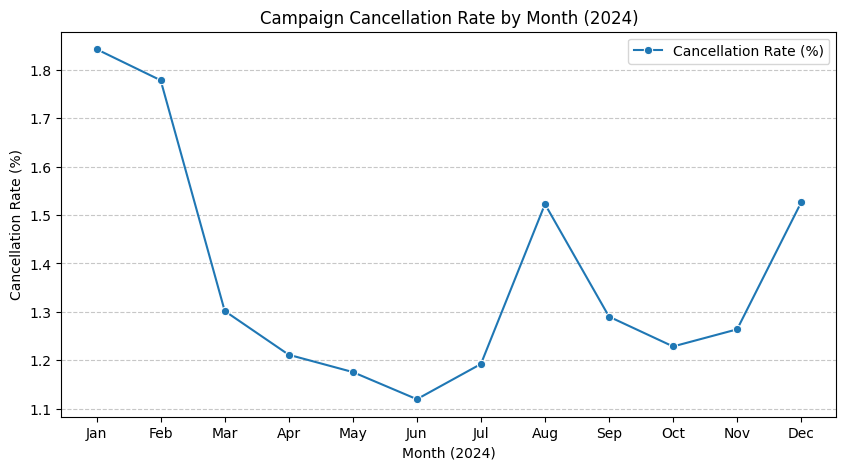

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2267643759.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_success_rates, x='state', y='country_displayable_name', palette='viridis',


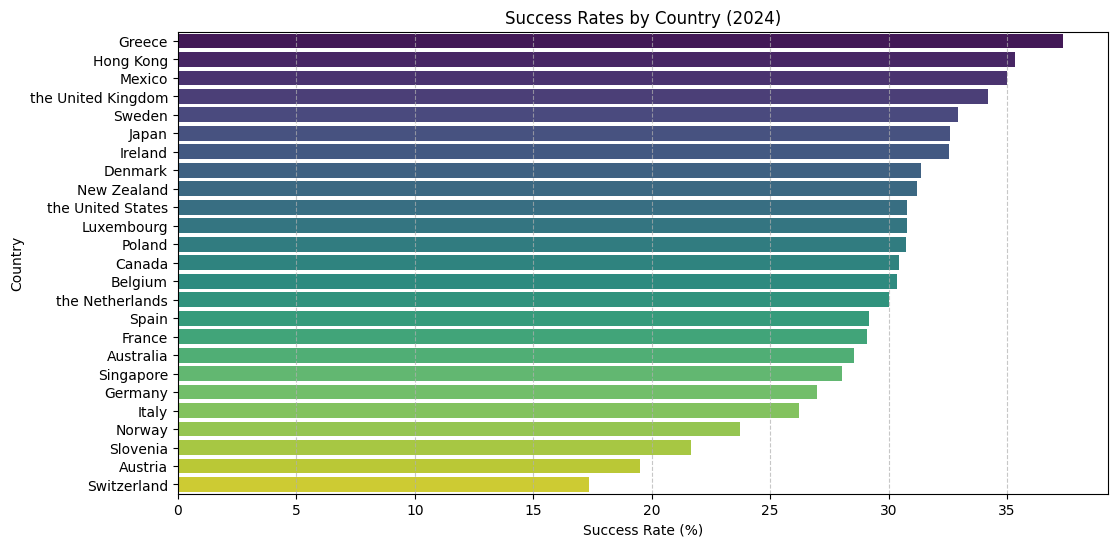

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2267643759.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_success_rates, x='state', y='city', palette='viridis',


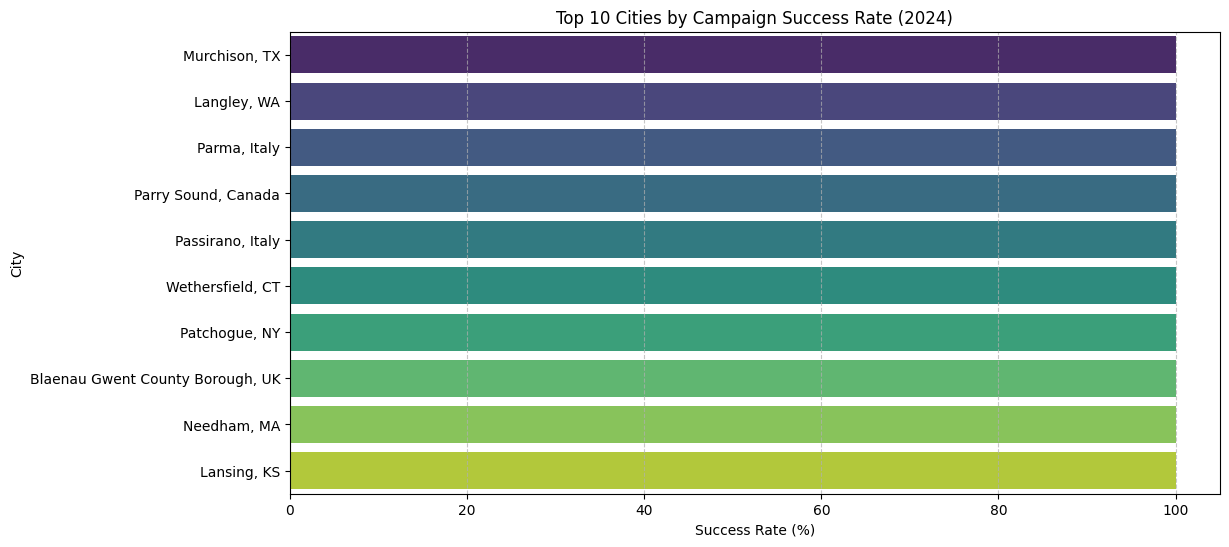

📊 Success Rates by Category:
   category_name  success_rate
0            Art     35.734500
1         Comics     42.652455
2         Crafts     20.574713
3          Dance     29.914530
4         Design     30.998829
5        Fashion     28.093492
6   Film & Video     26.153137
7           Food     13.177843
8          Games     33.077813
9     Journalism     12.977099
10         Music     32.916846
11   Photography     29.824561
12    Publishing     30.628887
13    Technology     20.849588
14       Theater     29.166667

🔄 Cancellation Rates by Month:
    campaign_start_month_only  cancellation_rate
0                           1           1.842211
1                           2           1.778050
2                           3           1.301816
3                           4           1.211471
4                           5           1.175779
5                           6           1.119724
6                           7           1.192473
7                           8           1.522436
8 

In [192]:


# Analyze success rates per campaign category
category_success_rates = df_filtered.groupby('category_name')['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Compute success rate as percentage
).reset_index()

# Investigate refund/cancellation rates over time
monthly_cancellations = df_filtered.groupby('campaign_start_month_only')['state'].apply(
    lambda x: (x == 'canceled').mean() * 100  # Compute cancellation rate as percentage
).reset_index()

# Investigate success rates per country
country_success_rates = df_filtered.groupby('country_displayable_name')['state'].apply(
    lambda x: (x == 'successful').mean() * 100  # Compute success rate as percentage
).reset_index()

# Investigate success rates per city (top 10 cities with most campaigns)
city_success_rates = df_filtered.groupby('city')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index().sort_values('state', ascending=False).head(10)

# Plot success rates by category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_success_rates, x='state', y='category_name', palette='viridis', 
            order=category_success_rates.sort_values('state', ascending=False)['category_name'])
plt.xlabel('Success Rate (%)')
plt.ylabel('Campaign Category')
plt.title('Success Rates by Campaign Category (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot cancellation rates over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_cancellations, x='campaign_start_month_only', y='state', marker='o', linestyle='-', label='Cancellation Rate (%)')
plt.xlabel('Month (2024)')
plt.ylabel('Cancellation Rate (%)')
plt.title('Campaign Cancellation Rate by Month (2024)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Plot success rates by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_success_rates, x='state', y='country_displayable_name', palette='viridis', 
            order=country_success_rates.sort_values('state', ascending=False)['country_displayable_name'])
plt.xlabel('Success Rate (%)')
plt.ylabel('Country')
plt.title('Success Rates by Country (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot top 10 cities by success rate
plt.figure(figsize=(12, 6))
sns.barplot(data=city_success_rates, x='state', y='city', palette='viridis', 
            order=city_success_rates.sort_values('state', ascending=False)['city'])
plt.xlabel('Success Rate (%)')
plt.ylabel('City')
plt.title('Top 10 Cities by Campaign Success Rate (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Display data tables
print("📊 Success Rates by Category:")
print(category_success_rates.rename(columns={'state': 'success_rate'}))

print("\n🔄 Cancellation Rates by Month:")
print(monthly_cancellations.rename(columns={'state': 'cancellation_rate'}))

print("\n🌍 Success Rates by Country:")
print(country_success_rates.rename(columns={'state': 'success_rate'}))

print("\n🏙️ Top 10 Cities by Campaign Success Rate:")
print(city_success_rates.rename(columns={'state': 'success_rate'}))


## Analysis ##
There is much information in the plots displayed above. Mainly we have decided our target feature will  be the 'state' of the campaign through the year; this indicates whether the campaign was successful in launching. We computed the success rate as follows:
1. group the dataframe according to category name.
2. Identify the instances of success within each subgroup and find the percent of instances.
3. Do this across all categories and plot a bargraph of the percent success. 

What we find when we execute the steps above is that the top three success categories are Comics, Arts and Games. With Music trailing very closely at fourth place. Which means that a campaing in one of those categories is a good predictor of success.

We ran a similar analysis for the countries the campaigns were launched from and found the top three being Greece ,Hong Kong (Which needs to be corrected because Hong Kong is not a country.) and the United Kingdom. The United States ended up midlevel in this list.

We also ran a Time Series Analysis of the Campaign cancellation rates by month and found that the highest cancellation rates happen at the beginning of the year. There is a sharp increase in the summer months and then finally drops again the last quarter of the year.

Finally, we looked at cities with high Success rates. Out of the top 10 all had 100 percent success rates, 3 of them from the United States.

In [193]:
print(df_filtered.head())  # Check if it's correctly loaded
print(df_filtered.columns)  # Verify expected columns exist


   backers_count  converted_pledged_amount country_displayable_name currency  \
1              0                       NaN        the United States      USD   
2             52                    1471.0        the United States      USD   
3            130                    2869.0        the United States      USD   
5              0                       NaN        the United States      USD   
6             43                    2217.0        the United States      USD   

  current_currency  disable_communication    goal     id  is_disliked  \
1              USD                  False     0.0  13583        False   
2              USD                  False   500.0  13583        False   
3              USD                  False   500.0  13583        False   
5              USD                  False     0.0  19685        False   
6              USD                  False  2500.0  19685        False   

   is_launched  ...  year_month_final_x  year_month_final_x  \
1        False  .

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2296772840.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_duration = df_filtered.groupby('duration_category')['state'].apply(
/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2296772840.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_success_rates, x='success_rate', y='category_name', palette='viridis',


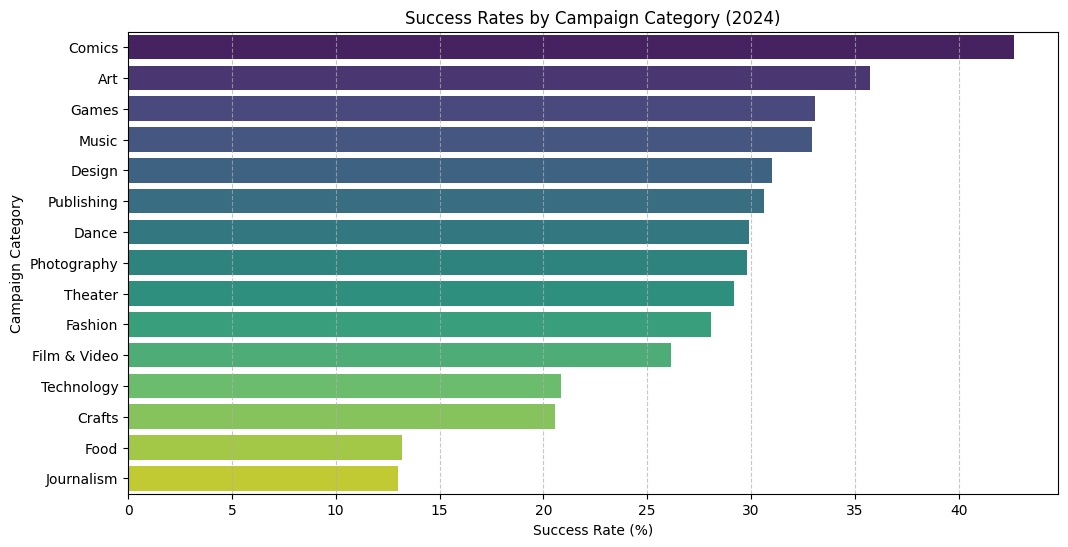

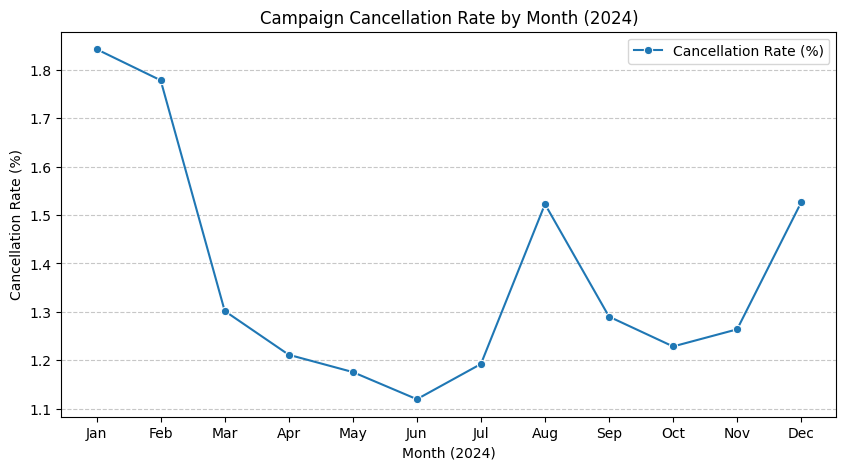

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2296772840.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_success_rates, x='success_rate', y='country_displayable_name', palette='coolwarm',


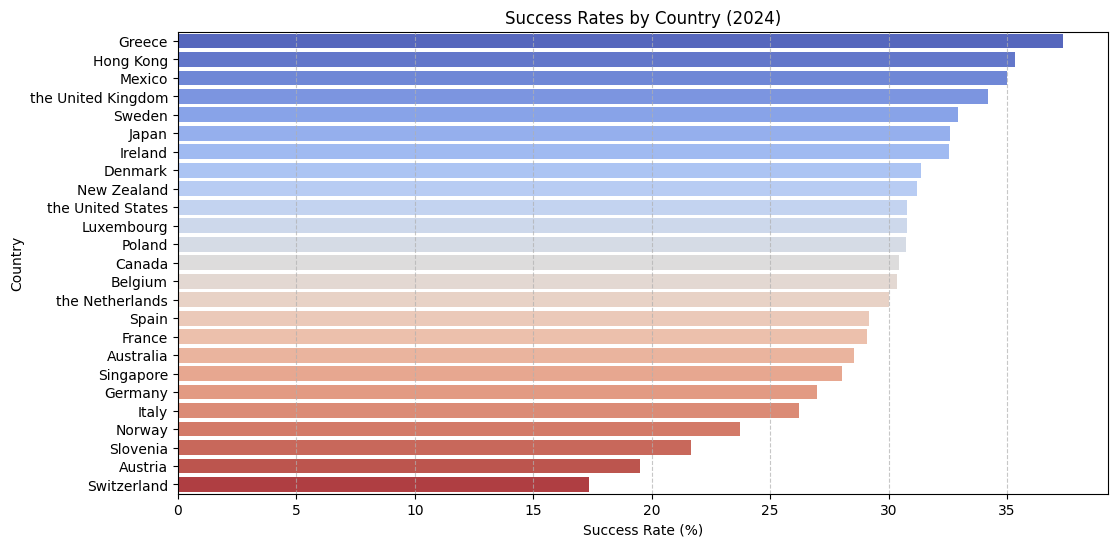

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2296772840.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_success_rates, x='success_rate', y='city', palette='magma',


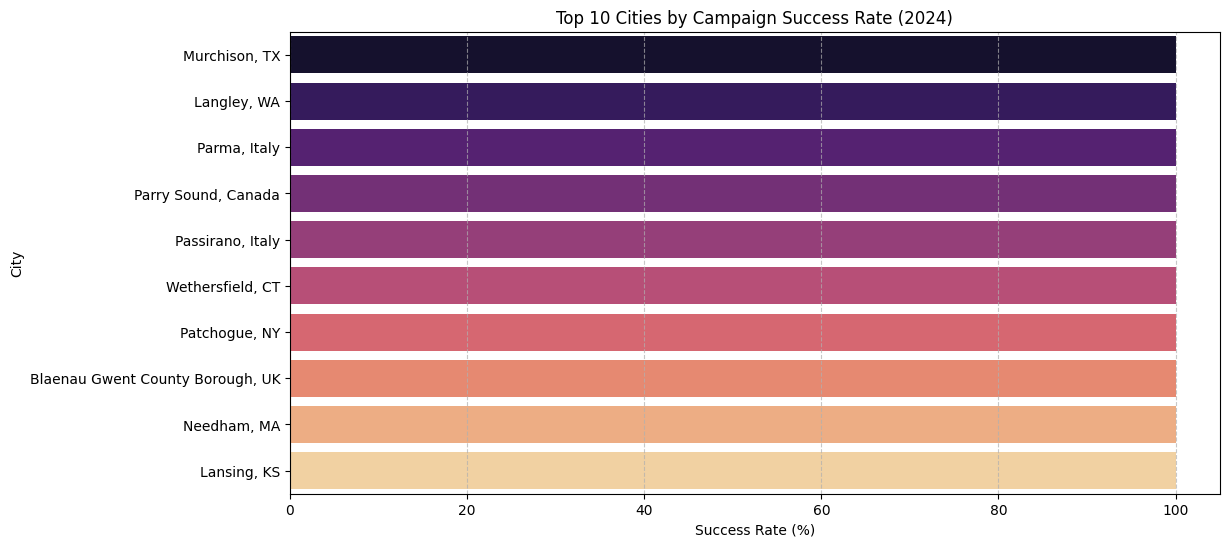

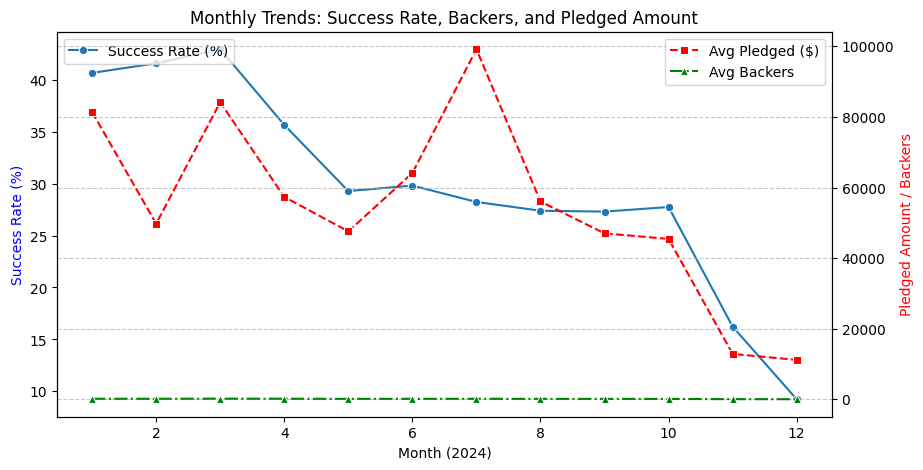

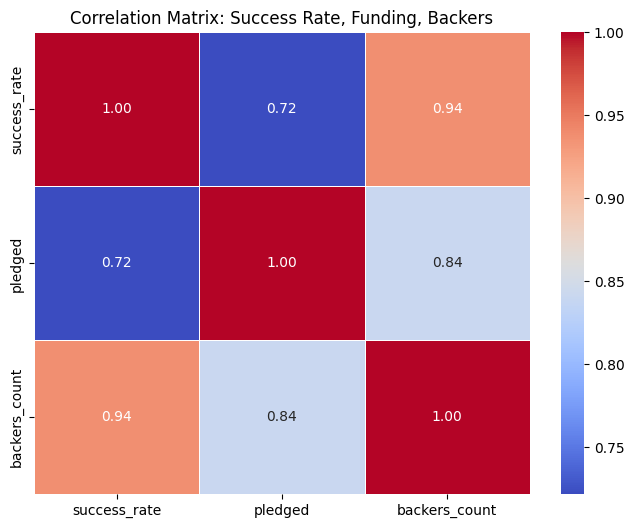

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2296772840.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=duration_by_category, x='months_to_final_state', y='category_name', palette='Blues_r',


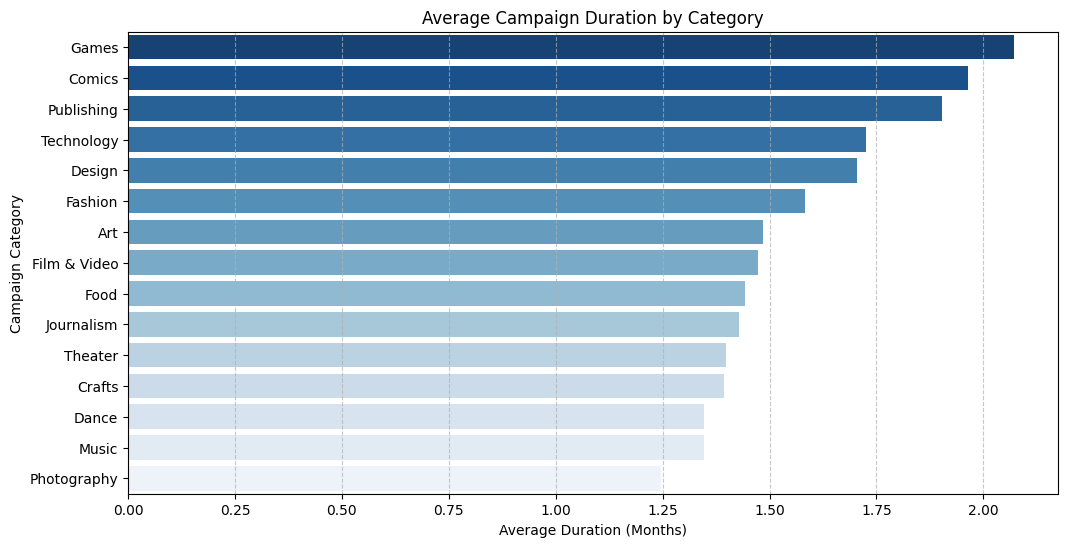

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_68796/2296772840.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_by_duration, x='duration_category', y='state', palette='plasma')


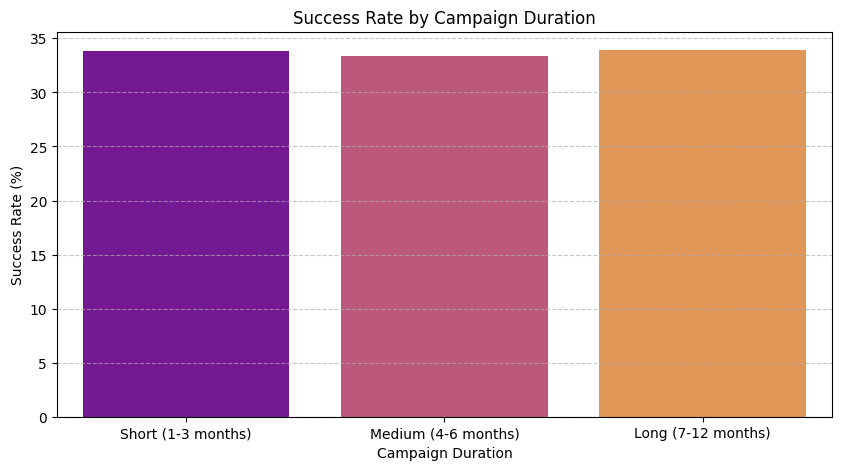

📊 Success Rates by Category:
   category_name  success_rate
0            Art     35.734500
1         Comics     42.652455
2         Crafts     20.574713
3          Dance     29.914530
4         Design     30.998829
5        Fashion     28.093492
6   Film & Video     26.153137
7           Food     13.177843
8          Games     33.077813
9     Journalism     12.977099
10         Music     32.916846
11   Photography     29.824561
12    Publishing     30.628887
13    Technology     20.849588
14       Theater     29.166667

🔄 Cancellation Rates by Month:
    campaign_start_month_only  cancellation_rate
0                           1           1.842211
1                           2           1.778050
2                           3           1.301816
3                           4           1.211471
4                           5           1.175779
5                           6           1.119724
6                           7           1.192473
7                           8           1.522436
8 

In [195]:



category_success_rates = df_filtered.groupby('category_name')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index().rename(columns={'state': 'success_rate'})


monthly_cancellations = df_filtered.groupby('campaign_start_month_only')['state'].apply(
    lambda x: (x == 'canceled').mean() * 100
).reset_index().rename(columns={'state': 'cancellation_rate'})


country_success_rates = df_filtered.groupby('country_displayable_name')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index().rename(columns={'state': 'success_rate'})

city_success_rates = df_filtered.groupby('city')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index().rename(columns={'state': 'success_rate'}).sort_values('success_rate', ascending=False).head(10)


monthly_success_rates = df_filtered.groupby('campaign_start_month_only')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index().rename(columns={'state': 'success_rate'})

monthly_funding = df_filtered.groupby('campaign_start_month_only')['pledged'].mean().reset_index()
monthly_backers = df_filtered.groupby('campaign_start_month_only')['backers_count'].mean().reset_index()


monthly_analysis = monthly_success_rates.merge(monthly_funding, on='campaign_start_month_only')\
                                       .merge(monthly_backers, on='campaign_start_month_only')

correlation_matrix = monthly_analysis[['success_rate', 'pledged', 'backers_count']].corr()

duration_by_category = df_filtered.groupby('category_name')['months_to_final_state'].mean().reset_index()


success_by_duration = df_filtered.groupby('duration_category')['state'].apply(
    lambda x: (x == 'successful').mean() * 100
).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=category_success_rates, x='success_rate', y='category_name', palette='viridis',
            order=category_success_rates.sort_values('success_rate', ascending=False)['category_name'])
plt.xlabel('Success Rate (%)')
plt.ylabel('Campaign Category')
plt.title('Success Rates by Campaign Category (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_cancellations, x='campaign_start_month_only', y='cancellation_rate', marker='o', linestyle='-', label='Cancellation Rate (%)')
plt.xlabel('Month (2024)')
plt.ylabel('Cancellation Rate (%)')
plt.title('Campaign Cancellation Rate by Month (2024)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(data=country_success_rates, x='success_rate', y='country_displayable_name', palette='coolwarm',
            order=country_success_rates.sort_values('success_rate', ascending=False)['country_displayable_name'])
plt.xlabel('Success Rate (%)')
plt.ylabel('Country')
plt.title('Success Rates by Country (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(data=city_success_rates, x='success_rate', y='city', palette='magma',
            order=city_success_rates.sort_values('success_rate', ascending=False)['city'])
plt.xlabel('Success Rate (%)')
plt.ylabel('City')
plt.title('Top 10 Cities by Campaign Success Rate (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


fig, ax1 = plt.subplots(figsize=(10, 5))

sns.lineplot(data=monthly_success_rates, x='campaign_start_month_only', y='success_rate', marker='o', linestyle='-', label='Success Rate (%)', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=monthly_funding, x='campaign_start_month_only', y='pledged', marker='s', linestyle='--', color='r', label='Avg Pledged ($)', ax=ax2)
sns.lineplot(data=monthly_backers, x='campaign_start_month_only', y='backers_count', marker='^', linestyle='-.', color='g', label='Avg Backers', ax=ax2)

ax1.set_xlabel('Month (2024)')
ax1.set_ylabel('Success Rate (%)', color='b')
ax2.set_ylabel('Pledged Amount / Backers', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Monthly Trends: Success Rate, Backers, and Pledged Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Success Rate, Funding, Backers')
plt.show()

# ⏳ **Average Campaign Duration by Category**
plt.figure(figsize=(12, 6))
sns.barplot(data=duration_by_category, x='months_to_final_state', y='category_name', palette='Blues_r',
            order=duration_by_category.sort_values('months_to_final_state', ascending=False)['category_name'])
plt.xlabel('Average Duration (Months)')
plt.ylabel('Campaign Category')
plt.title('Average Campaign Duration by Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(data=success_by_duration, x='duration_category', y='state', palette='plasma')
plt.xlabel('Campaign Duration')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate by Campaign Duration')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔹 Display Data Tables
print("📊 Success Rates by Category:")
print(category_success_rates)

print("\n🔄 Cancellation Rates by Month:")
print(monthly_cancellations)

print("\n🌍 Success Rates by Country:")
print(country_success_rates)

print("\n🏙️ Top 10 Cities by Campaign Success Rate:")
print(city_success_rates)

print("\n📅 Monthly Success, Backers, Pledged:")
print(monthly_analysis)

print("\n🔬 Correlation Matrix:")
print(correlation_matrix)

print("\n⏳ Average Campaign Duration by Category:")
print(duration_by_category)

print("\n📈 Success Rate by Duration Category:")
print(success_by_duration)


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/2400556865.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




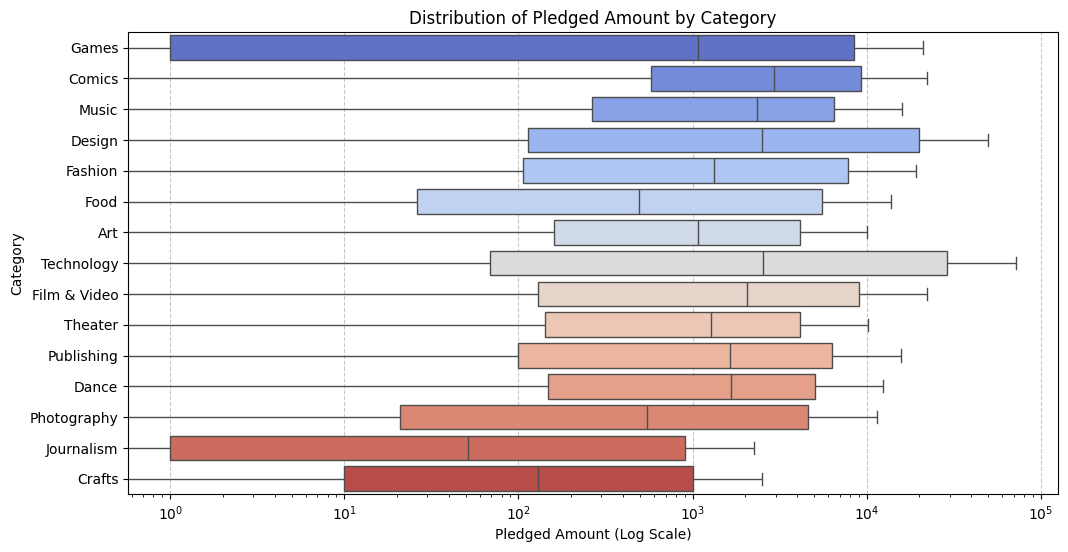

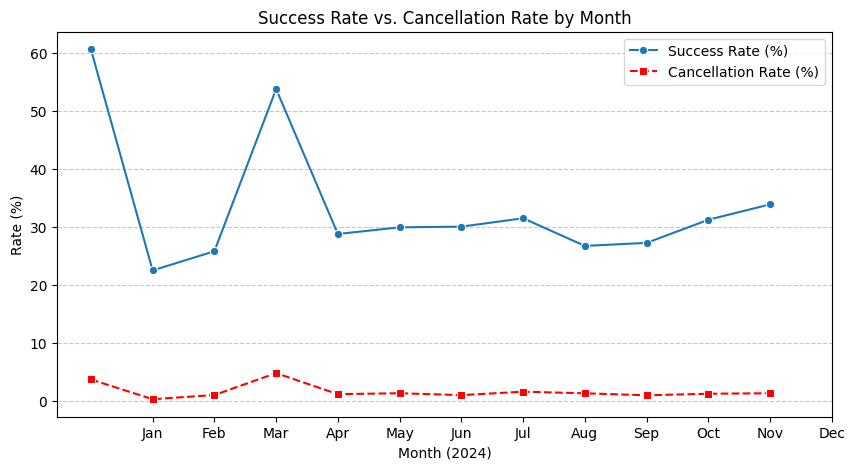

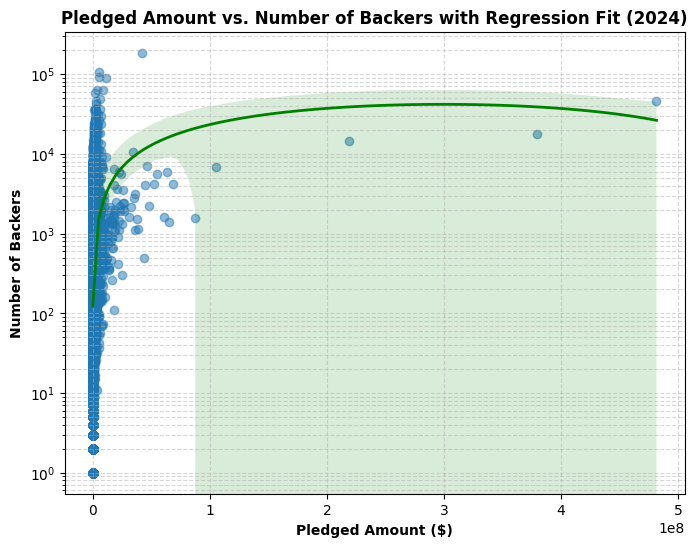

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/2400556865.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




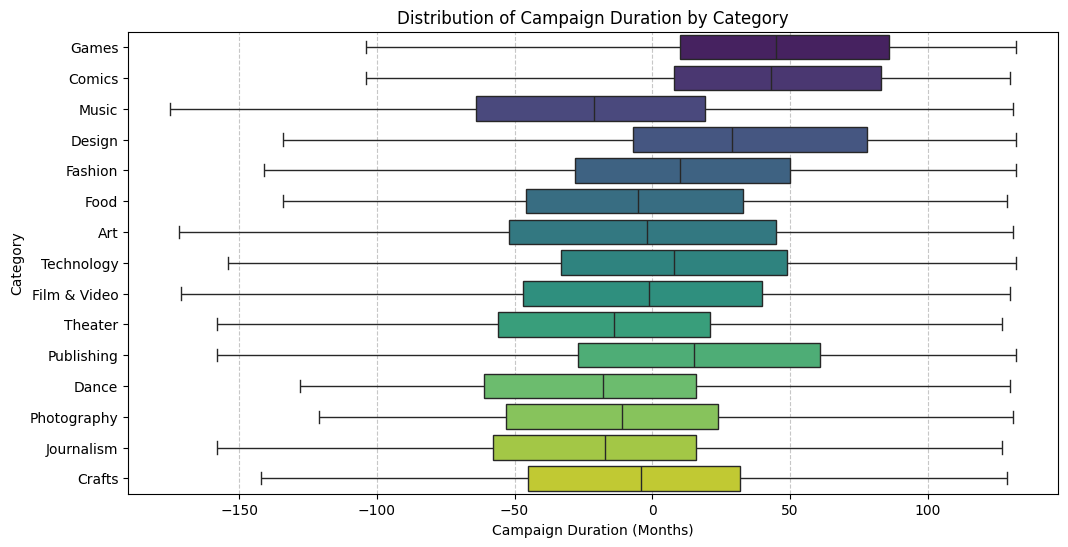

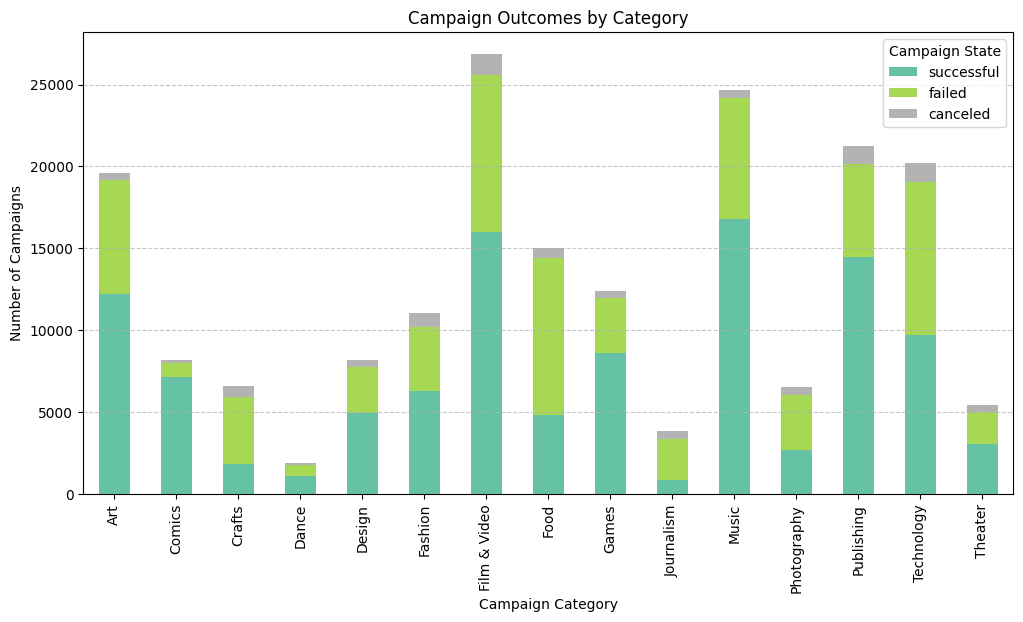

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure necessary columns and transformations are available in the dataset

# 🎯 1️⃣ Funding Distribution Across Categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='pledged', y='category_name', showfliers=False, palette='coolwarm')
plt.xscale('log')  # Log scale to handle skewed distribution
plt.xlabel('Pledged Amount (Log Scale)')
plt.ylabel('Category')
plt.title('Distribution of Pledged Amount by Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 2️⃣ Monthly Trends: Success Rate vs. Cancellation Rate
# Ensure you have calculated monthly success and cancellation rates.
# You need to calculate 'monthly_success_rates' and 'monthly_cancellations' beforehand.
# Here's an example of how you might calculate them:

monthly_success_rates = df_filtered.groupby('month')['state'].apply(lambda x: (x == 'successful').mean() * 100).reset_index(name='success_rate')
monthly_cancellations = df_filtered.groupby('month')['state'].apply(lambda x: (x == 'canceled').mean() * 100).reset_index(name='cancellation_rate')

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_success_rates, x='month', y='success_rate', marker='o', linestyle='-', label='Success Rate (%)')
sns.lineplot(data=monthly_cancellations, x='month', y='cancellation_rate', marker='s', linestyle='--', label='Cancellation Rate (%)', color='r')
plt.xlabel('Month (2024)')
plt.ylabel('Rate (%)')
plt.title('Success Rate vs. Cancellation Rate by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 🔍 3️⃣ Scatter Plot: Pledged Amount vs. Backers Count
plt.figure(figsize=(8, 6))
sns.regplot(data=df_filtered, x='pledged', y='backers_count', scatter_kws={'alpha': 0.5}, 
            line_kws={'color': 'green', 'lw': 2}, order=2)  

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Pledged Amount ($)', fontweight='bold')
plt.ylabel('Number of Backers', fontweight='bold')
plt.title('Pledged Amount vs. Number of Backers with Regression Fit (2024)', fontweight='bold')
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()

# ⏳ 4️⃣ Boxplot: Distribution of Campaign Durations by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='months_to_final_state', y='category_name', showfliers=False, palette='viridis')
plt.xlabel('Campaign Duration (Months)')
plt.ylabel('Category')
plt.title('Distribution of Campaign Duration by Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 5️⃣ Stacked Bar Chart: Success, Failed, Canceled Campaigns per Category
category_state_counts = df_filtered.groupby(['category_name', 'state']).size().unstack(fill_value=0)
category_state_counts[['successful', 'failed', 'canceled']].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.xlabel('Campaign Category')
plt.ylabel('Number of Campaigns')
plt.title('Campaign Outcomes by Category')
plt.xticks(rotation=90)
plt.legend(title='Campaign State')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [206]:
df_filtered.shape

(229114, 41)

In [216]:
df_filtered.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'currency', 'current_currency', 'disable_communication', 'goal', 'id',
       'is_disliked', 'is_launched', 'is_liked', 'is_starrable', 'launched_at',
       'name', 'percent_funded', 'pledged', 'prelaunch_activated', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'month', 'category_name', 'subcategory', 'city', 'year_month',
       'final_state_month', 'year_month_final_x', 'year_month_final_x',
       'year_month_final_x', 'year_month_final_x', 'year_month_final_x',
       'year_month_final_x', 'year_month_final_x', 'year_month_final_y',
       'year_month_final', 'campaign_start_month', 'first_final_state_month',
       'months_to_final_state', 'duration_category', 'campaign_start_year',
       'campaign_start_month_only', 'state_numeric', 'category_encoded',
       'country_encoded', 'subcateg

/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/3077720886.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




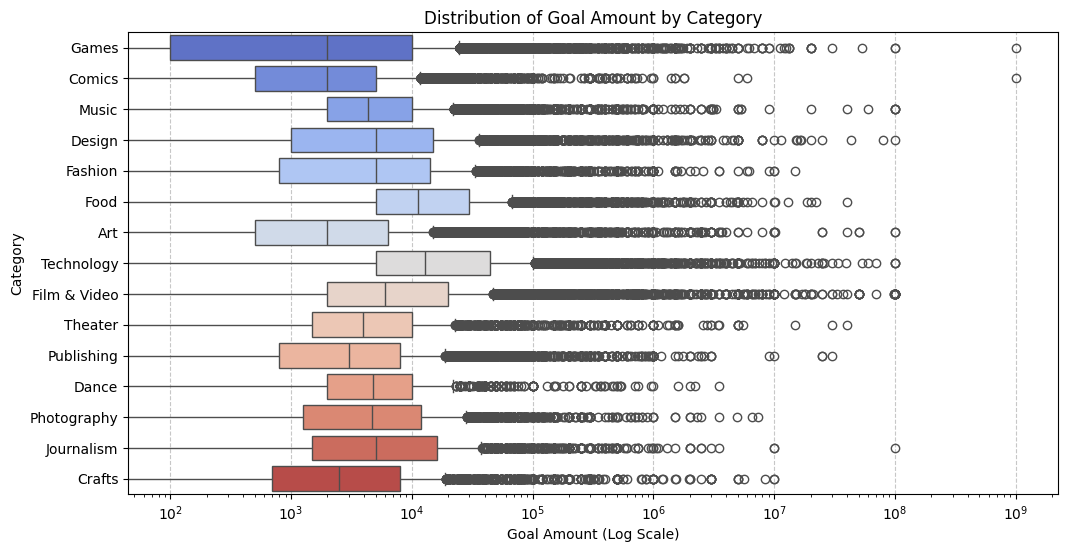

In [208]:


# 🎯 Distribution of Goal Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='goal', y='category_name', showfliers=True, palette='coolwarm')
plt.xscale('log')  # Log scale to handle wide range of goal values
plt.xlabel('Goal Amount (Log Scale)')
plt.ylabel('Category')
plt.title('Distribution of Goal Amount by Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


/var/folders/pd/p7n06std6nj_26fw2tft4t700000gn/T/ipykernel_23593/2675327674.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




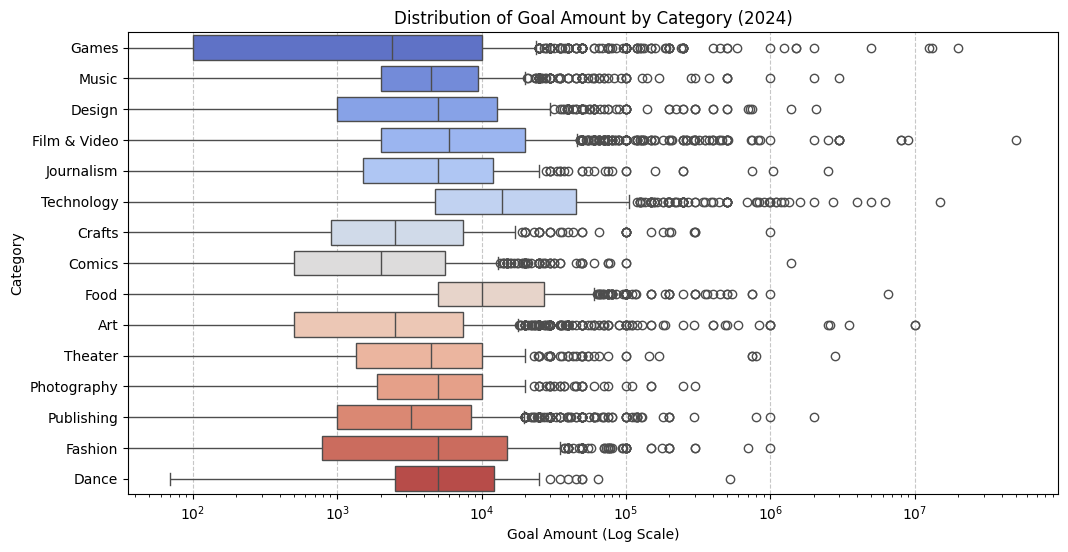

In [209]:


# Filter data for the year 2024
df_2024 = df_filtered[df_filtered['launch_year'] == 2024]

# 🎯 Distribution of Goal Amount by Category for 2024
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_2024, x='goal', y='category_name', showfliers=True, palette='coolwarm')
plt.xscale('log')  # Log scale to handle wide range of goal values
plt.xlabel('Goal Amount (Log Scale)')
plt.ylabel('Category')
plt.title('Distribution of Goal Amount by Category (2024)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


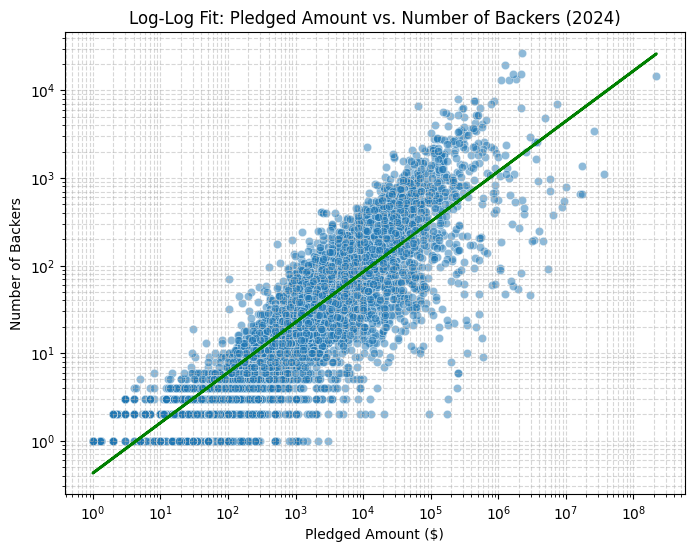

Regression Line: y = 0.43 * x^0.57


In [215]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Filter out zero or negative values
df_filtered_cleaned = df_2024[(df_2024['pledged'] > 0) & (df_2024['backers_count'] > 0)]

# Scatter plot with log-log scale
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered_cleaned, x='pledged', y='backers_count', alpha=0.5)

# Apply log transformation to both axes
plt.xscale('log')
plt.yscale('log')

# Perform linear regression in log-log space
log_pledged = np.log10(df_filtered_cleaned['pledged'])
log_backers = np.log10(df_filtered_cleaned['backers_count'])

# Linear regression: y = m * x + b
slope, intercept, r_value, p_value, std_err = linregress(log_pledged, log_backers)

# Plot the regression line
plt.plot(df_filtered_cleaned['pledged'], 10**(intercept) * df_filtered_cleaned['pledged']**slope, color='green', lw=2)

# Set labels and title
plt.xlabel('Pledged Amount ($)')
plt.ylabel('Number of Backers')
plt.title('Log-Log Fit: Pledged Amount vs. Number of Backers (2024)')

# Show grid and plot
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()

# Print the results
print(f"Regression Line: y = {10**intercept:.2f} * x^{slope:.2f}")


This indicates the following:

**Slope** (0.57): The slope of 0.57 suggests that as the pledged amount increases, the number of backers increases as well, but at a diminishing rate. This implies that larger campaigns (in terms of pledged amount) tend to attract more backers, but not in a strictly linear fashion. As the pledge amount increases, the increase in backers becomes less pronounced.

**Intercept** (0.43): The intercept of 0.43 suggests that, when plotted in log-log scale, the initial relationship between pledged amount and backers count starts at a non-zero value, although this doesn’t directly affect the interpretation since we're looking at a logarithmic transformation.

**Key Insights**:
The 0.57 exponent tells us that there is a sublinear relationship between pledged amounts and the number of backers. This could suggest that for smaller campaigns, backers might be more sensitive to the funding goal, whereas for larger campaigns, the number of backers might grow more slowly in relation to the funding amount.

Log-Log Relationship: Because you're working with a log-log scale, the model assumes that both pledged amount and backer count are related by a power law. This kind of relationship is common in data where both variables span several orders of magnitude (e.g., in crowdfunding or sales data).

In [18]:
df_filtered.shape

(256378, 36)

In [19]:
df_filtered.to_csv('finaldataset.csv', index=False)  

In [20]:
df_filtered.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount',
       'country_displayable_name', 'currency', 'current_currency',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_disliked',
       'is_launched', 'is_liked', 'is_starrable', 'launched_at', 'name',
       'percent_funded', 'pledged', 'prelaunch_activated', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate',
       'usd_exchange_rate', 'usd_pledged', 'usd_type', 'month',
       'is_in_post_campaign_pledging_phase', 'category_name', 'subcategory',
       'city', 'year_month', 'year_month_final', 'state_changed_month'],
      dtype='object')

In [21]:
features = ['backers_count','goal','category_name','country_displayable_name','state','usd_pledged','subcategory','city','year_month_final','month'];
df_model = df_filtered[features];
df_model.shape

(256378, 10)

In [22]:
df_model['year_month_final']

0         2023-10
1         2024-11
2         2024-11
3         2024-11
4         2016-11
           ...   
256373    2024-10
256374    2011-08
256375    2023-06
256376    2014-07
256377    2015-04
Name: year_month_final, Length: 256378, dtype: period[M]

In [23]:
# Filter the dataset for successful and failed campaigns
df_success_failed = df_model[df_model['state'].isin(['successful', 'failed'])]

# Display the first few rows of the filtered dataset
print(df_success_failed.head())


   backers_count     goal category_name country_displayable_name       state  \
0            491  10000.0         Games        the United States  successful   
3            130    500.0        Comics        the United States  successful   
4              4  15000.0         Music        the United States      failed   
7             81   2500.0        Design        the United States  successful   
8             11    150.0           Art       the United Kingdom  successful   

    usd_pledged      subcategory             city year_month_final       month  
0  36513.000000    Playing Cards    Asheville, NC          2023-10  2024-04-01  
3   2869.000000      Comic Books  Jersey City, NJ          2024-11  2024-11-01  
4     62.000000      World Music    Cleveland, OH          2016-11  2024-04-01  
7   4815.000000             Toys       Newark, DE          2024-06  2024-07-01  
8    258.036032  Performance Art       Dundee, UK          2015-05  2024-04-01  


In [24]:
df_success_failed.shape

(208988, 10)